# K-Digital Training 데이터 사이언스/엔지니어링 공공데이터 시각화 PJT
`1조` 데이터, 날 이끌어 조 (권미숙 김병석 이우림 천준 **홍효석**)
<br>
<br>
### 전기차 이대로 괜찮은가?
<br>
<img src="https://news.hmgjournal.com/images_n/contents/Next-Gen-EV-Tech1.jpg" width=400>
<br>



* **주제선정 배경**
    * 글로벌 온실가스 감축 정책으로 인한 자동차 분야의 규제 강화로 전 세계가 전기차 시장 확대에 노력하고 있음 
    * 환경부는 2011년부터 온실가스와 대기오염물질을 줄이기 위한 방안으로 전기차 보급 확대를 추진하고 있음
    * 많은 기업에서도 ESG에 관심도가 높음
    * 실제 전기차 등록 및 관심도가 증가하고 있으나, 전기차 구매 및 유지와 관련된 비용 및 인프라에 대한 문제점도 대두


* **프로젝트 목표**
    * 전기차 관련 현황과 전기차의 경제성 및 인프라와 관련된 문제점을 분석하여 전기차 사용 확대를 위한 개선 및 정책 방향을 제안
        * 전기차에 대한 관심도를 검색량을 통해 알아보고, 실제로 한국에서 전기차가 얼마나 증가했는지 현황 분석
        * 한국은 급증하는 전기차를 충분히 커버할 수 있는 인프라가 구축되어 있는지 살펴보고, 취약한 지역에 개선 제안



* **구성원 및 역할**
    * 권미숙 : 전국 휴게소의 전기차 충전소 현황 분석 및 고속도로 주유소/휴게소 매출 규모와 충전기수의 상관성 분석
    * 김병석 : 전기차와 내연기관차의 경제적 분석 (차량 모델별 구매금액, 보조금, 유지비용 등)
    * 이우림 : Youtube 전기자동차전기세 검색 단어 분석 및 한전 시간대별/계절별 충전 부하량, 시도별 보조금 접수율 분석
    * 천준 : 연도별, 세계 국가별 전기자동차 Google 검색량 추이 변화 분석 및 한국의 전기자동차 검색량 추이 분석
    * **홍효석(조장)** : 한국의 전기자동차 증가추세 및 전국의 지역별 충전소 현황과 전기차 등록대수 현황 분석

---

### Libraries

In [11]:
# 분석에 사용한 라이브러리 

import pandas as pd # 데이터 전처리 및 분석에 필요한 라이브러리
import numpy as np


import matplotlib.pyplot as plt # 시각화에 필요한 라이브러리
import matplotlib 
import seaborn as sns
%matplotlib inline


from apiclient.discovery import build # youtube 데이터 크롤링 시 필요한 라이브러리
from apiclient.errors import HttpError
from oauth2client.tools import argparser


from wordcloud import WordCloud # 워드클라우드 라이브러리
from PIL import Image


import konlpy.tag # konlpy 명사 단위로 단어를 분석해주는 라이브러리
from collections import Counter 


import folium # geojson 파일을 이용하여 지도에 시각화 할 수 있는 라이브러리
from folium import plugins
import json


In [57]:
import itertools

In [87]:
from folium.features import DivIcon
import folium
import json
from folium import plugins

In [113]:
import math
from adjustText import adjust_text
import warnings
warnings.filterwarnings('ignore')

### *set options

In [5]:
plt.rcParams['font.family'] = 'AppleGothic' # 그래프 한글폰트 조정
matplotlib.rc("axes", unicode_minus=False) # 마이너스 값 조정

In [6]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina") # retina 디스플레이를 지원하는 환경에서 폰트를 더 선명하게 보여줌

---

## 연도별, 세계 국가별 전기자동차 Google 검색량 추이 변화 분석 및 한국의 전기자동차 검색량 추이 분석
* **1.구글 트랜드에서 제공하는 데이터셋 다운로드 후 분석**
    * 웹사이트 = https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01pmdg 에서 '세계 2004-현재 전기차주제 검색 비중' 데이터 다운
    * chromedriver로 오토 다운 가능



* **2.웹 크롤링을 통한 데이터 수집**

### 1. 구글 트렌드에서 제공하는 데이터셋

#### 데이터 분석
1. 데이터 불러와서 행과 열 불러와 구조 파악
2. 요구 데이터 각 1월을 그달 년도만 지정; 데이터 열 생성 
3. 요구 데이터 (이동평균선); 데이터열 생성

#### 데이터 불러오기
- 0번째 제외하고 인덱스 풀기
- 카테고리: 모든 카테고리항목의 문자열을 숫자로 바꾸고 리스트로 가져오기

In [60]:
df = pd.read_csv('/Users/user/Downloads/My_data/17년 세계전기차주제 검색 상대적 추의.csv')
df1=df.iloc[1:]
df1.reset_index()
search_ls=list(((np.array(df1['카테고리: 모든 카테고리'].tolist()))))
search_ls1= list(map(int,search_ls))

### 달구분되있는 데이터를 각 1월달을 대표로 지정하기
### 년도를 지정하는 과정
- n = 일단 월을 지정한다.(순서대로)
- m = 그다음 매월 1월을 년도의 기준점으로 잡기위해 12로 나누웠을때 나머지가 1인경우만 마크한다
- l = 그 마크에따라 2004년부터 순서대로 기입한다. 1월을 제외한 달은 ''공간으로 남겨둔다.

In [62]:
n = []
a = 0
for i in range(len(search_ls)) :
    a = a + 1
    n.append(a)

In [63]:
m = []
for i in n :
    if i % 12 == 1 :
        m.append(1)
    else:
        m.append(0)

In [64]:
l = []
a = 2003
for i in m :
    if i == 1 :
        a = a + 1
        l.append(a)
    else :
        l.append('')

### 12개월 평균 이동선 그래프
- 처음 11개월은 앞의 데이터가 없음으로 0으로 간주하고 같이 평균을 낸다.
- m12 이동평균선 리스트 작성
- 그후 그래프

In [65]:
m12 = []
a1=0
a2=0
a3=0
a4=0
a5=0
a6=0
a7=0
a8=0
a9=0
a10=0
a11=0
a12=0
for i in search_ls1 :
    a1 = a2
    a2 = a3
    a3 = a4
    a4 = a5
    a5 = a6
    a6 = a7
    a7 = a8
    a8 = a9
    a9 = a10
    a10 = a11
    a11 = a12
    a12 = i
    
    b = (a12+a11+a10+a9+a8+a7+a6+a5+a4+a3+a3+a2+a1)/12
    m12.append(b)

### 데이터 분석 결과 (시각화)
두개의 그래프를 한자리에 합쳐 시각화 한다.

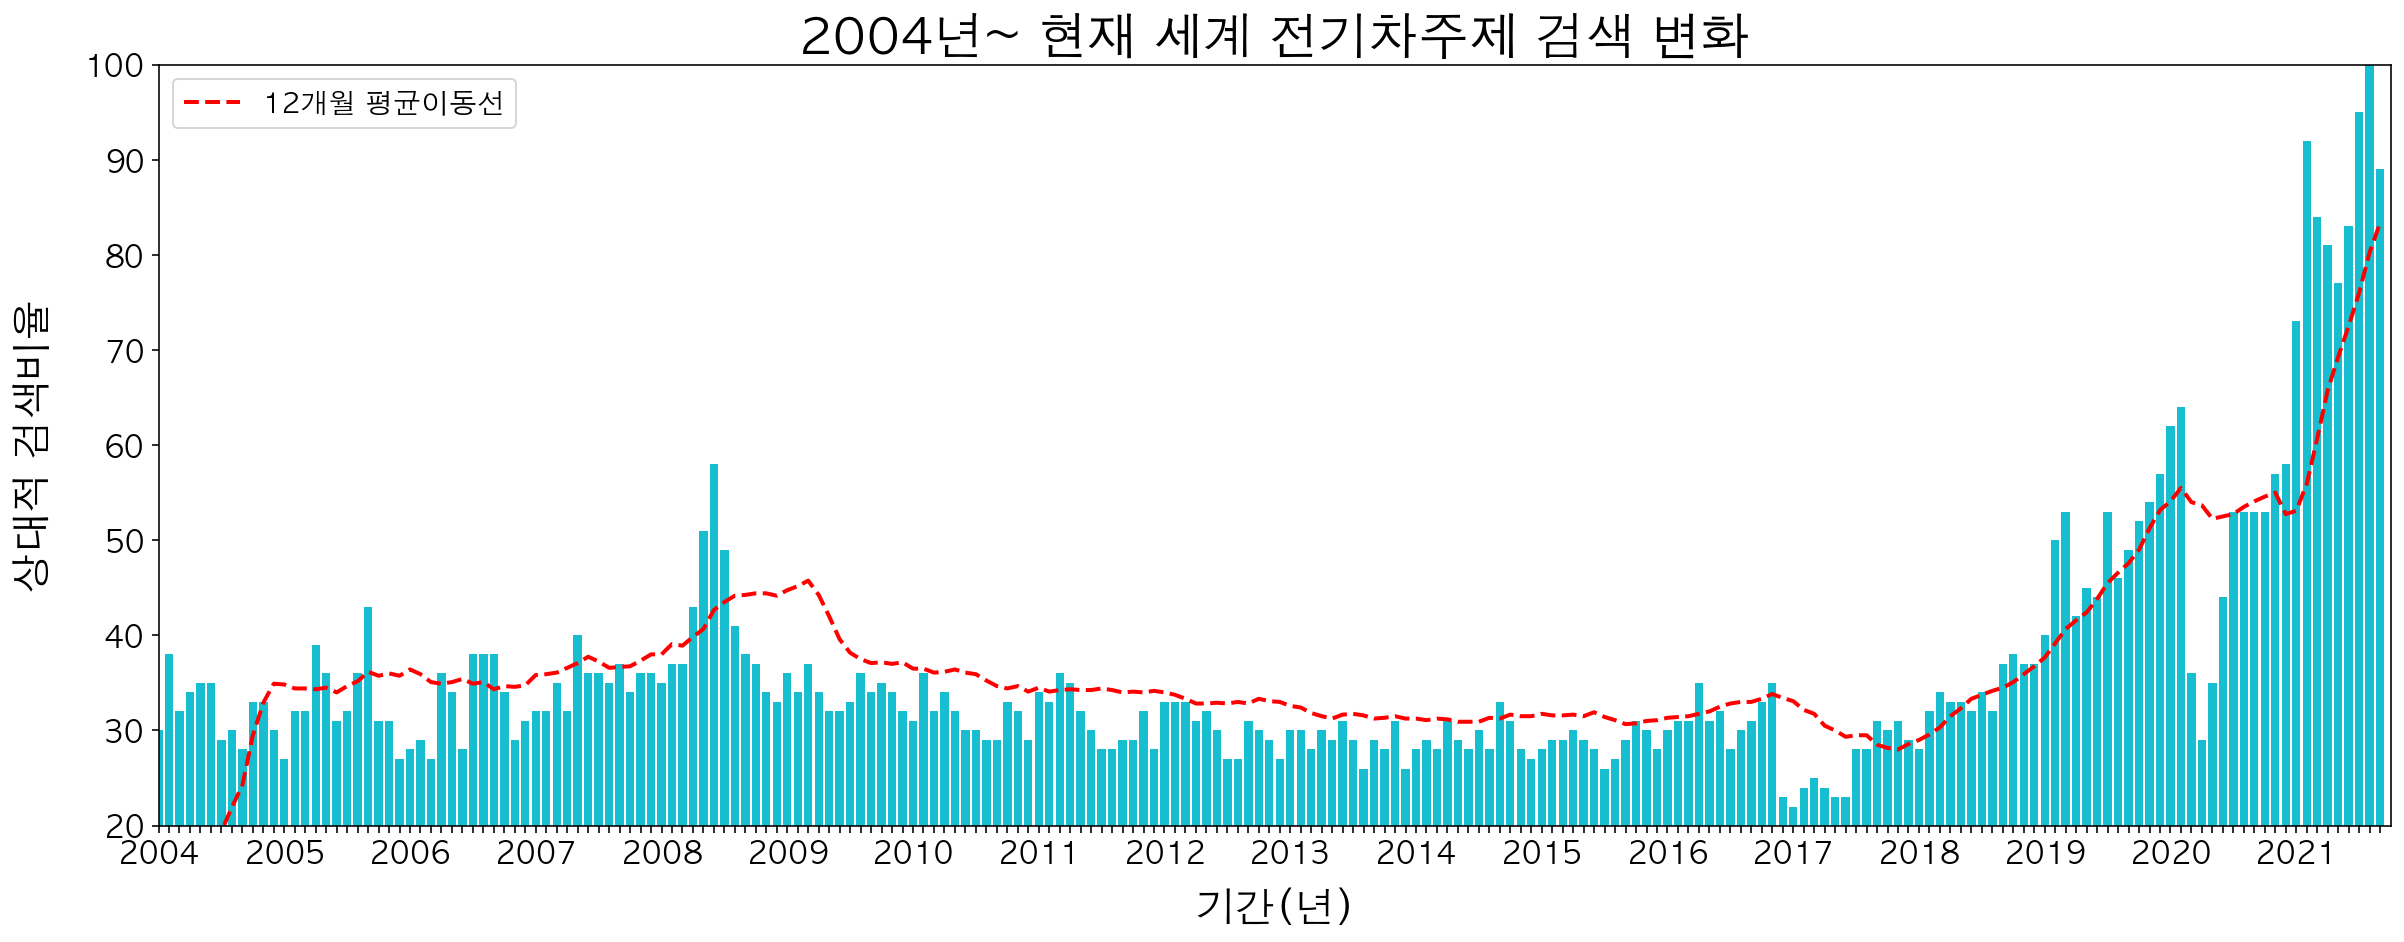

In [66]:
plt.figure(figsize=(20,7))
plt.ylim((20,100))
plt.xlim([0,213])
plt.title('2004년~ 현재 세계 전기차주제 검색 변화',size =25)
plt.xlabel('기간(년)', labelpad = 10, size =20, weight = 800, )
plt.ylabel('상대적 검색비율', labelpad = 15 , size =20)

y = np.arange(len(search_ls1))
plt.plot(y, m12,color = 'red', linewidth=2.0 ,label = '12개월 평균이동선', linestyle = '--')

plt.bar(y, search_ls1,color = '#17becf')
plt.xticks(y, l, fontsize=15)
plt.yticks(fontsize = 15)
plt.legend(fontsize =14)


plt.show()

### 위 시각화 자료에 의하면 다음 정보를 전달해 줄 수 있다.

 
1. 2004년부터 2016년도까지 거의 변화가 없음을 보아 전기차의 어떤 기대의 변화가 없었음을 알 수 있다. 
2. 2017년부터 분명한 추세 변화가 보인다.
3. 2번으로 보아 2017년부터 무슨 변화가 있었음을 알 수 있다.. __어떤 점이 분명히 있다.__


### 2. 웹 크롤링을 통한 데이터 수집 분석

browser = webdriver.Chrome("C://Myexam//chromedriver//chromedriver.exe") <br>
url = "https://trends.google.com/trends/" <br>
browser.get(url) <br>

### 주제명 & 기간 변수
- 시간 변수 없을때는 12개월
- 나라변수 없을때는 전세계

In [67]:
#time.sleep(3)
#words_subject = ['%2Fm%2F01pmdg']
#date_duration = ['','2020-09-06%202021-09-06','2019-09-06%202020-09-06','2018-09-06%202019-09-06','2017-09-06%202018-09-06','2016-09-06%202017-09-06','2015-09-06%202016-09-06','2014-09-06%202015-09-06','2013-09-06%202014-09-06','2012-09-06%2020213-09-06','2011-09-06%2020212-09-06','2010-09-06%2020211-09-06','today%205-y']
#finding = url+'explore?'+'date='+date_duration[0]+'&'+'q='+words_subject[0]
#print(finding)
#browser.get(finding)

### 크롤링
- 크롤링 해야하는 페이지수 지정(계산)
- 가져와야하는 데이터 처리 (랭킹, 나라이름, 검색비중)
- 엑셀에 저장

In [68]:
# time.sleep(3)
# html = browser.page_source
# soup = BeautifulSoup(html, 'html.parser')

# Nstr = browser.find_element_by_css_selector('.pagination').text.strip()
# Nstr[0:2]
# PN = int(Nstr[0:2])
# print('총나라 수 = ',PN)

# if PN % 5 == 0 :
#     b = PN // 5
# else :
#     b = (PN // 5)  + 1
# print('크롤링 해야하는 페이지수 = ',b)

# a = 0
# b 
# c = 0
# country_name_ratio_data = []
# for i in range(b) :
#     a = i + 1
#     print(a)
#     time.sleep(3)
#     html = browser.page_source
#     soup = BeautifulSoup(html, 'html.parser')
#     country_name = soup.select( 'div.label-text')
#     country_ratio = soup.select( 'div.progress-value')
    
#     for i in range(min(len(country_ratio) , len(country_name))) :
#         a1 = country_name[i]
#         a2 = country_ratio[i]
#         b1 = a1.text.strip()
#         b2 = a2.text.strip()
#         c  = c + 1
#         data = [c,b1,b2]
#         country_name_ratio_data.append(data)
#     df = pd.DataFrame(country_name_ratio_data)
#     df.columns = ['ranking','Country Name', 'Search ratio']
#     time.sleep(3)
#     browser.find_element_by_css_selector('.material-icons.arrow-right-active').click()
# df
# df.to_excel('c://My_data//electric_vehicle_serach_rank.xlsx', index = False)
# print('저장완료')

## 데이터 분석
### 설명
- 데이터 열 추가 : 데이터에 각나라에 한가지 색을 지정하고 대한민국에만 다른 색을 지정해야한다.
- 엑섹 데이터 파일에 다시 저장한다.
- 데이터 프레임을 불러와 확인한다.
- 위 과정을 1년, 5년 누적 데이터를 처리한다.

### 설명
- 데이터 열 추가 : 데이터에 각나라에 한가지 색을 지정하고 대한민국에만 다른 색을 지정해야한다.
- 엑섹 데이터 파일에 다시 저장한다.
- 데이터 프레임을 불러와 확인한다.
- 위 과정을 1년, 5년 누적 데이터를 처리한다.

In [72]:
df = pd.read_excel('/Users/user/Downloads/My_data/electric_vehicle_serach_ranktoday_201-y.xlsx', usecols = [0,1,2])
df['colorIndex'] = np.where(df['Country Name']=='대한민국', 'red', 'dodgerblue')
df.to_excel('/Users/user/Downloads/My_data/electric_vehicle_serach_ranktoday_201-y.xlsx', index = False)

In [76]:
DF1 = pd.read_excel('/Users/user/Downloads/My_data/electric_vehicle_serach_ranktoday_201-y.xlsx', usecols = [1,2,3])
print(DF1.head())
print(DF1.tail())

  Country Name  Search ratio  colorIndex
0         뉴질랜드           100  dodgerblue
1           영국            75  dodgerblue
2           인도            74  dodgerblue
3         싱가포르            73  dodgerblue
4           네팔            72  dodgerblue
   Country Name  Search ratio  colorIndex
46          러시아             5  dodgerblue
47          멕시코             4  dodgerblue
48          브라질             3  dodgerblue
49        아르헨티나             3  dodgerblue
50           일본             2  dodgerblue


In [77]:
df = pd.read_excel('/Users/user/Downloads/My_data/electric_vehicle_serach_ranktoday_205-y.xlsx', usecols = [0,1,2])
df['colorIndex'] = np.where(df['Country Name']=='대한민국', 'red', 'dodgerblue')
df.to_excel('/Users/user/Downloads/My_data/electric_vehicle_serach_ranktoday_205-y.xlsx', index = False)

In [78]:
DF5 = pd.read_excel('/Users/user/Downloads/My_data/electric_vehicle_serach_ranktoday_205-y.xlsx', usecols = [1,2,3])
print(DF5.head())
print(DF5.tail())

  Country Name  Search ratio  colorIndex
0         뉴질랜드           100  dodgerblue
1          캐나다            79  dodgerblue
2           네팔            77  dodgerblue
3           영국            74  dodgerblue
4         노르웨이            73  dodgerblue
   Country Name  Search ratio  colorIndex
52           페루             5  dodgerblue
53        아르헨티나             5  dodgerblue
54          브라질             4  dodgerblue
55           이란             4  dodgerblue
56           일본             3  dodgerblue


### 정확한 비교를 위하여 5년누적 데이터에서 (아래 6개나라를) 차의만큼 제외처리

In [79]:
len(DF5)-len(DF1)

6

In [80]:
DF5_1 = DF5.drop(index = [51,52,53,54,55,56])

In [81]:
print(DF1.tail())
print(DF5_1.tail())

   Country Name  Search ratio  colorIndex
46          러시아             5  dodgerblue
47          멕시코             4  dodgerblue
48          브라질             3  dodgerblue
49        아르헨티나             3  dodgerblue
50           일본             2  dodgerblue
   Country Name  Search ratio  colorIndex
46          이집트             8  dodgerblue
47         이탈리아             7  dodgerblue
48          멕시코             7  dodgerblue
49      사우디아라비아             7  dodgerblue
50          러시아             6  dodgerblue


## 데이터 시각화
- 3개 열의 데이터를 각각 리스트로 추출: (색 인덱스: color_ls), (나라 이름: countryN_ls), (검색 비중 : searchR_ls)
- 가로 바 그래프 구현 (왼쪽:5년 오른쪽:1년)
- 그래프 전체 사이즈 정의
- 각 타이틀 정의, x,y축설명 정의

In [83]:
DF1 = pd.read_excel('/Users/user/Downloads/My_data/electric_vehicle_serach_ranktoday_201-y.xlsx', usecols = [1,2,3])

color_ls_1y=list(reversed((np.array(DF1['colorIndex'].tolist()))))
countryN_ls_1y=list(reversed(np.array(DF1['Country Name'].tolist())))
searchR_ls_1y=list(reversed(np.array(DF1['Search ratio'].tolist())))

In [84]:
DF5 = pd.read_excel('/Users/user/Downloads/My_data/electric_vehicle_serach_ranktoday_205-y.xlsx', usecols = [1,2,3])
DF5_1 = DF5.drop(index = [51,52,53,54,55,56])

color_ls_5y=list(reversed((np.array(DF5_1['colorIndex'].tolist()))))
countryN_ls_5y=list(reversed(np.array(DF5_1['Country Name'].tolist())))
searchR_ls_5y=list(reversed(np.array(DF5_1['Search ratio'].tolist())))

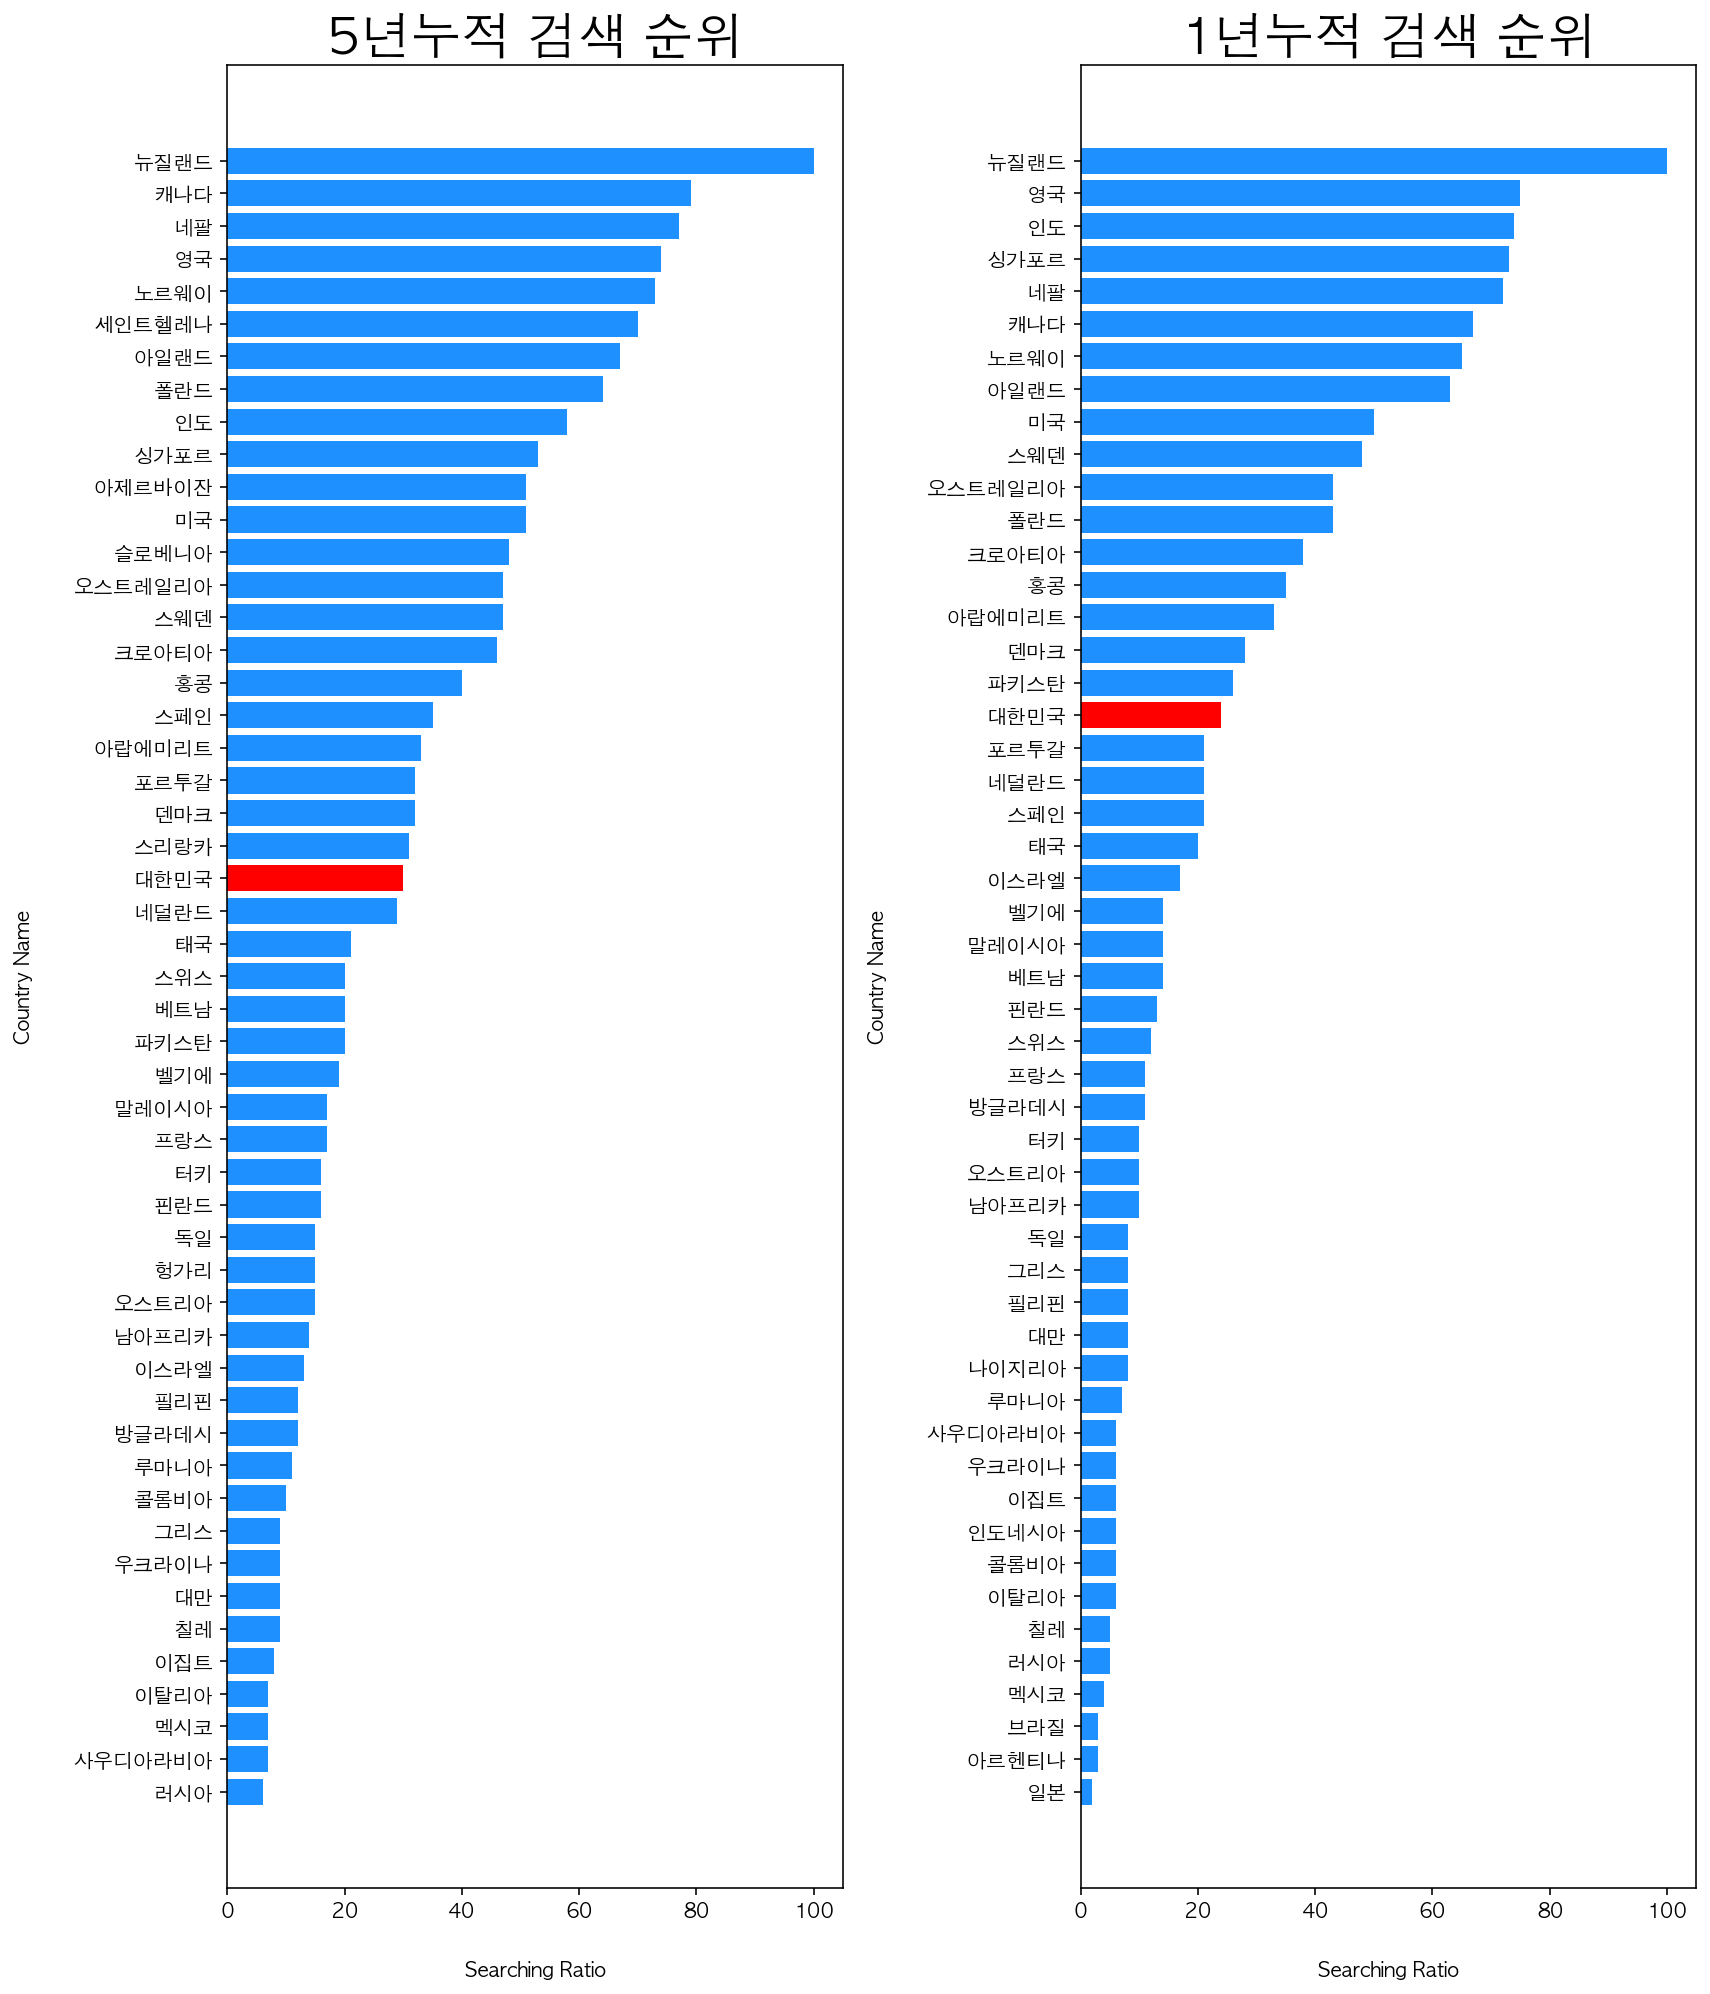

In [85]:
plt.figure(figsize=(12,14))

plt.subplot(1,2,2)

plt.title('1년누적 검색 순위',size =25)
y = np.arange(len(countryN_ls_1y))
plt.barh(y, searchR_ls_1y, color=color_ls_1y)
plt.yticks(y, countryN_ls_1y)

D1=plt.xlabel('Searching Ratio', labelpad=20, )
D1=plt.ylabel('Country Name', labelpad=20, )

plt.subplot(1,2,1)

plt.title('5년누적 검색 순위',size =25)
y = np.arange(len(countryN_ls_5y))
plt.barh(y, searchR_ls_5y, color=color_ls_5y)
plt.yticks(y, countryN_ls_5y)

D5=plt.xlabel('Searching Ratio', labelpad=20, )
D5=plt.ylabel('Country Name', labelpad=20, )

plt.tight_layout()

### 위 시각화 자료에 의하면 다음 정보를 전달해 줄 수 있다.

1. 우리나라의 국민들의 전기차에관한 관심은 과거 5년 보다 1년동안 증가 해왔음을 알 수 있다.
2. 우리나라의 전기차에 관한 관심은 세계에 상위 그룹에 꾸준히 속해왔다. 
3. (저탄소 배출 국가진입으로 선언한 선진국중 하나인 우리나라 이지만) 하지만, 유럽과 북미 국가들과 같은 높은 관심도를 가지기엔 아직 부족하다. __어떤 문제점이 분명히 있다.__

---

## 한국의 전기자동차 증가추세 및 전국의 지역별 충전소 현황과 전기차 등록대수 현황 분석

### 데이터 수집
* 국토 교통부 보도 자료 :시도별 연료별 등록 현황, 시도별 전기차 충전소 위치 <br>
* 환경부 전기자동차 충전기 보급 현황 <br>
* 한국전력 공사 지역별 전기차 충전소 현황 <br>

### 데이터 분석
* 전체 등록된 자동차와 전기차 등록수를 통해 얻은 전기차 비율의 데이터를 데이터 프레임 및 matplot 그래프를 통해 비교 <br>
* 지역별 전기차 수와 충전소 수를 데이터 프레임 및 Folium을 통한 지도에 표현하여 비교 <br>
* 지역별 전기차 수, 지역별 충전소 수의 데이터를 합쳐 각 지역별 충전소가 몇대의 차량을 할당해야 하는지 비교 <br>

In [89]:
#국내 자동차 등록 현황 및 전기차 등록 현황
df11 = pd.read_csv('/Users/user/Downloads/자동차 등록 현황 2.csv', encoding = 'utf-8')
df11['전기차비율(%)'] = (df11['전기차']/(df11['대수(만대)']*10000))*100   # 전기차 비율을 테이블에 추가
df11.set_index('연도', inplace = True)
df11.head(13)

대수(만대)  증가(천대)  증가율(%)  하이브리드차     전기차  친환경차 등록 비중(%)  전기차비율(%)
연도                                                                   
2008    1679     366     2.2       0       0            0.0  0.000000
2009    1733     531     3.2       0       0            0.0  0.000000
2010    1794     616     3.6       0       0            0.0  0.000000
2011    1844     496     2.8       0       0            0.0  0.000000
2012    1887     434     2.3       0       0            0.0  0.000000
2013    1940     530     2.8  103580    1464            0.5  0.007546
2014    2012     717     3.7  137522    2775            0.7  0.013792
2015    2099     872     4.3  174620    5712            0.9  0.027213
2016    2180     813     3.9  233216   10855            1.1  0.049794
2017    2253     725     3.3  313856   25108            1.5  0.111443
2018    2320     674     3.0  405084   55756            2.0  0.240328
2019    2368     475     2.0  506047   89918            2.5  0.379721
2020    2437     689     2.9  674461  134962            3.4  0.553804

#### 연도별 전기차 비율 그래프

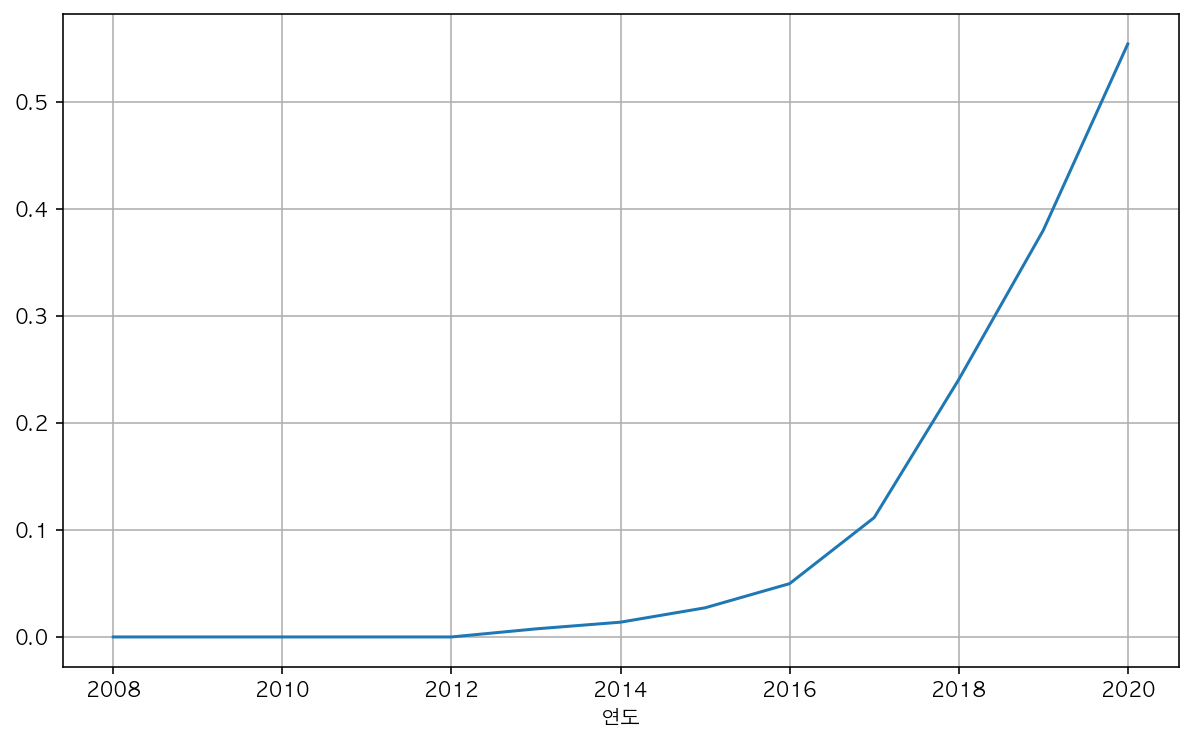

In [90]:
df11['전기차비율(%)'].plot(kind = 'line', grid = True, figsize = (10,6))
plt.show() 

### 연료별 차량 등록 현황

In [91]:
df12 = pd.read_csv('/Users/user/Downloads/연료별 연도 차량 등록 형황.csv', encoding = 'utf-8')
df12.head(9)

연료      2014      2015      2016      2017      2018  \
0                     합계  20117955  20989885  21803351  22528295  23202555   
1                    휘발유   9587351   9808633  10092399  10369752  10629296   
2                     경유   7938627   8622179   9170456   9576395   9929537   
3                  하이브리드    137522    174620    233216    313856    405084   
4                    CNG     40457     39777     38880     38918     38934   
5                     전기      2775      5712     10855     25108     55756   
6                     수소         x        29        87       170       893   
7  기타(등유, 알코올, 태양열, LNG)     74567     81488     90364     99421    107652   

       2019      2020  
0  23677366  24365979  
1  10960779  11410484  
2   9957543   9992124  
3    506047    674461  
4     38147     36940  
5     89918    134962  
6      5083     10906  
7    115119    126695

#### 시, 도별 연료별 등록 현황

In [105]:
df = pd.read_csv('/Users/user/Downloads/시도별 연료별 등록 현황.csv')
df

시, 도명    수소     전기   하이브리드      소계
0     서울특별시  1671  23393  115280  140344
1     부산광역시   916   5355   38914   45185
2     대구광역시    66  12630   34936   47632
3     인천광역시   488   5366   58590   64444
4     광주광역시   701   3210   17459   21370
5     대전광역시   507   4469   17655   22631
6     울산광역시  1819   2274   14125  181218
7   세종특별자치시    42   1148    7716    8906
8       경기도  1578  20477  186711  208766
9       강원도   856   4078   17819   22753
10     충청남도   468   5489   23587   29544
11     충청북도   332   3883   18663   22878
12     전라북도   409   3323   19306   23038
13     전라남도   127   5223   23373   26723
14     경상북도    18   7051   27133   34202
15     경상남도   908   6308   37610   44826
16  제주특별자치도     0  21285   17584   38869

In [94]:
#json import
geo_path = '/Users/user/Downloads/korea.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

#### Folium을 통해 지도에 표현

In [95]:
df = df.set_index('시, 도명')
map_elec = folium.Map(location=[36.8,127.5],zoom_start=7,width=650,tiles="OpenstreetMap")
choropleth= folium.Choropleth(geo_data = geo_str,
                   data= df['전기'],
                   columns=[df.index, df['전기']],
                   fill_color='YlOrRd', fill_opacity = 0.7, line_opacity = 0.5,
                   legend_name = '전기차 등록수',
                   key_on='feature.properties.CTP_KOR_NM',
                   hightlight = True).add_to(map_elec)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CTP_KOR_NM'],labels=False))
title_html = '<h3 align="center" style="font-size:20px"><b>전기차 등록수</b></h3>'
map_elec.get_root().html.add_child(folium.Element(title_html))
folium.LayerControl().add_to(map_elec)
folium.Marker([37.566376216047416, 126.97793714752575],tooltip = ('<h4><b>서울특별시</h4></b><br>'
                                                                  '<b>23393</b>(대)<br>'),
                                                                  icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.18161401251675, 129.0749009303332],tooltip = ('<h4><b>부산광역시</h4></b><br>'
                                                                  '<b>5355</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.872724798317336, 128.60157820151056],tooltip = ('<h4><b>대구광역시</h4></b><br>'
                                                                  '<b>12630</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([37.45717854625683, 126.70608712866449],tooltip = ('<h4><b>인천광역시</h4></b><br>'
                                                                  '<b>5366</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.16154890940474, 126.85113223821762],tooltip = ('<h4><b>광주광역시</h4></b><br>'
                                                                  '<b>3210</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([36.35183798303863, 127.38456097213506],tooltip = ('<h4><b>대전광역시</h4></b><br>'
                                                                  '<b>4469</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.54108779541202, 129.311012377861],tooltip = ('<h4><b>울산광역시</h4></b><br>'
                                                                  '<b>2274</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([36.48151087488188, 127.28824958043015],tooltip = ('<h4><b>세종특별자치시</h4></b><br>'
                                                                  '<b>1148</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([37.27587380587975, 127.00952278547365],tooltip = ('<h4><b>경기도</h4></b><br>'
                                                                  '<b>20477</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([37.88654869282715, 127.72994722988823],tooltip = ('<h4><b>강원도</h4></b><br>'
                                                                  '<b>4078</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([36.66197506027618, 126.67255976505552],tooltip = ('<h4><b>충청남도</h4></b><br>'
                                                                  '<b>5489</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([36.63718549459551, 127.49116190361212],tooltip = ('<h4><b>충청북도</h4></b><br>'
                                                                  '<b>3883</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.821611454685836, 127.10838343999644],tooltip = ('<h4><b>전라북도</h4></b><br>'
                                                                  '<b>3323</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([34.81769711766335, 126.46266646799148],tooltip = ('<h4><b>전라남도</h4></b><br>'
                                                                  '<b>5223</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([36.57691547616853, 128.50568119550917],tooltip = ('<h4><b>경상북도</h4></b><br>'
                                                                  '<b>7051</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.23997169488024, 128.69214026911433],tooltip = ('<h4><b>경상남도</h4></b><br>'
                                                                  '<b>6308</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([33.37116300534748, 126.53038014320936],tooltip = ('<h4><b>제주특별자치도</h4></b><br>'
                                                                  '<b>21285</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)

map_elec

#### 지역별 전기차 충전소 현황

In [104]:
df1 = pd.read_csv('/Users/user/Downloads/한국전력공사_지역별 전기차 충전소 현황정보.csv')
df1

지역  2016  2017  2018  2019  2020
0       강원도     5   118   142   169   174
1       경기도    22   572   632   682   737
2      경상남도    23   197   233   253   265
3      경상북도     8   128   178   192   209
4     광주광역시     4    54    76    87    91
5     대구광역시     4   181   205   223   241
6     대전광역시     3    86    98   105   107
7     부산광역시     6    97   120   126   137
8     서울특별시    28   444   518   546   580
9   세종특별자치시     1    48    61    61    63
10    울산광역시     4    38    42    45    48
11    인천광역시     3   117   129   134   148
12     전라남도    20   127   154   173   186
13     전라북도     9   109   130   143   149
14  제주특별자치도     7   156   186   205   203
15     충청남도     5    74    98   110   119
16     충청북도    13   125   145   153   173

### Folium을 통해 지도에 표현

In [204]:
geo_path = '/Users/user/Downloads/korea.json'
geo_str1= json.load(open(geo_path, encoding = 'utf-8')) 
df1 = df1.set_index('지역')
map_cs = folium.Map(location=[36.8,127.5],zoom_start=7,width=650)
map_cs.choropleth(geo_data=geo_str1,
                  data=df1['2020'],
                  columns=[df1.index,df1['2020']],
                  fill_color='PuRd',
                  key_on='feature.properties.CTP_KOR_NM',
                  legend_name = '충전소 수',
                  hightlight = True)
folium.Marker([37.566376216047416, 126.97793714752575],tooltip = ('<h4><b>서울특별시</h4></b><br>'
                                                                  '<b>580</b>(충전소 수)<br>'),
                                                                  icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.18161401251675, 129.0749009303332],tooltip = ('<h4><b>부산광역시</h4></b><br>'
                                                                  '<b>137</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.872724798317336, 128.60157820151056],tooltip = ('<h4><b>대구광역시</h4></b><br>'
                                                                  '<b>241</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([37.45717854625683, 126.70608712866449],tooltip = ('<h4><b>인천광역시</h4></b><br>'
                                                                  '<b>148</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.16154890940474, 126.85113223821762],tooltip = ('<h4><b>광주광역시</h4></b><br>'
                                                                  '<b>91</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([36.35183798303863, 127.38456097213506],tooltip = ('<h4><b>대전광역시</h4></b><br>'
                                                                  '<b>107</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.54108779541202, 129.311012377861],tooltip = ('<h4><b>울산광역시</h4></b><br>'
                                                                  '<b>48</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([36.48151087488188, 127.28824958043015],tooltip = ('<h4><b>세종특별자치시</h4></b><br>'
                                                                  '<b>63</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([37.27587380587975, 127.00952278547365],tooltip = ('<h4><b>경기도</h4></b><br>'
                                                                  '<b>737</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([37.88654869282715, 127.72994722988823],tooltip = ('<h4><b>강원도</h4></b><br>'
                                                                  '<b>174</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([36.66197506027618, 126.67255976505552],tooltip = ('<h4><b>충청남도</h4></b><br>'
                                                                  '<b>119</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([36.63718549459551, 127.49116190361212],tooltip = ('<h4><b>충청북도</h4></b><br>'
                                                                  '<b>173</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.821611454685836, 127.10838343999644],tooltip = ('<h4><b>전라북도</h4></b><br>'
                                                                  '<b>149</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([34.81769711766335, 126.46266646799148],tooltip = ('<h4><b>전라남도</h4></b><br>'
                                                                  '<b>186</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([36.57691547616853, 128.50568119550917],tooltip = ('<h4><b>경상북도</h4></b><br>'
                                                                  '<b>209</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.23997169488024, 128.69214026911433],tooltip = ('<h4><b>경상남도</h4></b><br>'
                                                                  '<b>265</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([33.37116300534748, 126.53038014320936],tooltip = ('<h4><b>제주특별자치도</h4></b><br>'
                                                                  '<b>203</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
map_cs

#### 지역별 전기차 데이터와 충전소 취합

In [108]:
df.rename(columns={df.columns[0] : '지역'}, inplace= True)

In [109]:
df

지역    수소     전기   하이브리드      소계
0     서울특별시  1671  23393  115280  140344
1     부산광역시   916   5355   38914   45185
2     대구광역시    66  12630   34936   47632
3     인천광역시   488   5366   58590   64444
4     광주광역시   701   3210   17459   21370
5     대전광역시   507   4469   17655   22631
6     울산광역시  1819   2274   14125  181218
7   세종특별자치시    42   1148    7716    8906
8       경기도  1578  20477  186711  208766
9       강원도   856   4078   17819   22753
10     충청남도   468   5489   23587   29544
11     충청북도   332   3883   18663   22878
12     전라북도   409   3323   19306   23038
13     전라남도   127   5223   23373   26723
14     경상북도    18   7051   27133   34202
15     경상남도   908   6308   37610   44826
16  제주특별자치도     0  21285   17584   38869

In [110]:
ddf = pd.merge(df, df1, on ='지역')
ddf['충전소당 전기차 할당량(대수)']=(ddf['전기']/ddf['2020'])
del ddf['수소']
del ddf['하이브리드']
del ddf['소계']
del ddf['2016']
del ddf['2017']
del ddf['2018']
del ddf['2019']
ddf.sort_values(by='충전소당 전기차 할당량(대수)', ascending=False).head(17)

지역     전기  2020  충전소당 전기차 할당량(대수)
16  제주특별자치도  21285   203        104.852217
2     대구광역시  12630   241         52.406639
6     울산광역시   2274    48         47.375000
10     충청남도   5489   119         46.126050
5     대전광역시   4469   107         41.766355
0     서울특별시  23393   580         40.332759
1     부산광역시   5355   137         39.087591
3     인천광역시   5366   148         36.256757
4     광주광역시   3210    91         35.274725
14     경상북도   7051   209         33.736842
13     전라남도   5223   186         28.080645
8       경기도  20477   737         27.784261
15     경상남도   6308   265         23.803774
9       강원도   4078   174         23.436782
11     충청북도   3883   173         22.445087
12     전라북도   3323   149         22.302013
7   세종특별자치시   1148    63         18.222222

### 데이터 분석 결과 
* 전기차의 비율을 아주 빠른 속도로 증가하고 있음
* `제주`, `대구`, `울산`, `충남`, `대전`, `서울` 은 충전소 1대가 커버해야할 전기차의 수가 굉장히 높음 (충전기 1대당 전기차 40대 이상)
* 위 지역을 우선으로 충전기 확대가 시급해 보임

---

## 전국 휴게소의 전기차 충전소 현황 분석 및 고속도로 주유소/휴게소 매출 규모와 충전기수의 상관성 분석

### 데이터 수집
**1. 전국 전기차 충전소 현황(21/09/05)** <br>
     (전기차 충전소 위치 및 운영정보(한국환경공단), http://www.keco.or.kr/kr/sub/public/ev/step01/index.do) <br>
     파일 : ChargingStation.xlsx
    

**2. 2018년 전국 고속도로 휴게소내 주유소 매출 상위 50위** <br>
     ([휴게소워치 시즌3]⑤경부선 첫주유소 '부동의 매출1위', http://news.bizwatch.co.kr/article/policy/2019/09/09/0018) <br>
     파일 : GasStation_Sale.xlsx <br>
    

**3. 2018년 전국 휴게소 매출 상위 50위**<br>
     ([휴게소워치 시즌3]②덕평 매출1위 유지에 만족, http://news.bizwatch.co.kr/article/policy/2019/09/09/0014/naver)<br>
     파일 : RestPlace_Sales.xlsx <br>

### 데이터 분석
### 1. 전국의 휴게소내에 설치된 전기차 충전소 및 충전기 현황

In [121]:
# 전국 전기차 충전소 현황(환경부, 21/09/05, http://www.keco.or.kr/kr/sub/public/ev/step01/index.do

ChargingStation_a=pd.read_excel('/Users/user/Downloads/ChargingStation.xlsx')

In [122]:
ChargingStation=ChargingStation_a.copy()
ChargingStation

충전소명                   충전기타입     충전기상태                        주소
0         종묘 공영주차장        03(DC 차데모+AC 3상)  9(상태미확인)          서울특별시 종로구 종로 157
1        세종로 공영주차장  06(DC 차데모+AC 3상+DC 콤보)  9(상태미확인)        서울특별시 종로구 세종대로 189
2       그랜드앰배서더 서울  06(DC 차데모+AC 3상+DC 콤보)  9(상태미확인)          서울특별시 중구 동호로 287
3       한강진역 공영주차장        03(DC 차데모+AC 3상)  9(상태미확인)      서울특별시 용산구 한남동 산10-84
4      기아차 성동서비스센터        03(DC 차데모+AC 3상)  9(상태미확인)      서울특별시 성동구 성수이로26길 61
...            ...                     ...       ...                       ...
78553  영남알프스복합웰컴센터               04(DC 콤보)  9(상태미확인)  울산광역시 울주군 상북면 등억알프스리 517
78554   언양읍 행정복지센터               04(DC 콤보)   2(충전대기)       울산광역시 울주군 언양읍 동문길 7
78555   화봉공원 공영주차장               04(DC 콤보)    3(충전중)        울산광역시 북구 화봉동 445-1
78556   화봉공원 공영주차장               04(DC 콤보)    3(충전중)        울산광역시 북구 화봉동 445-1
78557    낙산해수욕장주차장  06(DC 차데모+AC 3상+DC 콤보)  9(상태미확인)        강원도 양양군 강현면 일출로 43

[78558 rows x 4 columns]

In [123]:
# 1열 '충전소명' : 문자열 중간 공백 제거 (같은 장소인데 공백으로 인해 다른 장소로 인식)
ChargingStation['충전소명'] = ChargingStation['충전소명'].str.split().agg("".join)

In [124]:
# 1열 '충전소명'에서 '휴게소'에 해당하는 행만 추출
ChargingStation_Rest=ChargingStation[ChargingStation['충전소명'].str.contains('휴게소')]

In [125]:
# 필요없는 열(충전기 상태) 삭제 및 열 이름 영어로 변경
ChargingStation_Rest.drop(columns='충전기상태', inplace=True)
ChargingStation_Rest.rename(columns = {'충전소명' : 'restplace_names', '충전기타입':'charger_types', '주소':'restplace_address'}, 
                      inplace = True)

In [126]:
ChargingStation_Rest

restplace_names           charger_types         restplace_address
52        장안휴게소(울산방향)  06(DC 차데모+AC 3상+DC 콤보)   부산광역시 기장군 장안읍 동해고속도로 26
53        장안휴게소(부산방향)  06(DC 차데모+AC 3상+DC 콤보)     부산광역시 기장군 장안읍 명례리 835
111       의왕휴게소(서울방향)  06(DC 차데모+AC 3상+DC 콤보)            경기도 의왕시 오전로 24
112       의왕휴게소(의왕방향)  06(DC 차데모+AC 3상+DC 콤보)            경기도 의왕시 오전로 24
114      서하남휴게소(판교방향)  06(DC 차데모+AC 3상+DC 콤보)     경기도 하남시 서울외곽순환고속도로 19
...               ...                     ...                       ...
76558           별내휴게소  06(DC 차데모+AC 3상+DC 콤보)  경기도 남양주시 별내면 구리포천고속도로 14
76559        CU화도휴게소점  06(DC 차데모+AC 3상+DC 콤보)          경기도 남양주시 화도읍 경춘로
78535        상개화물차휴게소               04(DC 콤보)           울산광역시 남구 상개동 50
78546        약수화물차휴게소               04(DC 콤보)          울산광역시 북구 신천동 797
78547        약수화물차휴게소               04(DC 콤보)          울산광역시 북구 신천동 797

[670 rows x 3 columns]

#### 1) 전기차 충전이 가능한 전국의 휴게소 수와 충전기 대수

In [127]:
# 휴게소별 충전기 개수 카운트 
charger_per_restplace = ChargingStation_Rest.groupby(['restplace_names']).count() 
charger_per_restplace.head()

charger_types  restplace_address
restplace_names                                  
(청주방면)청송휴게소                  1                  1
38선휴게소                       1                  1
CU화도휴게소점                     1                  1
GS25신남휴게소점                   1                  1
HK하이웨이평택휴게소(상행)              4                  4

In [128]:
# restplace_names를 index에서 1열로 변경
charger_per_restplace  = charger_per_restplace.rename_axis('restplace_names').reset_index()

In [129]:
# charger_types 열 이름 변경
charger_per_restplace.rename(columns = {'charger_types' : 'num_of_chargers'}, inplace = True)
# restplace_address삭제
charger_per_restplace.drop(columns='restplace_address', inplace=True)

In [130]:
charger_per_restplace
# 전기차 충전이 가능한 휴게소 290개

restplace_names  num_of_chargers
0        (청주방면)청송휴게소                1
1             38선휴게소                1
2           CU화도휴게소점                1
3         GS25신남휴게소점                1
4    HK하이웨이평택휴게소(상행)                4
..               ...              ...
285      황간휴게소(서울방향)                2
286      황전휴게소(순천방향)                1
287      황전휴게소(전주방향)                1
288      횡성휴게소(강릉방향)                8
289      횡성휴게소(인천방향)                2

[290 rows x 2 columns]

In [131]:
charger_per_restplace['num_of_chargers'].sum()
# 전기차 충전이 가능한 휴게소에서 보유한 충전기 : 총 670대

670

In [132]:
round(charger_per_restplace['num_of_chargers'].mean(),2)
# 휴게소별 보유한 충전기 대수 평균 : 2.31

2.31

#### 2) 충전 타입별 충전기 대수

In [133]:
# 충전기 타입별 충전기 개수
charger_per_type = ChargingStation_Rest.groupby(['charger_types']).count() 
charger_per_type

restplace_names  restplace_address
charger_types                                             
02(AC 완속)                            15                 15
03(DC 차데모+AC 3상)                      1                  1
04(DC 콤보)                           195                194
05(DC 차데모+DC 콤보)                      3                  3
06(DC 차데모+AC 3상+DC 콤보)              456                456

In [134]:
# charger_types를 index에서 1열로 변경
charger_per_type = charger_per_type.rename_axis('charger_types').reset_index()

In [135]:
# restplace_names열 이름 변경
charger_per_type.rename(columns = {'restplace_names' : 'num_of_chargers'}, inplace = True)
# restplace_address삭제
charger_per_type.drop(columns='restplace_address', inplace=True)

In [136]:
charger_per_type

charger_types  num_of_chargers
0               02(AC 완속)               15
1        03(DC 차데모+AC 3상)                1
2               04(DC 콤보)              195
3        05(DC 차데모+DC 콤보)                3
4  06(DC 차데모+AC 3상+DC 콤보)              456

In [137]:
'''
* 충전기 종류
 - AC단상 5핀 - 완속 
 - AC3상 7핀 - 급속/완속 (현재 급속으로만 사용됨, 참고: 저공해차 통합누리집(https://www.ev.or.kr/portal/chargerkind))
 - DC차데모 10핀 - 급속
 - DC콤보 7핀 - 급속 '''
# charger_types을 완속/급속으로 구분
charger_per_type.insert(1, 'types', ['완속', '급속', '급속', '급속', '급속'], True)

In [138]:
# charger_types에 따른 충전기 수를 %로 계산 후 새로운 열 추가 : num_of_chargers(%) 
charger_per_type['num_of_chargers(%)']=((charger_per_type['num_of_chargers']/sum(charger_per_type['num_of_chargers']))*100).round(1)

In [139]:
charger_per_type
# 휴게소에서 보유한 670대의 충전기 중 완속 충전기는 총 15대(약 2.2%)이며, 나머지는 모두 급속 충전기로 확인

charger_types types  num_of_chargers  num_of_chargers(%)
0               02(AC 완속)    완속               15                 2.2
1        03(DC 차데모+AC 3상)    급속                1                 0.1
2               04(DC 콤보)    급속              195                29.1
3        05(DC 차데모+DC 콤보)    급속                3                 0.4
4  06(DC 차데모+AC 3상+DC 콤보)    급속              456                68.1

In [140]:
charger_per_type['num_of_chargers'].sum()

670

#### 3) 휴게소별 충전기 보유 대수

In [141]:
# 충전기 개수별 휴게소 수 
restplace_per_charger = charger_per_restplace.groupby(['num_of_chargers']).count()

In [142]:
restplace_per_charger

restplace_names
num_of_chargers                 
1                             70
2                            155
3                             41
4                              7
5                              1
6                              3
8                              6
9                              5
11                             1
12                             1

In [143]:
# num_of_chargers를 index에서 1열로 변경
restplace_per_charger= restplace_per_charger.rename_axis('num_of_chargers').reset_index()

In [144]:
# restplace_names열 이름 변경
restplace_per_charger.rename(columns = {'restplace_names' : 'num_of_restplaces'}, inplace = True)

In [145]:
# 충전소별 충전기 보유 대수 비율, 누적 비율 계산
restplace_per_charger['num_of_restplaces(%)']=(restplace_per_charger['num_of_restplaces']/sum(restplace_per_charger['num_of_restplaces']))*100
restplace_per_charger['cum_num_of_restplaces(%)']=restplace_per_charger['num_of_restplaces(%)'].cumsum()
restplace_per_charger['num_of_restplaces(%)']=round(restplace_per_charger['num_of_restplaces(%)'],1)
restplace_per_charger['cum_num_of_restplaces(%)']=round(restplace_per_charger['cum_num_of_restplaces(%)'], 1)

In [146]:
restplace_per_charger

num_of_chargers  num_of_restplaces  num_of_restplaces(%)  \
0                1                 70                  24.1   
1                2                155                  53.4   
2                3                 41                  14.1   
3                4                  7                   2.4   
4                5                  1                   0.3   
5                6                  3                   1.0   
6                8                  6                   2.1   
7                9                  5                   1.7   
8               11                  1                   0.3   
9               12                  1                   0.3   

   cum_num_of_restplaces(%)  
0                      24.1  
1                      77.6  
2                      91.7  
3                      94.1  
4                      94.5  
5                      95.5  
6                      97.6  
7                      99.3  
8                      99.7  
9                     100.0

In [147]:
restplace_per_charger['num_of_restplaces'].sum()
# 충전소가 설치된 휴게소 총 290개

290

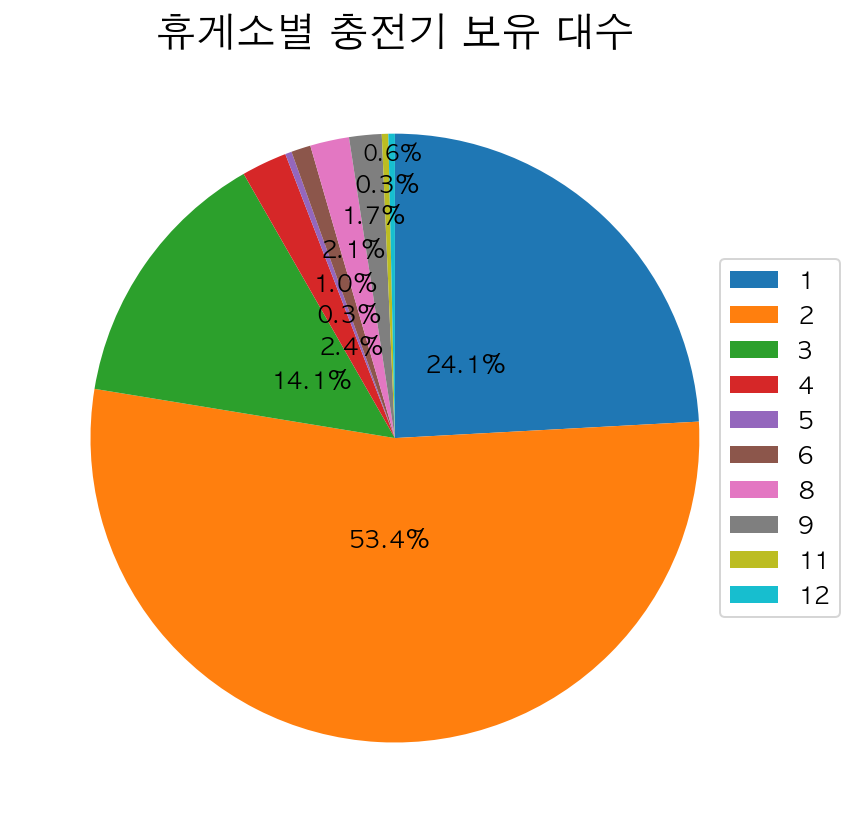

In [148]:
fig = plt.figure(figsize=(7, 7)) 
ax = fig.add_subplot() 
pie = ax.pie(restplace_per_charger['num_of_restplaces'], 
       startangle=90, 
       counterclock=False)
       #labels=charger_station_count['num_of_chargers'],  
       #explode=[0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
    
total = np.sum(restplace_per_charger['num_of_restplaces']) 
threshold = 5
sum_pct = 0 
count_less_5pct = 0 
spacing = 0.1
for i,l in enumerate(restplace_per_charger['num_of_chargers']):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 
    center, r = ax.patches[i].center, ax.patches[i].r 
    
    if restplace_per_charger['num_of_restplaces'][i]/total*100 < threshold:
        x = (r/3+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0]
        y = (r/3+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] 
        count_less_5pct += 1
    else:
        x = (r/3)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] 
        y = (r/3)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] 
    
    if i < len(restplace_per_charger['num_of_chargers']) - 1:
        sum_pct += float('{0:.1f}'.format(restplace_per_charger['num_of_restplaces'][i]/total*100))
        ax.text(x,y,'{0:.1f}%'.format(restplace_per_charger['num_of_restplaces'][i]/total*100), ha='center',va='center',fontsize=12)
    else: 
        ax.text(x,y,f'{100-sum_pct:.1f}%',ha='center',va='center',fontsize=11)
        
ax.set_title('휴게소별 충전기 보유 대수', fontsize=20, loc='center')
plt.legend(pie[0],restplace_per_charger['num_of_chargers'], loc='right', bbox_to_anchor=(1.1, 0.5), fontsize=12) 
plt.show()

## 2. 고속도로 주유소, 휴게소 매출과 해당 휴게소에 설치된 충전기 대수 비교
#### 1) 고속도로 휴게소내 주유소 매출액(상위 50위)과 전기차 충전기 보유 대수 비교

In [149]:
# 고속도로 휴게소 주유소 매출 상위 50(2018년) (참고 : http://news.bizwatch.co.kr/article/policy/2019/09/09/0018)
GasStation_Sales50=pd.read_excel('/Users/user/Downloads/GasStation_Sales.xlsx')

In [150]:
# 한글 열 이름 영어로 변경
GasStation_Sales50.rename(columns = {'순위' : 'ranking', '주유소':'restplace_names', '2018년 매출(단위:억원)':'sales_amount'}, inplace = True)
# 필요없는 열(노선, 증감률) 삭제
GasStation_Sales50.drop(columns='노선', inplace=True)
GasStation_Sales50.drop(columns='증감률(전년대비(%))', inplace=True)

In [151]:
GasStation_Sales50.head()

ranking restplace_names  sales_amount
0        1   서울만남휴게소(부산방향)        703.18
1        2     기흥휴게소(부산방향)        619.18
2        3     망향휴게소(부산방향)        560.77
3        4     안성휴게소(서울방향)        542.51
4        5   하남만남휴게소(통영방향)        536.33

In [152]:
# 주유소 매출과 해당 휴게소에서 보유중인 충전기 대수 자료 병합
charger_per_GSsales=pd.merge(GasStation_Sales50, charger_per_restplace, how='left')
charger_per_GSsales
# 주유소 매출 상위 50위에 포함되나 전기차 충전소가 없는 휴게소 : 여산휴게소(천안방향), 시흥휴게소(외측방향), 함안휴게소(순천방향)

ranking restplace_names  sales_amount  num_of_chargers
0         1   서울만남휴게소(부산방향)        703.18              2.0
1         2     기흥휴게소(부산방향)        619.18              2.0
2         3     망향휴게소(부산방향)        560.77              2.0
3         4     안성휴게소(서울방향)        542.51              8.0
4         5   하남만남휴게소(통영방향)        536.33              1.0
5         6     죽전휴게소(서울방향)        503.17              6.0
6         7     안성휴게소(부산방향)        463.60              9.0
7         8     칠곡휴게소(서울방향)        340.61              3.0
8         9     문경휴게소(양평방향)        335.50              9.0
9        10     용인휴게소(강릉방향)        319.63              2.0
10       11    서하남휴게소(판교방향)        317.70              1.0
11       12     천안휴게소(부산방향)        310.61              2.0
12       13    백양사휴게소(논산방향)        300.89              2.0
13       14     천안휴게소(서울방향)        296.82              3.0
14       15     화성휴게소(시흥방향)        294.13              2.0
15       16     군산휴게소(시흥방향)        278.10              2.0
16       17     화성휴게소(목포방향)        277.47              8.0
17       18     충주휴게소(마산방향)        269.47              2.0
18       19     화서휴게소(상주방향)        265.50              2.0
19       20     죽암휴게소(부산방향)        265.31              2.0
20       21     여산휴게소(천안방향)        260.53              NaN
21       22     입장휴게소(서울방향)        259.31              3.0
22       23     진영휴게소(순천방향)        257.50              5.0
23       24     문경휴게소(마산방향)        254.99              2.0
24       25     음성휴게소(통영방향)        245.15              9.0
25       26     칠곡휴게소(부산방향)        241.40             11.0
26       27     여주휴게소(강릉방향)        239.67              2.0
27       28     음성휴게소(하남방향)        239.27              3.0
28       29     여산휴게소(순천방향)        237.98              1.0
29       30    남성주휴게소(양평방향)        237.57              2.0
30       31    속리산휴게소(청원방향)        220.43              2.0
31       32     죽암휴게소(서울방향)        219.55              3.0
32       33   안성맞춤휴게소(평택방향)        218.19              2.0
33       34   안성맞춤휴게소(제천방향)        216.39              1.0
34       35     여주휴게소(인천방향)        209.38              1.0
35       36     영천휴게소(대구방향)        208.44              1.0
36       37     용인휴게소(서창방향)        205.60              2.0
37       38     칠서휴게소(양평방향)        202.29              2.0
38       39     옥산휴게소(부산방향)        202.15              2.0
39       40     시흥휴게소(외측방향)        201.71              NaN
40       41     오수휴게소(전주방향)        200.30              2.0
41       42     선산휴게소(양평방향)        194.47              1.0
42       43     횡성휴게소(인천방향)        191.84              2.0
43       44    신탄진휴게소(서울방향)        184.38              2.0
44       45     괴산휴게소(마산방향)        183.72              2.0
45       46     충주휴게소(양평방향)        180.90              3.0
46       47     선산휴게소(마산방향)        180.58              2.0
47       48     공주휴게소(당진방향)        179.55              2.0
48       49     함안휴게소(순천방향)        179.16              NaN
49       50     언양휴게소(서울방향)        176.92              2.0

In [153]:
# 충전소가 없는 휴게소의 충전기 대수를 NaN에서 0으로 변경
charger_per_GSsales.fillna(0, inplace=True)
# num_of_chargers열을 실수형에서 정수형 자료로 변경
charger_per_GSsales['num_of_chargers']=charger_per_GSsales['num_of_chargers'].astype(int)

In [154]:
# 매출 상위 50위에 포함된 주유소 매출액의 평균
round(charger_per_GSsales['sales_amount'].mean(),2)

284.6

In [155]:
# 매출 상위 50위에 포함된 주유소가 있는 휴게소에 설치된 충전기 대수의 평균은 2.84개
# 전기차 충전소가 있는 휴게소의 평균 충전기 보유 대수 2.31대 보다 많음 
charger_per_GSsales['num_of_chargers'].mean()

2.84

In [156]:
# 휴게소 주유소 매출액과 보유한 충전기 대수의 상관계수
np.corrcoef(charger_per_GSsales['sales_amount'], charger_per_GSsales['num_of_chargers'])

array([[1.        , 0.23172303],
       [0.23172303, 1.        ]])

[0.00473715 1.49182564]


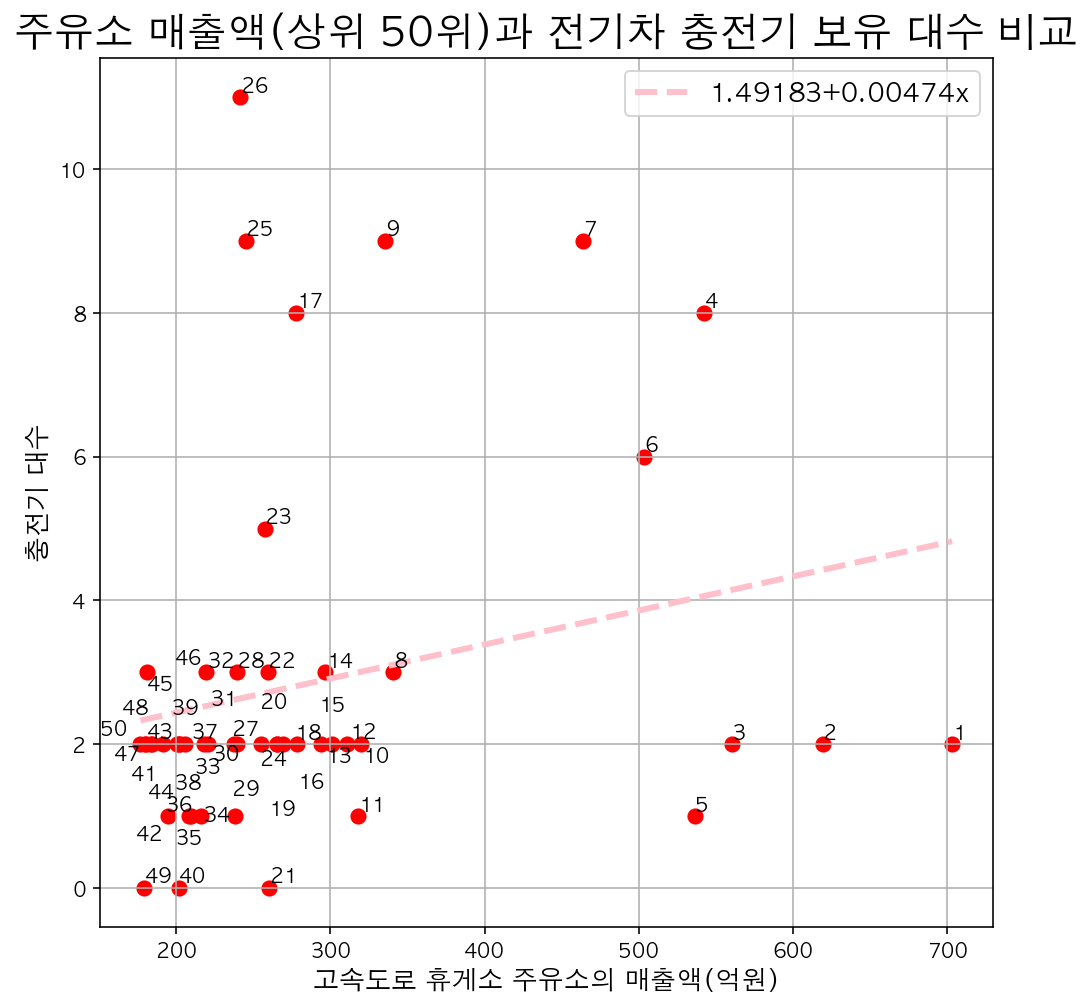

In [157]:
# b0, b1 구하기
poly_fit=np.polyfit(charger_per_GSsales['sales_amount'], charger_per_GSsales['num_of_chargers'], 1)
# b0 + b1x를 반환하는 함수 작성
poly_1d=np.poly1d(poly_fit)
# 직선을 그리기 위한 x좌료를 생성
xs=np.linspace(charger_per_GSsales['sales_amount'].min(), charger_per_GSsales['sales_amount'].max())
# x좌표에 대응하는 y좌표 구하기
ys=poly_1d(xs)
print(poly_fit)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set_xlabel('고속도로 휴게소 주유소의 매출액(억원)', fontsize=13)
ax.set_ylabel('충전기 대수', fontsize=13)
ax.set_title('주유소 매출액(상위 50위)과 전기차 충전기 보유 대수 비교', fontsize=20)

ax.scatter(charger_per_GSsales['sales_amount'], charger_per_GSsales['num_of_chargers'], c='red', s=50)
ax.plot(xs, ys, color='pink', label=f'{poly_fit[1]:.5f}+{poly_fit[0]:.5f}x', ls='dashed', lw=3)
ax.legend(loc='upper right', fontsize=13)

texts = []
for i, txt in enumerate( list(charger_per_GSsales['ranking']) ):
    texts.append(ax.text(list(charger_per_GSsales['sales_amount'])[i], list(charger_per_GSsales['num_of_chargers'])[i], txt))
adjust_text(texts)

plt.grid()
plt.show()


In [158]:
# 매출 상위 50위 이내의 주유소가 있는 휴게소에 설치된 평균 충전기 대수는 2.84개
# 전기차 충전이 가능한 휴게소의 평균 충전기 보유 대수 2.31대 보다 많음 
charger_per_GSsales['num_of_chargers'].mean()

2.84

[0.00473715 1.49182564]


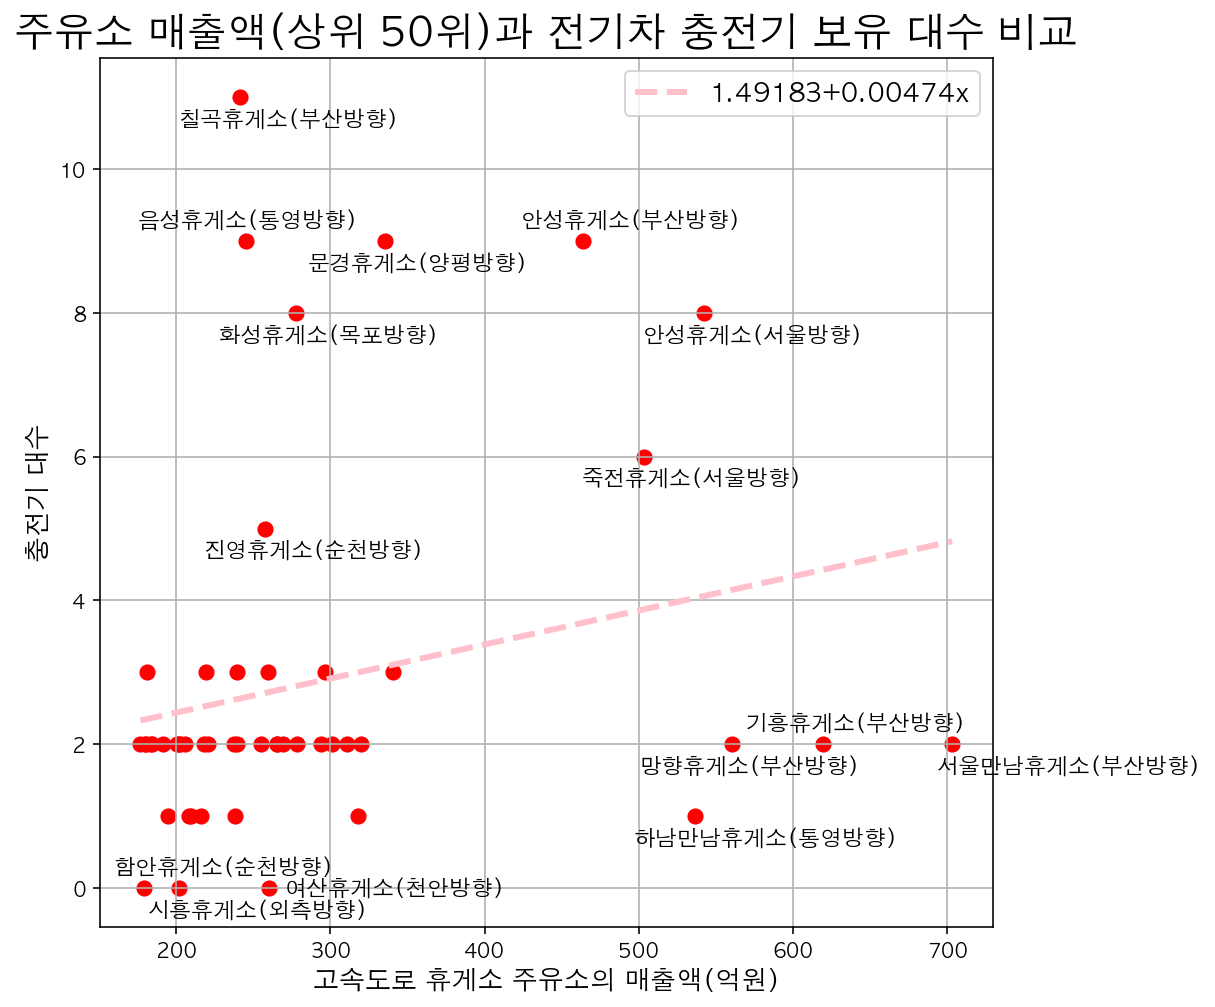

In [159]:
# b0, b1 구하기
poly_fit=np.polyfit(charger_per_GSsales['sales_amount'], charger_per_GSsales['num_of_chargers'], 1)
# b0 + b1x를 반환하는 함수 작성
poly_1d=np.poly1d(poly_fit)
# 직선을 그리기 위한 x좌료를 생성
xs=np.linspace(charger_per_GSsales['sales_amount'].min(), charger_per_GSsales['sales_amount'].max())
# x좌표에 대응하는 y좌표 구하기
ys=poly_1d(xs)
print(poly_fit)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set_xlabel('고속도로 휴게소 주유소의 매출액(억원)', fontsize=13)
ax.set_ylabel('충전기 대수', fontsize=13)
ax.set_title('주유소 매출액(상위 50위)과 전기차 충전기 보유 대수 비교', fontsize=20)
ax.scatter(charger_per_GSsales['sales_amount'], charger_per_GSsales['num_of_chargers'], c='red', s=50)
ax.plot(xs, ys, color='pink', label=f'{poly_fit[1]:.5f}+{poly_fit[0]:.5f}x', ls='dashed', lw=3)
ax.legend(loc='upper right', fontsize=13)

ax.annotate(charger_per_GSsales['restplace_names'][0], (charger_per_GSsales['sales_amount'][0]-10,charger_per_GSsales['num_of_chargers'][0]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][1], (charger_per_GSsales['sales_amount'][1]-50,charger_per_GSsales['num_of_chargers'][1]+0.2), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][2], (charger_per_GSsales['sales_amount'][2]-60,charger_per_GSsales['num_of_chargers'][2]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][3], (charger_per_GSsales['sales_amount'][3]-40,charger_per_GSsales['num_of_chargers'][3]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][4], (charger_per_GSsales['sales_amount'][4]-40,charger_per_GSsales['num_of_chargers'][4]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][5], (charger_per_GSsales['sales_amount'][5]-40,charger_per_GSsales['num_of_chargers'][5]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][6], (charger_per_GSsales['sales_amount'][6]-40,charger_per_GSsales['num_of_chargers'][6]+0.2), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][8], (charger_per_GSsales['sales_amount'][8]-50,charger_per_GSsales['num_of_chargers'][8]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][16], (charger_per_GSsales['sales_amount'][16]-50,charger_per_GSsales['num_of_chargers'][16]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][20], (charger_per_GSsales['sales_amount'][20]+10,charger_per_GSsales['num_of_chargers'][20]-0.1), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][22], (charger_per_GSsales['sales_amount'][22]-40,charger_per_GSsales['num_of_chargers'][22]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][24], (charger_per_GSsales['sales_amount'][24]-70,charger_per_GSsales['num_of_chargers'][24]+0.2), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][25], (charger_per_GSsales['sales_amount'][25]-40,charger_per_GSsales['num_of_chargers'][25]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][39], (charger_per_GSsales['sales_amount'][39]-20,charger_per_GSsales['num_of_chargers'][39]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][48], (charger_per_GSsales['sales_amount'][48]-20,charger_per_GSsales['num_of_chargers'][39]+0.2), fontsize=11)

plt.grid()
plt.show()

#### 2) 휴게소 매출액(상위 50위)과 전기차 충전기 보유 대수 비교

In [160]:
# 고속도로 휴게소 매출 상위 50 (2018년) (http://news.bizwatch.co.kr/article/policy/2019/09/09/0014/naver)
RestPlace_Sales50=pd.read_excel('/Users/user/Downloads/RestPlace_Sales.xlsx')

In [161]:
# 한글 열 이름 영어로 변경
RestPlace_Sales50.rename(columns = {'순위' : 'ranking', '주유소':'restplace_names', '2018년 매출(단위:억원)':'sales_amount'}, inplace = True)

In [162]:
RestPlace_Sales50.head()

ranking restplace_names  sales_amount
0        1           덕평휴게소        500.70
1        2          행담도휴게소        340.17
2        3         시흥하늘휴게소        277.12
3        4     안성휴게소(부산방향)        271.87
4        5     천안휴게소(서울방향)        209.69

In [163]:
# 고속도로 휴게소 매출과 보유중인 충전기 대수 자료 병합
charger_per_RPsales= pd.merge(RestPlace_Sales50, charger_per_restplace, how='left')

In [164]:
# 양방향 진입 가능한 고속도로 휴게소 충전기 대수 수동 계산해서 입력 (시흥하늘 휴게소 제외)
charger_per_RPsales['num_of_chargers'][0]=4 # 강릉방향 3, 인천방향 1
charger_per_RPsales['num_of_chargers'][1]=2 # 목포방향 1, 서울방향 1
charger_per_RPsales['num_of_chargers'][8]=2 # 롯데마트마장휴게소(통영방향) 1, 마장복합휴게소 1
charger_per_RPsales['num_of_chargers'][11]=11 # 서울방향 8, 양양방향 3
charger_per_RPsales['num_of_chargers'][40]=10 # 부산방향 1, 경남김해진영휴게소(급속) 9

In [165]:
charger_per_RPsales
# 휴게소 매출 상위 50위에 포함되나 전기차 충전소가 없는 휴게소 :  시흥하늘휴게소, 함안휴게소(순천방향), 여산휴게소(천안방향)

ranking restplace_names  sales_amount  num_of_chargers
0         1           덕평휴게소        500.70              4.0
1         2          행담도휴게소        340.17              2.0
2         3         시흥하늘휴게소        277.12              NaN
3         4     안성휴게소(부산방향)        271.87              9.0
4         5     천안휴게소(서울방향)        209.69              3.0
5         6     망향휴게소(부산방향)        192.46              2.0
6         7     안성휴게소(서울방향)        188.42              8.0
7         8     여주휴게소(강릉방향)        185.59              2.0
8         9           마장휴게소        178.24              2.0
9        10     칠곡휴게소(서울방향)        171.48              3.0
10       11     기흥휴게소(부산방향)        170.37              2.0
11       12          내린천휴게소        169.19             11.0
12       13     죽전휴게소(서울방향)        151.32              6.0
13       14     화성휴게소(목포방향)        151.13              8.0
14       15     화성휴게소(시흥방향)        148.39              2.0
15       16     금강휴게소(부산방향)        142.37              3.0
16       17     용인휴게소(강릉방향)        142.20              2.0
17       18     죽암휴게소(부산방향)        140.47              2.0
18       19     횡성휴게소(강릉방향)        139.73              8.0
19       20     진영휴게소(순천방향)        135.48              5.0
20       21     서산휴게소(목포방향)        133.71              2.0
21       22     칠곡휴게소(부산방향)        132.88             11.0
22       23     천안휴게소(부산방향)        132.78              2.0
23       24   하남만남휴게소(통영방향)        125.65              1.0
24       25     선산휴게소(양평방향)        124.18              1.0
25       26     입장휴게소(서울방향)        122.13              3.0
26       27     함안휴게소(순천방향)        117.74              NaN
27       28     충주휴게소(마산방향)        116.63              2.0
28       29     여산휴게소(천안방향)        115.74              NaN
29       30     여주휴게소(서창방향)        113.53              1.0
30       31     선산휴게소(마산방향)        112.37              2.0
31       32     군산휴게소(서울방향)        110.86              6.0
32       33    신탄진휴게소(서울방향)        109.73              2.0
33       34   인삼랜드휴게소(통영방향)        109.24              2.0
34       35     화서휴게소(상주방향)        108.76              2.0
35       36     여산휴게소(순천방향)        106.87              1.0
36       37     문경휴게소(마산방향)        105.93              2.0
37       38     횡성휴게소(인천방향)        101.82              2.0
38       39   서울만남휴게소(부산방향)         95.86              2.0
39       40     문경휴게소(양평방향)         95.74              9.0
40       41     진영휴게소(부산방향)         92.59             10.0
41       42    섬진강휴게소(부산방향)         91.28              2.0
42       43     음성휴게소(통영방향)         90.83              9.0
43       44     이천휴게소(하남방향)         89.35              2.0
44       45     죽암휴게소(서울방향)         86.45              3.0
45       46     함안휴게소(부산방향)         86.19              8.0
46       47     문막휴게소(강릉방향)         85.60              2.0
47       48     언양휴게소(서울방향)         84.91              2.0
48       49   인삼랜드휴게소(하남방향)         84.90              2.0
49       50     오창휴게소(하남방향)         84.27              3.0

In [166]:
# 충전소 미설치 휴게소의 충전기 대수를 NaN에서 0으로 변경
charger_per_RPsales.fillna(0, inplace=True)
# num_of_chargers열을 실수형에서 정수형 자료로 변경
charger_per_RPsales['num_of_chargers']=charger_per_RPsales['num_of_chargers'].astype(int)

In [167]:
# 매출액 상위 50개 휴게소 매출액의 평균
round(charger_per_RPsales['sales_amount'].mean(), 1)

143.5

In [168]:
# 매출액 상위 50위 휴게소의 평균 충전기 대수는 3.6대
# 전기차 충전소가 있는 휴게소의 평균 충전기 보유 대수 2.31대 보다 많음 
round(charger_per_RPsales['num_of_chargers'].mean(), 1)

3.6

In [169]:
# 고속도로 휴게소 매출액과 충전기 대수의 상관계수
np.corrcoef(charger_per_RPsales['sales_amount'], charger_per_GSsales['num_of_chargers'])

array([[1.        , 0.15361208],
       [0.15361208, 1.        ]])

[1.36849533e-03 3.40362338e+00]


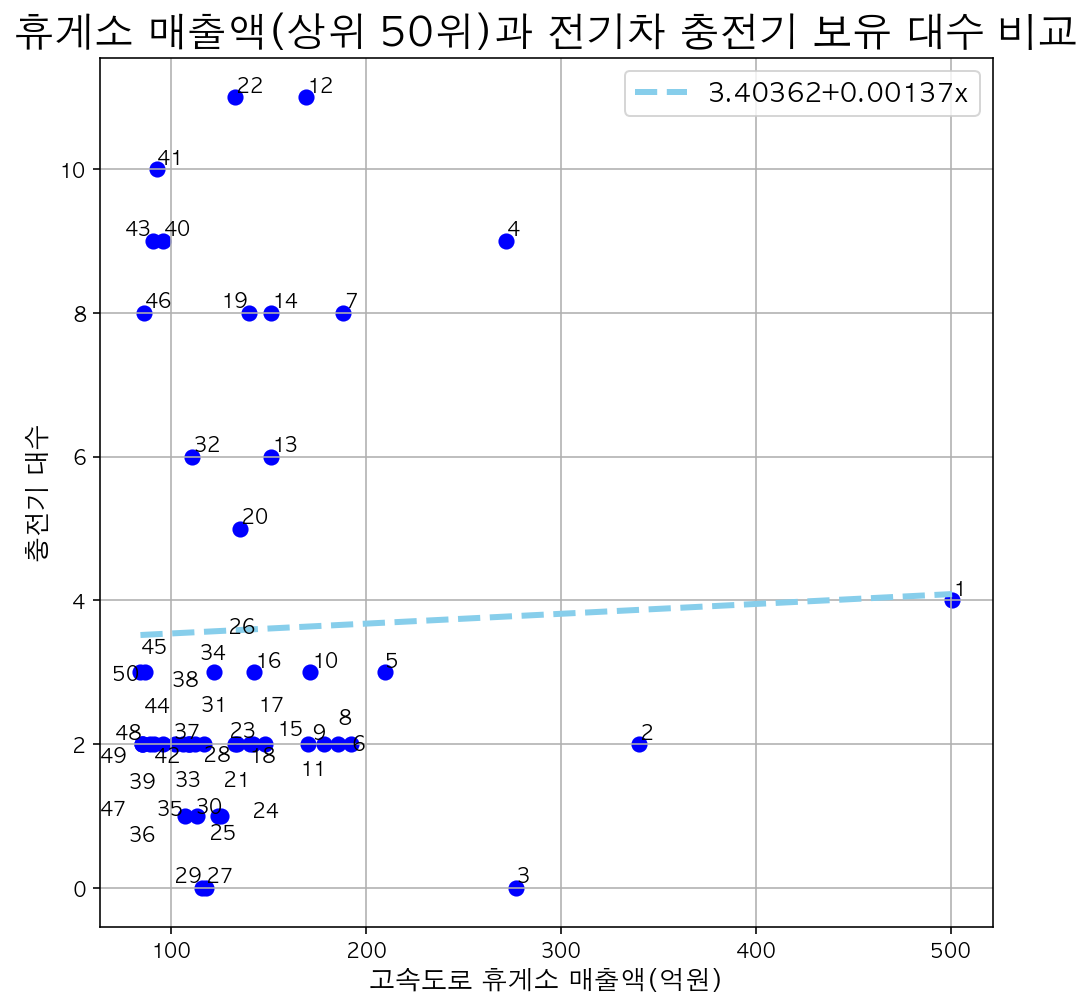

In [170]:
# b0, b1 구하기
poly_fit=np.polyfit(charger_per_RPsales['sales_amount'], charger_per_RPsales['num_of_chargers'], 1)
# b0 + b1x를 반환하는 함수 작성
poly_1d=np.poly1d(poly_fit)
# 직선을 그리기 위한 x좌료를 생성
xs=np.linspace(charger_per_RPsales['sales_amount'].min(), charger_per_RPsales['sales_amount'].max())
# x좌표에 대응하는 y좌표 구하기
ys=poly_1d(xs)
print(poly_fit)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set_xlabel('고속도로 휴게소 매출액(억원)', fontsize=13)
ax.set_ylabel('충전기 대수', fontsize=13)
ax.set_title('휴게소 매출액(상위 50위)과 전기차 충전기 보유 대수 비교', fontsize=20)
ax.scatter(charger_per_RPsales['sales_amount'], charger_per_RPsales['num_of_chargers'], c='blue', s=50)
ax.plot(xs, ys, color='skyblue', label=f'{poly_fit[1]:.5f}+{poly_fit[0]:.5f}x', ls='dashed', lw=3)
ax.legend(loc='upper right', fontsize=13)

texts = []
for i, txt in enumerate( list(charger_per_RPsales['ranking']) ):
    texts.append(ax.text(list(charger_per_RPsales['sales_amount'])[i], list(charger_per_RPsales['num_of_chargers'])[i], txt))
adjust_text(texts)

plt.grid()
plt.show()

In [171]:
# 매출액 상위 50위 휴게소의 평균 충전기 대수는 3.6대
# 전기차 충전소가 있는 휴게소의 평균 충전기 보유 대수 2.31대 보다 많음 
round(charger_per_RPsales['num_of_chargers'].mean(), 1)

3.6

[1.36849533e-03 3.40362338e+00]


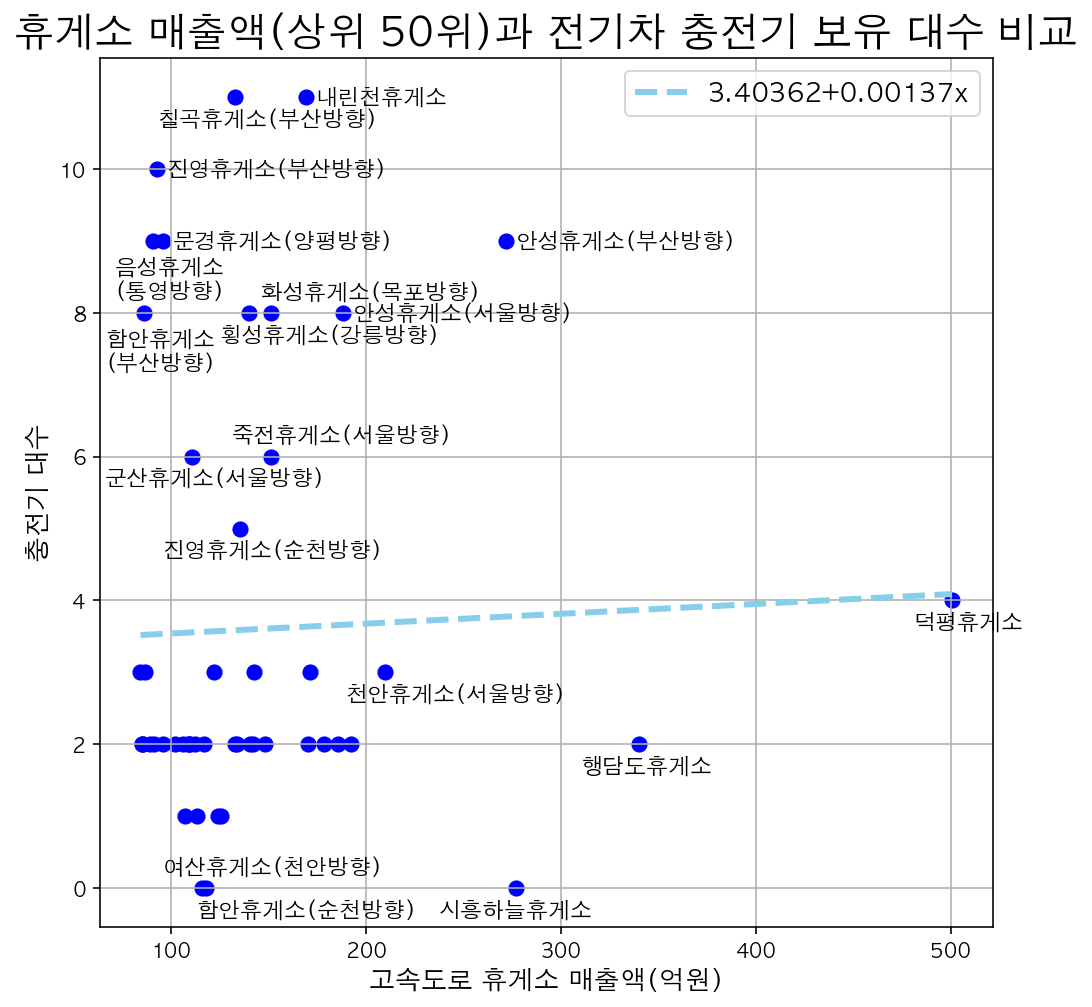

In [172]:
# b0, b1 구하기
poly_fit=np.polyfit(charger_per_RPsales['sales_amount'], charger_per_RPsales['num_of_chargers'], 1)
# b0 + b1x를 반환하는 함수 작성
poly_1d=np.poly1d(poly_fit)
# 직선을 그리기 위한 x좌료를 생성
xs=np.linspace(charger_per_RPsales['sales_amount'].min(), charger_per_RPsales['sales_amount'].max())
# x좌표에 대응하는 y좌표 구하기
ys=poly_1d(xs)
print(poly_fit)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set_xlabel('고속도로 휴게소 매출액(억원)', fontsize=13)
ax.set_ylabel('충전기 대수', fontsize=13)
ax.set_title('휴게소 매출액(상위 50위)과 전기차 충전기 보유 대수 비교', fontsize=20)
ax.scatter(charger_per_RPsales['sales_amount'], charger_per_RPsales['num_of_chargers'], c='blue', s=50)
ax.plot(xs, ys, color='skyblue', label=f'{poly_fit[1]:.5f}+{poly_fit[0]:.5f}x', ls='dashed', lw=3)
ax.legend(loc='upper right', fontsize=13)

ax.annotate(charger_per_RPsales['restplace_names'][0], (charger_per_RPsales['sales_amount'][0]-20,charger_per_RPsales['num_of_chargers'][0]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][1], (charger_per_RPsales['sales_amount'][1]-30,charger_per_RPsales['num_of_chargers'][1]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][2], (charger_per_RPsales['sales_amount'][2]-40,charger_per_RPsales['num_of_chargers'][2]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][3], (charger_per_RPsales['sales_amount'][3]+5,charger_per_RPsales['num_of_chargers'][3]-0.1), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][4], (charger_per_RPsales['sales_amount'][4]-20,charger_per_RPsales['num_of_chargers'][4]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][6], (charger_per_RPsales['sales_amount'][6]+5,charger_per_RPsales['num_of_chargers'][6]-0.1), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][11], (charger_per_RPsales['sales_amount'][11]+5,charger_per_RPsales['num_of_chargers'][11]-0.1), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][12], (charger_per_RPsales['sales_amount'][12]-20,charger_per_RPsales['num_of_chargers'][12]+0.2), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][13], (charger_per_RPsales['sales_amount'][13]-5,charger_per_RPsales['num_of_chargers'][13]+0.2), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][18], (charger_per_RPsales['sales_amount'][18]-15,charger_per_RPsales['num_of_chargers'][18]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][19], (charger_per_RPsales['sales_amount'][19]-40,charger_per_RPsales['num_of_chargers'][19]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][21], (charger_per_RPsales['sales_amount'][21]-40,charger_per_RPsales['num_of_chargers'][21]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][26], (charger_per_RPsales['sales_amount'][26]-5,charger_per_RPsales['num_of_chargers'][26]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][28], (charger_per_RPsales['sales_amount'][28]-20,charger_per_RPsales['num_of_chargers'][28]+0.2), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][31], (charger_per_RPsales['sales_amount'][31]-45,charger_per_RPsales['num_of_chargers'][31]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][39], (charger_per_RPsales['sales_amount'][39]+5,charger_per_RPsales['num_of_chargers'][39]-0.1), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][40], (charger_per_RPsales['sales_amount'][40]+5,charger_per_RPsales['num_of_chargers'][40]-0.1), fontsize=11)
ax.annotate('음성휴게소\n(통영방향)', (charger_per_RPsales['sales_amount'][42]-20,charger_per_RPsales['num_of_chargers'][42]-0.8), fontsize=11)
ax.annotate('함안휴게소\n(부산방향)', (charger_per_RPsales['sales_amount'][45]-20,charger_per_RPsales['num_of_chargers'][45]-0.8), fontsize=11)
plt.grid()
plt.show()

## 데이터 분석결과 및 시각화

### 1. 전국의 휴게소내에 설치된 전기차 충전소 및 충전기 현황
#### 1) 전기차 충전이 가능한 전국의 휴게소 수와 충전기 대수
- 전국의 290개의 휴게소에서 전기차 중전이 가능하며, 총 670대의 충전기 보유
- 휴게소별 평균 2.31대의 충전기 보유 (충전기 미설치 휴게소는 포함되지 않음)

In [173]:
harger_per_restplace_total=np.array([[len(charger_per_restplace['restplace_names']), charger_per_restplace['num_of_chargers'].sum()], 
                            ['', round(charger_per_restplace['num_of_chargers'].mean(),2)]])
index_data=['합계', '평균']
column_data=['휴게소', '충전기 수']
pd.DataFrame(harger_per_restplace_total, index=index_data, columns=column_data)

휴게소 충전기 수
합계  290   670
평균       2.31

#### 2) 충전 타입별 충전기 대수
- 휴게소에서 보유한 670대의 충전기 중 완속 충전기는 총 15대로 약 2.2%에 해당하며, 나머지 97.8%는 모두 급속 충전기로 확인

In [174]:
charger_per_type

charger_types types  num_of_chargers  num_of_chargers(%)
0               02(AC 완속)    완속               15                 2.2
1        03(DC 차데모+AC 3상)    급속                1                 0.1
2               04(DC 콤보)    급속              195                29.1
3        05(DC 차데모+DC 콤보)    급속                3                 0.4
4  06(DC 차데모+AC 3상+DC 콤보)    급속              456                68.1

#### 3) 휴게소별 충전기 보유 대수
- 충전기 2대를 보유중인 휴게소가 155개소로 가장 많으며, 전체의 53.4%를 차지
- 1대만 설치되어 있는 휴게소도 70개소로 24.1%를 차지하며, 대부분의 휴게소(91.6%)에서 3대 이하를 보유중으로 확인

In [175]:
restplace_per_charger

num_of_chargers  num_of_restplaces  num_of_restplaces(%)  \
0                1                 70                  24.1   
1                2                155                  53.4   
2                3                 41                  14.1   
3                4                  7                   2.4   
4                5                  1                   0.3   
5                6                  3                   1.0   
6                8                  6                   2.1   
7                9                  5                   1.7   
8               11                  1                   0.3   
9               12                  1                   0.3   

   cum_num_of_restplaces(%)  
0                      24.1  
1                      77.6  
2                      91.7  
3                      94.1  
4                      94.5  
5                      95.5  
6                      97.6  
7                      99.3  
8                      99.7  
9                     100.0

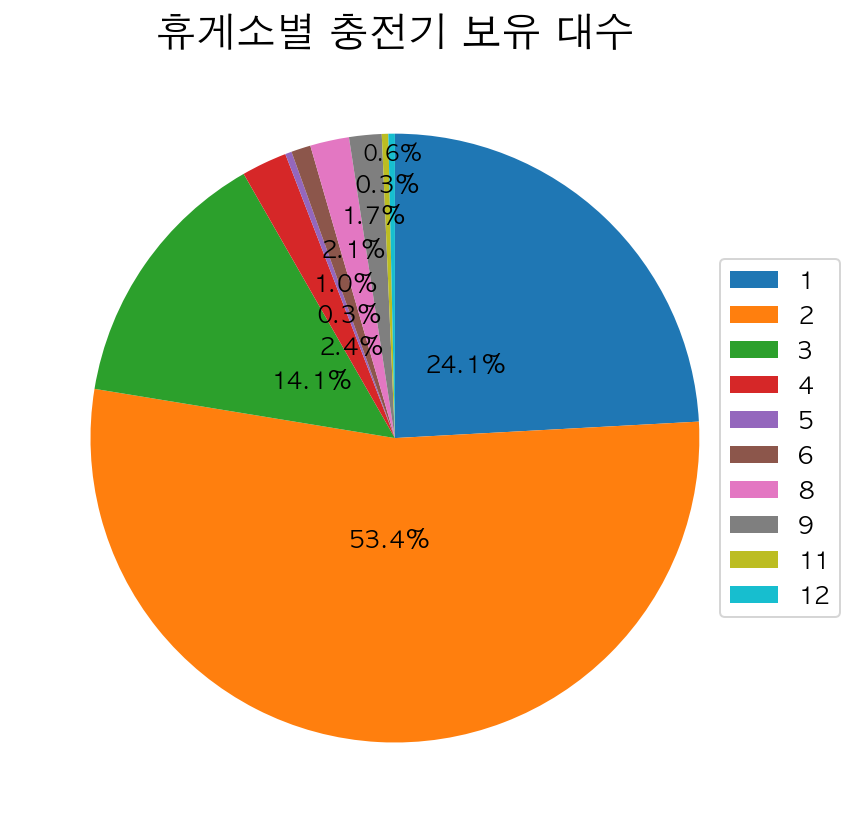

In [176]:
fig = plt.figure(figsize=(7, 7)) 
ax = fig.add_subplot() 
pie = ax.pie(restplace_per_charger['num_of_restplaces'], 
       startangle=90, 
       counterclock=False)
       #labels=charger_station_count['num_of_chargers'],  
       #explode=[0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
    
total = np.sum(restplace_per_charger['num_of_restplaces']) 
threshold = 5
sum_pct = 0 
count_less_5pct = 0 
spacing = 0.1
for i,l in enumerate(restplace_per_charger['num_of_chargers']):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 
    center, r = ax.patches[i].center, ax.patches[i].r 
    
    if restplace_per_charger['num_of_restplaces'][i]/total*100 < threshold:
        x = (r/3+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0]
        y = (r/3+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] 
        count_less_5pct += 1
    else:
        x = (r/3)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] 
        y = (r/3)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] 
    
    if i < len(restplace_per_charger['num_of_chargers']) - 1:
        sum_pct += float('{0:.1f}'.format(restplace_per_charger['num_of_restplaces'][i]/total*100))
        ax.text(x,y,'{0:.1f}%'.format(restplace_per_charger['num_of_restplaces'][i]/total*100), ha='center',va='center',fontsize=12)
    else: 
        ax.text(x,y,f'{100-sum_pct:.1f}%',ha='center',va='center',fontsize=11)
        
ax.set_title('휴게소별 충전기 보유 대수', fontsize=20, loc='center')
plt.legend(pie[0],restplace_per_charger['num_of_chargers'], loc='right', bbox_to_anchor=(1.1, 0.5), fontsize=12) 
plt.show()

## 2. 고속도로 주유소, 휴게소 매출과 해당 휴게소에 설치된 충전기 대수 비교
#### 1) 고속도로 휴게소내 주유소 매출액(상위 50위)과 전기차 충전기 보유 대수 비교
* **매출 상위 50위 이내의 주유소가 있는 휴게소에 설치된 평균 충전기 대수**<br>
    평균 2.84대 설치되어 있으며, 전기차 충전소가 있는 휴게소의 평균 2.31대보다 많음<br>
    
    
* **주유소 매출이 상위 50위 이내에 포함되나 전기차 충전소가 없는 휴게소**<br>
     여산휴게소(천안방향), 시흥휴게소(외측방향), 함안휴게소(순천방향)<br>
     
     
* **주유소 매출액 대비 충전기 대수가 적은 휴게소 (매출액 상위 1~3, 5위)**<br>
    - 서울만남휴게소(부산방향), 기흥휴게소(부산방향), 망향휴게소(부산방향), 하남만남휴게소(통영방향)<br>
    - 모두 환경부에서 운영하는 충전소 1곳만 있음<br>
    
    
* **주유소 매출액 대비 충전기 대수가 적은 휴게소 (매출액 상위 1~3, 5위)**<br>
    - 서울만남휴게소(부산방향), 기흥휴게소(부산방향), 망향휴게소(부산방향), 하남만남휴게소(통영방향)<br>
    - 모두 환경부에서 운영하는 충전소 1곳<br>
    
    
* **주유소 매출액 대비 충전기 대수가 비교적 많은 휴게소**<br>
    - 환경부, 한국전력, 현대자동차 등이 운영하는 충전소가 모두 2곳 이상 설치되어 있으며, 대부분 3개의 충전소가 설치된 상태<br>
    - 참고: 고속도로 휴게소내 현대자동차 충전소 현황 (12곳에 각각 6대씩 초급속 충전기 설치)<br><br>
    
        - 안성휴게소(서울방향) : 현대자동차, 환경부(2곳)
        - 죽전휴게소(서울방향) : 환경부(2곳) 
        - 안성휴게소(부산방향) : 현대자동차, 환경부(2곳)
        - 문경휴게소(양평방향) : 현대자동차, 환경부(2곳)
        - 화성휴게소(목표방향) : 현대자동차, 환경부(2곳)
        - 진영휴게소(순천방향) : 환경부(2곳)
        - 음성휴게소(통영방향) : 현대자동차, 환경부, 한국전력
        - 칠곡휴게소(부산방향) : 현대자동차, 환경부(2곳) 

In [177]:
charger_per_GSsales['num_of_chargers'].mean()

2.84

[0.00473715 1.49182564]


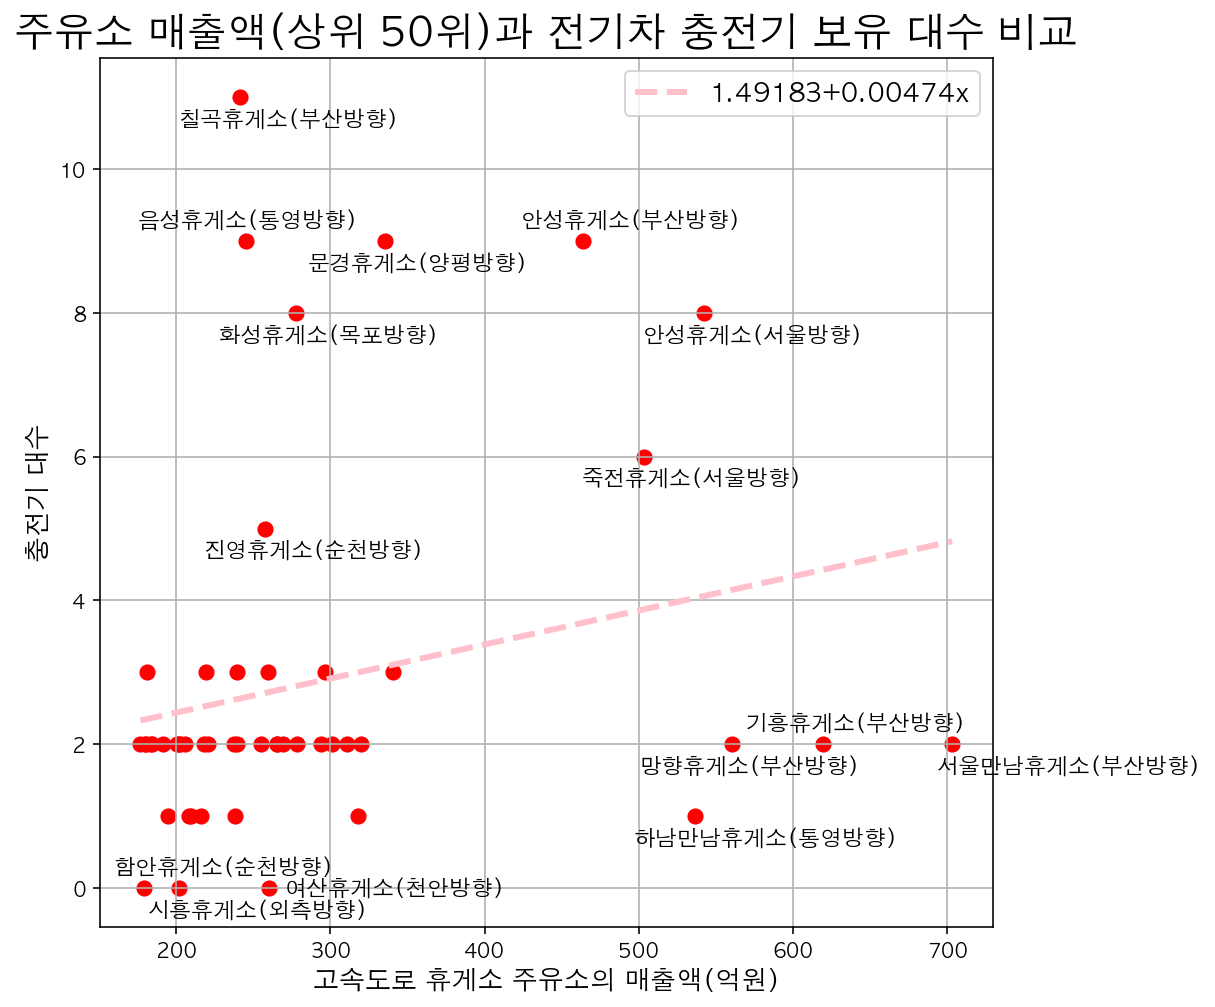

In [178]:
# b0, b1 구하기
poly_fit=np.polyfit(charger_per_GSsales['sales_amount'], charger_per_GSsales['num_of_chargers'], 1)
# b0 + b1x를 반환하는 함수 작성
poly_1d=np.poly1d(poly_fit)
# 직선을 그리기 위한 x좌료를 생성
xs=np.linspace(charger_per_GSsales['sales_amount'].min(), charger_per_GSsales['sales_amount'].max())
# x좌표에 대응하는 y좌표 구하기
ys=poly_1d(xs)
print(poly_fit)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set_xlabel('고속도로 휴게소 주유소의 매출액(억원)', fontsize=13)
ax.set_ylabel('충전기 대수', fontsize=13)
ax.set_title('주유소 매출액(상위 50위)과 전기차 충전기 보유 대수 비교', fontsize=20)
ax.scatter(charger_per_GSsales['sales_amount'], charger_per_GSsales['num_of_chargers'], c='red', s=50)
ax.plot(xs, ys, color='pink', label=f'{poly_fit[1]:.5f}+{poly_fit[0]:.5f}x', ls='dashed', lw=3)
ax.legend(loc='upper right', fontsize=13)

ax.annotate(charger_per_GSsales['restplace_names'][0], (charger_per_GSsales['sales_amount'][0]-10,charger_per_GSsales['num_of_chargers'][0]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][1], (charger_per_GSsales['sales_amount'][1]-50,charger_per_GSsales['num_of_chargers'][1]+0.2), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][2], (charger_per_GSsales['sales_amount'][2]-60,charger_per_GSsales['num_of_chargers'][2]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][3], (charger_per_GSsales['sales_amount'][3]-40,charger_per_GSsales['num_of_chargers'][3]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][4], (charger_per_GSsales['sales_amount'][4]-40,charger_per_GSsales['num_of_chargers'][4]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][5], (charger_per_GSsales['sales_amount'][5]-40,charger_per_GSsales['num_of_chargers'][5]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][6], (charger_per_GSsales['sales_amount'][6]-40,charger_per_GSsales['num_of_chargers'][6]+0.2), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][8], (charger_per_GSsales['sales_amount'][8]-50,charger_per_GSsales['num_of_chargers'][8]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][16], (charger_per_GSsales['sales_amount'][16]-50,charger_per_GSsales['num_of_chargers'][16]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][20], (charger_per_GSsales['sales_amount'][20]+10,charger_per_GSsales['num_of_chargers'][20]-0.1), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][22], (charger_per_GSsales['sales_amount'][22]-40,charger_per_GSsales['num_of_chargers'][22]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][24], (charger_per_GSsales['sales_amount'][24]-70,charger_per_GSsales['num_of_chargers'][24]+0.2), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][25], (charger_per_GSsales['sales_amount'][25]-40,charger_per_GSsales['num_of_chargers'][25]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][39], (charger_per_GSsales['sales_amount'][39]-20,charger_per_GSsales['num_of_chargers'][39]-0.4), fontsize=11)
ax.annotate(charger_per_GSsales['restplace_names'][48], (charger_per_GSsales['sales_amount'][48]-20,charger_per_GSsales['num_of_chargers'][39]+0.2), fontsize=11)

plt.grid()
plt.show()

#### 2) 고속도로 휴게소 매출액(상위 50위)과 전기차 충전기 보유 대수 비교

* **매출액 상위 50위 이내의 휴게소에 설치된 평균 충전기 대수**<br>
    평균 3.6대가 설치되어 있으며, 전기차 충전소가 있는 휴게소의 평균 2.31대보다 많음<br>
    
    
* **휴게소 매출이 상위 50위 이내 포함되나 전기차 충전소가 없는 휴게소**<br>
    시흥하늘휴게소, 함안휴게소(순천방향), 여산휴게소(천안방향) <br> 
    
    
* **휴게소 매출액 대비 충전기 대수가 적은 휴게소 (매출액 상위 1~2위)**<br>
    덕평휴게소, 행담도휴게소<br>
    
    
* **휴게소 매출액 대비 충전기 대수가 비교적 많은 휴게소**<br>
    - 환경부, 한국전력, 현대자동차 등이 운영하는 충전소가 모두 2곳 이상 설치되어 있으며, 대부분 3개의 충전소가 설치된 상태<br>
    - 참고: 고속도로 휴게소내 현대자동차 충전소 현황 (12곳에 각각 6대씩 초급속 충전기 설치)<br><br>
        
        - 안성휴게소(부산방향) : 현대자동차, 환경부(2곳)
        - 안성휴게소(서울방향) : 현대자동차, 환경부(2곳)
        - 내린천휴게소         : 현대자동차, 환경부(2곳)
        - 죽전휴게소(서울방향) : 환경부(2곳) 
        - 화성휴게소(목표방향) : 현대자동차, 환경부(2곳)
        - 횡성휴게소(강릉방향) : 현대자동차, 환경부(2곳)
        - 진영휴게소(순천방향) : 환경부(2곳)
        - 칠곡휴게소(부산방향) : 현대자동차, 환경부(2곳) 
        - 군산휴게소(서울방향) : 현대자동차, 군산휴게소(시흥방향) 환경부 운영 충전소 2곳 포함하면 총 8대
        - 문경휴게소(양평방향) : 현대자동차, 환경부(2곳)
        - 진영휴게소(부산방향) : 환경부(1대), 에버온(경남진해진영휴게소(급속) 9대)
        - 음성휴게소(통영방향) : 대영채비, 환경부, 한국전력
        - 함안휴게소(부산방향) : 현대자동차, 환경부(2곳)

In [179]:
round(charger_per_RPsales['num_of_chargers'].mean(), 1)

3.6

[1.36849533e-03 3.40362338e+00]


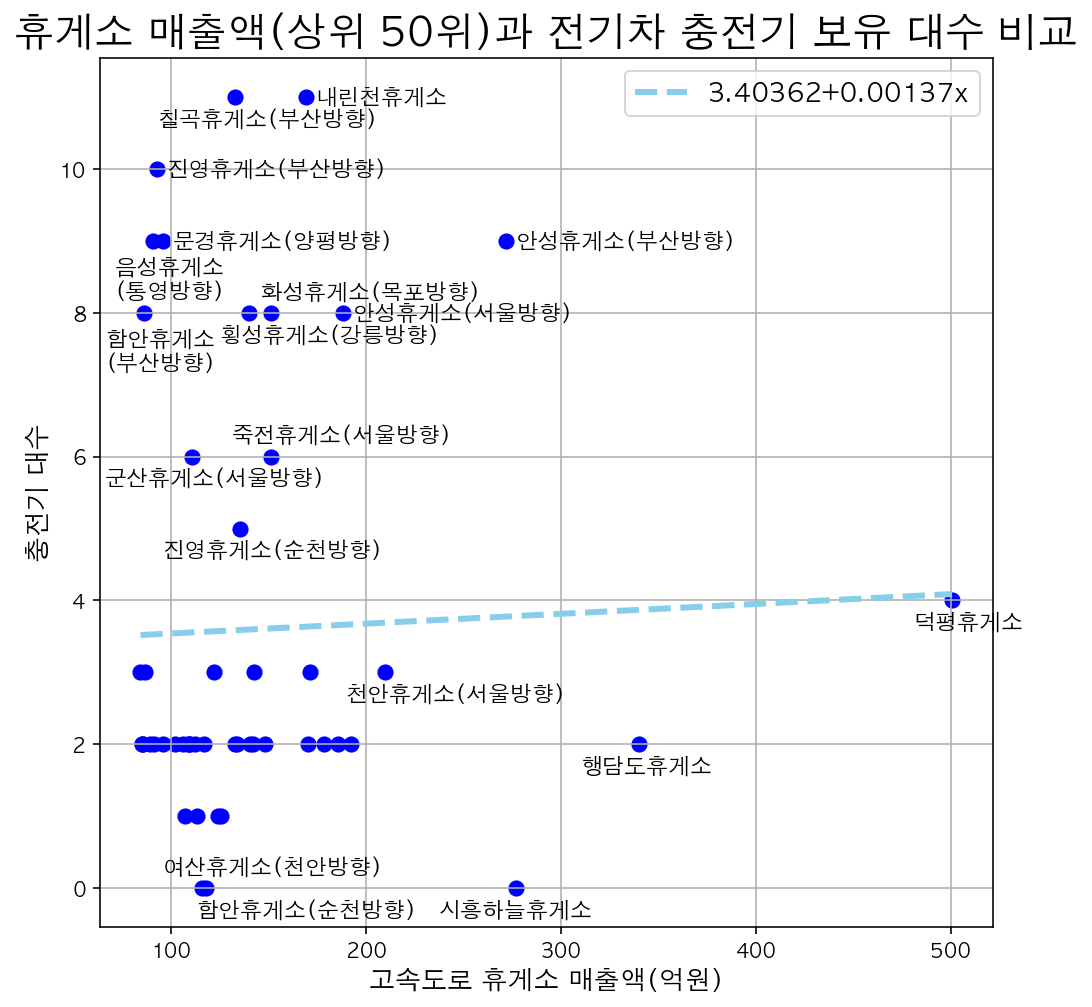

In [180]:
# b0, b1 구하기
poly_fit=np.polyfit(charger_per_RPsales['sales_amount'], charger_per_RPsales['num_of_chargers'], 1)
# b0 + b1x를 반환하는 함수 작성
poly_1d=np.poly1d(poly_fit)
# 직선을 그리기 위한 x좌료를 생성
xs=np.linspace(charger_per_RPsales['sales_amount'].min(), charger_per_RPsales['sales_amount'].max())
# x좌표에 대응하는 y좌표 구하기
ys=poly_1d(xs)
print(poly_fit)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set_xlabel('고속도로 휴게소 매출액(억원)', fontsize=13)
ax.set_ylabel('충전기 대수', fontsize=13)
ax.set_title('휴게소 매출액(상위 50위)과 전기차 충전기 보유 대수 비교', fontsize=20)
ax.scatter(charger_per_RPsales['sales_amount'], charger_per_RPsales['num_of_chargers'], c='blue', s=50)
ax.plot(xs, ys, color='skyblue', label=f'{poly_fit[1]:.5f}+{poly_fit[0]:.5f}x', ls='dashed', lw=3)
ax.legend(loc='upper right', fontsize=13)

ax.annotate(charger_per_RPsales['restplace_names'][0], (charger_per_RPsales['sales_amount'][0]-20,charger_per_RPsales['num_of_chargers'][0]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][1], (charger_per_RPsales['sales_amount'][1]-30,charger_per_RPsales['num_of_chargers'][1]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][2], (charger_per_RPsales['sales_amount'][2]-40,charger_per_RPsales['num_of_chargers'][2]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][3], (charger_per_RPsales['sales_amount'][3]+5,charger_per_RPsales['num_of_chargers'][3]-0.1), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][4], (charger_per_RPsales['sales_amount'][4]-20,charger_per_RPsales['num_of_chargers'][4]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][6], (charger_per_RPsales['sales_amount'][6]+5,charger_per_RPsales['num_of_chargers'][6]-0.1), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][11], (charger_per_RPsales['sales_amount'][11]+5,charger_per_RPsales['num_of_chargers'][11]-0.1), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][12], (charger_per_RPsales['sales_amount'][12]-20,charger_per_RPsales['num_of_chargers'][12]+0.2), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][13], (charger_per_RPsales['sales_amount'][13]-5,charger_per_RPsales['num_of_chargers'][13]+0.2), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][18], (charger_per_RPsales['sales_amount'][18]-15,charger_per_RPsales['num_of_chargers'][18]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][19], (charger_per_RPsales['sales_amount'][19]-40,charger_per_RPsales['num_of_chargers'][19]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][21], (charger_per_RPsales['sales_amount'][21]-40,charger_per_RPsales['num_of_chargers'][21]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][26], (charger_per_RPsales['sales_amount'][26]-5,charger_per_RPsales['num_of_chargers'][26]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][28], (charger_per_RPsales['sales_amount'][28]-20,charger_per_RPsales['num_of_chargers'][28]+0.2), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][31], (charger_per_RPsales['sales_amount'][31]-45,charger_per_RPsales['num_of_chargers'][31]-0.4), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][39], (charger_per_RPsales['sales_amount'][39]+5,charger_per_RPsales['num_of_chargers'][39]-0.1), fontsize=11)
ax.annotate(charger_per_RPsales['restplace_names'][40], (charger_per_RPsales['sales_amount'][40]+5,charger_per_RPsales['num_of_chargers'][40]-0.1), fontsize=11)
ax.annotate('음성휴게소\n(통영방향)', (charger_per_RPsales['sales_amount'][42]-20,charger_per_RPsales['num_of_chargers'][42]-0.8), fontsize=11)
ax.annotate('함안휴게소\n(부산방향)', (charger_per_RPsales['sales_amount'][45]-20,charger_per_RPsales['num_of_chargers'][45]-0.8), fontsize=11)
plt.grid()
plt.show()

#### 참고: 고속도로 휴게소내 현대자동차 충전소 현황
* **이제는 고속도로에서도 전기차 초급속 충전하세요 (국토교통부 보도자료, 21/04/14)**<br>
http://m.molit.go.kr/viewer/skin/doc.html?fn=c2675607dc988b60edf570d83971f777&rs=/viewer/result/20210413
*한국도로공사와 (주)현대자동차 간 협약을 통해 고속도로 휴게소 12곳에 각각 6기씩 전기차 초급속 충전기 72기 설치 (현대차의 전기차 전용 플랫폼 'EGMP'에 최적화되어 아이오닉5 등 E-GMP기반의 차종은 18분 내에 80% 충전, 기존 전기차도 'DC콤보 타입1'을 사용하면 충전가능)

In [200]:
super_fast_charger = {'휴게소명(방향)' : ['안성휴게소(부산방향)', '안성휴게소(서울방향)', '칠곡휴게소(부산방향)', '음성휴게소(통영방향)', '횡성휴게소(강릉방향)', '화성휴게소(목표방향)', '군산휴게소(서울방향)', '함안휴게소(부산방향)', '함안휴게소(부산방향)', '문산휴게소(순천방향)', '문경휴게소(양평방향)', '내린천휴게소(서울방향)', '함평나비(무안방향)']}

In [201]:
pd.DataFrame(super_fast_charger)

휴게소명(방향)
0    안성휴게소(부산방향)
1    안성휴게소(서울방향)
2    칠곡휴게소(부산방향)
3    음성휴게소(통영방향)
4    횡성휴게소(강릉방향)
5    화성휴게소(목표방향)
6    군산휴게소(서울방향)
7    함안휴게소(부산방향)
8    함안휴게소(부산방향)
9    문산휴게소(순천방향)
10   문경휴게소(양평방향)
11  내린천휴게소(서울방향)
12    함평나비(무안방향)

---

## 전기차와 내연기관차의 경제적 분석 (차량 모델별 구매금액, 보조금, 유지비용 등)

### 데이터 수집
- 모델별 가격: 네이버에서 제공되는 출고가 가격 직접 추출
- 보조금: 저공해차 통합누리집(공공사이트)에서 추출(서울기준)
- 취등록세: 자동차365(공공사이트)에서 취등록세 계산기를 이용하여 직접추출
- 충전요금: 저공해차 통합누리집(공공사이트)에서 제공되는 2021년 기준 전기요금 및 휘발유값 
- 주행거리: 공공데이터 포털에서 제공하는 서울시 년간 차량 평균 주행거리 csv파일

### 데이터 분석

#### 1) 전기차 및 내연기관차 모델별 가격비교

In [185]:
# 모델선정 및 가격은 같은모델의 전기 및 내연기관 모델, 동급의 브랜드, 차종, 옵션을 고려하여 선정
kind_car = pd.read_excel('/Users/user/Downloads/excel/일대일비교.xlsx')
pd.DataFrame(kind_car) # 전기차 및 내연기관 경제성 각 지표 테이블

모델명  가격(만원)  50000KM 충전요금   보조금    취등록세  5년간 총 유지비
0      bmw i3    6000        220.05   873  280.00    5627.05
1   르노 SM3 ZE    3700        273.85   902  119.00    3190.85
2     기아 레이EV    3500        246.45     0  105.00    3851.45
3     현대 니로EV    4690        232.50  1000  188.30    4110.80
4     기아 쏘울EV    4400        220.05   950  168.00    3838.05
5   현대 아이오닉EV    4300        195.60   991  161.00    3665.60
6     현대 코나ev    4790        220.45   800  195.30    4405.75
7     테슬라 모델3    6000        220.45   950  280.00    5550.45
8     테슬라 모델y    7500        241.60   575  385.00    7551.60
9    쉐보레 볼트ev    3990        228.20   960  139.30    3397.50
10    미니 해치백s    4350        616.65     0  304.50    5271.15
11     르노 sm3    1635        549.60     0  114.45    2299.05
12      기아 레이    1480        583.45     0    9.20    2072.65
13      현대 니로    2750        336.30     0  192.50    3278.80
14      기아 소울    2155        611.70     0  150.85    2917.55
15  현대 아반떼CN7    1692        541.80     0  118.44    2352.24
16      현대 코나    2400        557.70     0  168.00    3125.70
17    벤츠 A클래스    3940        637.40     0  275.80    4853.20
18     bmw x1    5270        774.00     0  368.90    6412.90
19    쉐보레 스파크    1000        505.65     0    0.00    1505.65

In [186]:
ddff = pd.DataFrame(kind_car)
ddff1 = ddff.set_index('모델명')
ddff1
price1 = ddff1.loc[:, ['가격(만원)']] 
price1
price_1 = price1.sort_values(by = '가격(만원)', ascending = False) # 모델별 가격 내림차순
price_1

가격(만원)
모델명              
테슬라 모델y      7500
bmw i3       6000
테슬라 모델3      6000
bmw x1       5270
현대 코나ev      4790
현대 니로EV      4690
기아 쏘울EV      4400
미니 해치백s      4350
현대 아이오닉EV    4300
쉐보레 볼트ev     3990
벤츠 A클래스      3940
르노 SM3 ZE    3700
기아 레이EV      3500
현대 니로        2750
현대 코나        2400
기아 소울        2155
현대 아반떼CN7    1692
르노 sm3       1635
기아 레이        1480
쉐보레 스파크      1000

In [187]:
# 동급의 전기차와 내연기관차의 출고가를 각각 1대1 비교하기위해 동력으로 구분하여 막대그래프를 시각화
price_car = pd.read_excel('/Users/user/Downloads/excel/가격비교.xlsx')
price_car

모델명  가격(만원)    동력
0         i3  해치백s    6000    전기
1         i3  해치백s    4350  내연기관
2       sm3ZE  sm3    3700    전기
3       sm3ZE  sm3    1635  내연기관
4         레이EV  레이    3500    전기
5         레이EV  레이    1480  내연기관
6         니로EV  니로    4690    전기
7         니로EV  니로    2750  내연기관
8         소울EV  소울    4400    전기
9         소울EV  소울    2155  내연기관
10  아이오닉EV  아반떼CN7    4300    전기
11  아이오닉EV  아반떼CN7    1692  내연기관
12        코나EV  코나    4790    전기
13        코나EV  코나    2400  내연기관
14       모델3  A클래스    6000    전기
15       모델3  A클래스    3940  내연기관
16         모델Y  X1    7500    전기
17         모델Y  X1    5270  내연기관
18       볼트EV  스파크    3990    전기
19       볼트EV  스파크    1000  내연기관

#### 2) 충전요금 비교

In [188]:
# 동급의 전기차와 내연기관차의 출고가를 각각 1대1 비교하기위해 동력으로 구분하여 막대그래프를 시각화
# 서울시 기준 평균 주행거리는 년간 평균 10982.84K로 편의상 100000KM를 기준으로 년간 충전요금계산 하여 1대1비교 분석
charge_car = pd.read_excel('/Users/user/Downloads/excel/10000KM.xlsx')
charge_car

# 전기차 배터리 교체주기인 5년을 기준으로 충전요금 계산
# 5년 이용시 충전요금 10000KM 요금의 5배로 계산
charge1_car = pd.read_excel('/Users/user/Downloads/excel/50000KM.xlsx')
charge1_car

모델명  50000KM 충전요금(만원)    동력
0         i3  해치백s            220.05    전기
1         i3  해치백s            616.65  내연기관
2       sm3ZE  sm3            273.85    전기
3       sm3ZE  sm3            549.60  내연기관
4         레이EV  레이            246.45    전기
5         레이EV  레이            583.45  내연기관
6         니로EV  니로            232.50    전기
7         니로EV  니로            336.30  내연기관
8         소울EV  소울            220.05    전기
9         소울EV  소울            611.70  내연기관
10  아이오닉EV  아반떼CN7            195.60    전기
11  아이오닉EV  아반떼CN7            541.80  내연기관
12        코나EV  코나            220.45    전기
13        코나EV  코나            557.70  내연기관
14       모델3  A클래스            220.45    전기
15       모델3  A클래스            637.40  내연기관
16         모델Y  X1            241.60    전기
17         모델Y  X1            774.00  내연기관
18       볼트EV  스파크            228.20    전기
19       볼트EV  스파크            505.65  내연기관

#### 3) 취등록세

In [189]:
ddff1
subsidy = ddff.loc[:, ['모델명','취등록세']] #모델별 취등록세 비교
subsidy1 = subsidy
subsidy1
subsidy2 = subsidy1.sort_values(by = '취등록세', ascending = False)
subsidy2

모델명    취등록세
8     테슬라 모델y  385.00
18     bmw x1  368.90
10    미니 해치백s  304.50
7     테슬라 모델3  280.00
0      bmw i3  280.00
17    벤츠 A클래스  275.80
6     현대 코나ev  195.30
13      현대 니로  192.50
3     현대 니로EV  188.30
4     기아 쏘울EV  168.00
16      현대 코나  168.00
5   현대 아이오닉EV  161.00
14      기아 소울  150.85
9    쉐보레 볼트ev  139.30
1   르노 SM3 ZE  119.00
15  현대 아반떼CN7  118.44
11     르노 sm3  114.45
2     기아 레이EV  105.00
12      기아 레이    9.20
19    쉐보레 스파크    0.00

#### 4)최종 경제성 비교

In [191]:
fn_price = pd.read_excel('/Users/user/Downloads/excel/일대일비교 총합.xlsx')
fn_price

fn_price1 = fn_price.loc[:, ['모델명', '5년간 총 비용', '동력']]
fn_price1

모델명  5년간 총 비용    동력
0         i3  해치백s   5627.05    전기
1         i3  해치백s   5271.15  내연기관
2       sm3ZE  sm3   3190.85    전기
3       sm3ZE  sm3   2299.05  내연기관
4         레이EV  레이   3851.45    전기
5         레이EV  레이   2072.65  내연기관
6         니로EV  니로   4110.80    전기
7         니로EV  니로   3278.80  내연기관
8         소울EV  소울   3838.05    전기
9         소울EV  소울   2917.55  내연기관
10  아이오닉EV  아반떼CN7   3665.60    전기
11  아이오닉EV  아반떼CN7   2352.24  내연기관
12        코나EV  코나   4405.75    전기
13        코나EV  코나   3125.70  내연기관
14       모델3  A클래스   5550.45    전기
15       모델3  A클래스   4853.20  내연기관
16         모델Y  X1   7551.60    전기
17         모델Y  X1   6412.90  내연기관
18       볼트EV  스파크   3397.50    전기
19       볼트EV  스파크   1505.65  내연기관

### 데이터 시각화

<Figure size 1440x720 with 0 Axes>

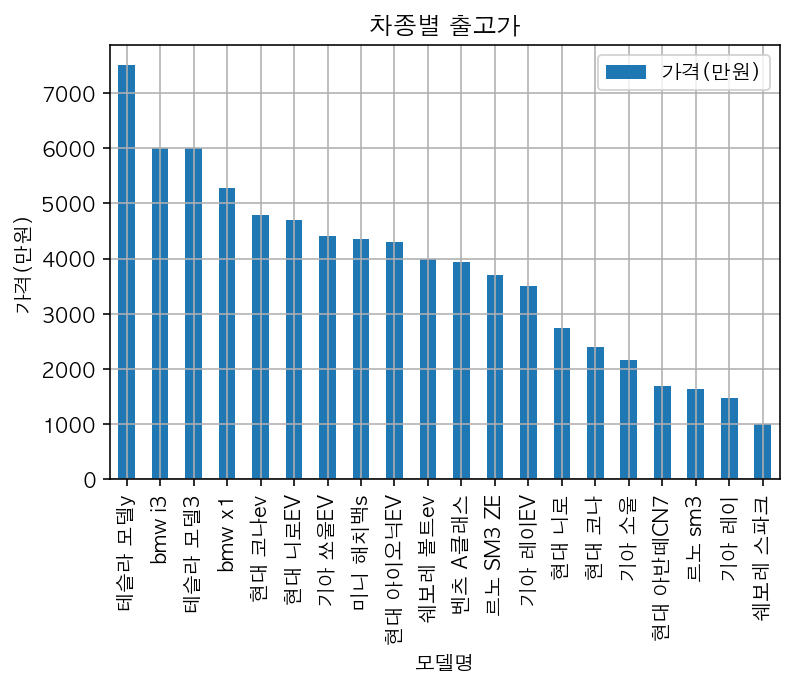

In [192]:
plt.figure(figsize = (20,10))
bar = price_1.plot.bar(grid = True)
bar.set_xlabel('모델명')
bar.set_ylabel('가격(만원)')
bar.set_title('차종별 출고가')

plt.show()

- 모델별 출고가 비교
- 모델선정 및 가격은 같은모델의 전기 및 내연기관 모델, 동급의 브랜드, 차종, 옵션을 고려하여 선정

#### 1)모델별 가격 비교

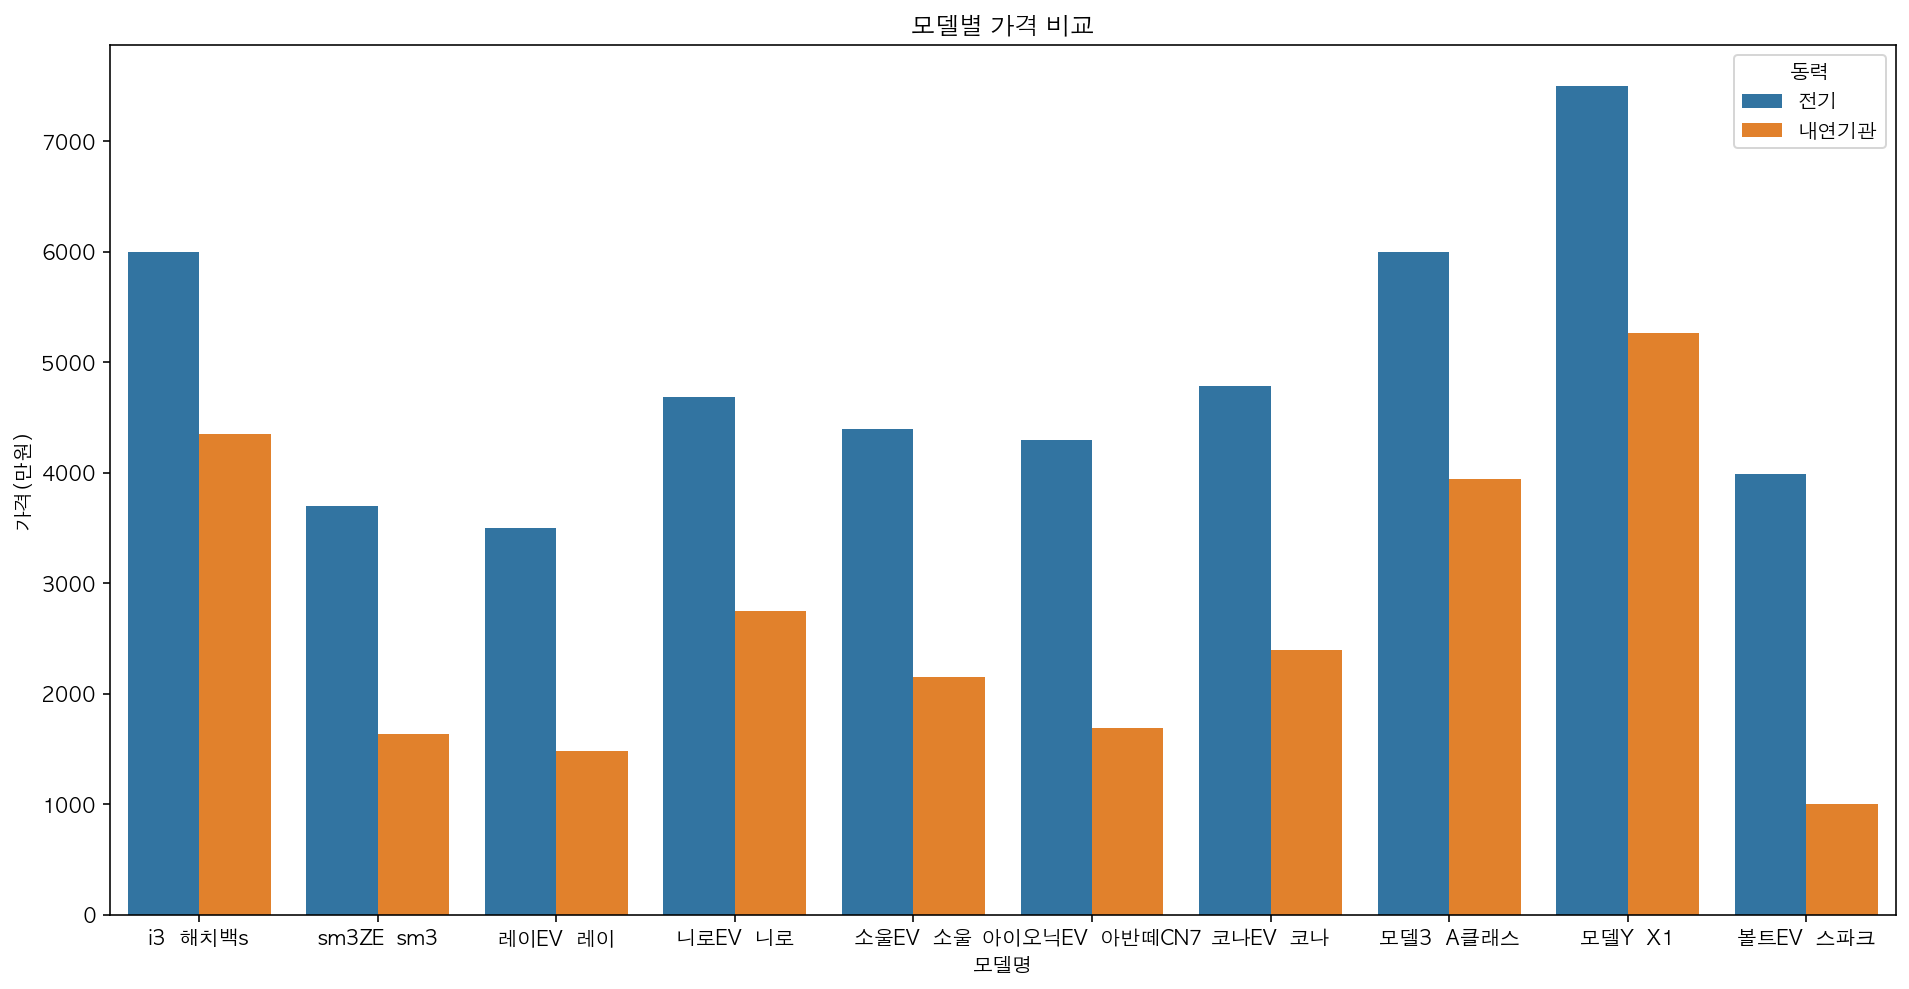

In [193]:
plt.figure(figsize = (16,8))
sns.barplot( x = '모델명',y = '가격(만원)', hue = '동력', data = price_car) # barplot메서드의 hue값을 동력으로 설정하여 비교분석
plt.title('모델별 가격 비교')
plt.show()

- 출고가는 값비싼 부품비 및 기술적 한계로 인해 분석한 10대의 전기차가 각각의 동급의 내연기관차
  보다 모두 높게 측정됨(서울 기준)
- 보조금은 매년 줄어드는 추세로 차이는 더욱 벌어질 것으로 예상
- 높은 초기비용 발생으로  소비자들의 전기차 구매에 대한 부담은 증가할 것으로 보임
- 정부 및 지방자치단체의 보조금 예산 확대로 소비자들의 부담을 줄여 전기차 소비를 촉진 하는 방안이 필요

#### 2) 1년 평균 충전요금 비교

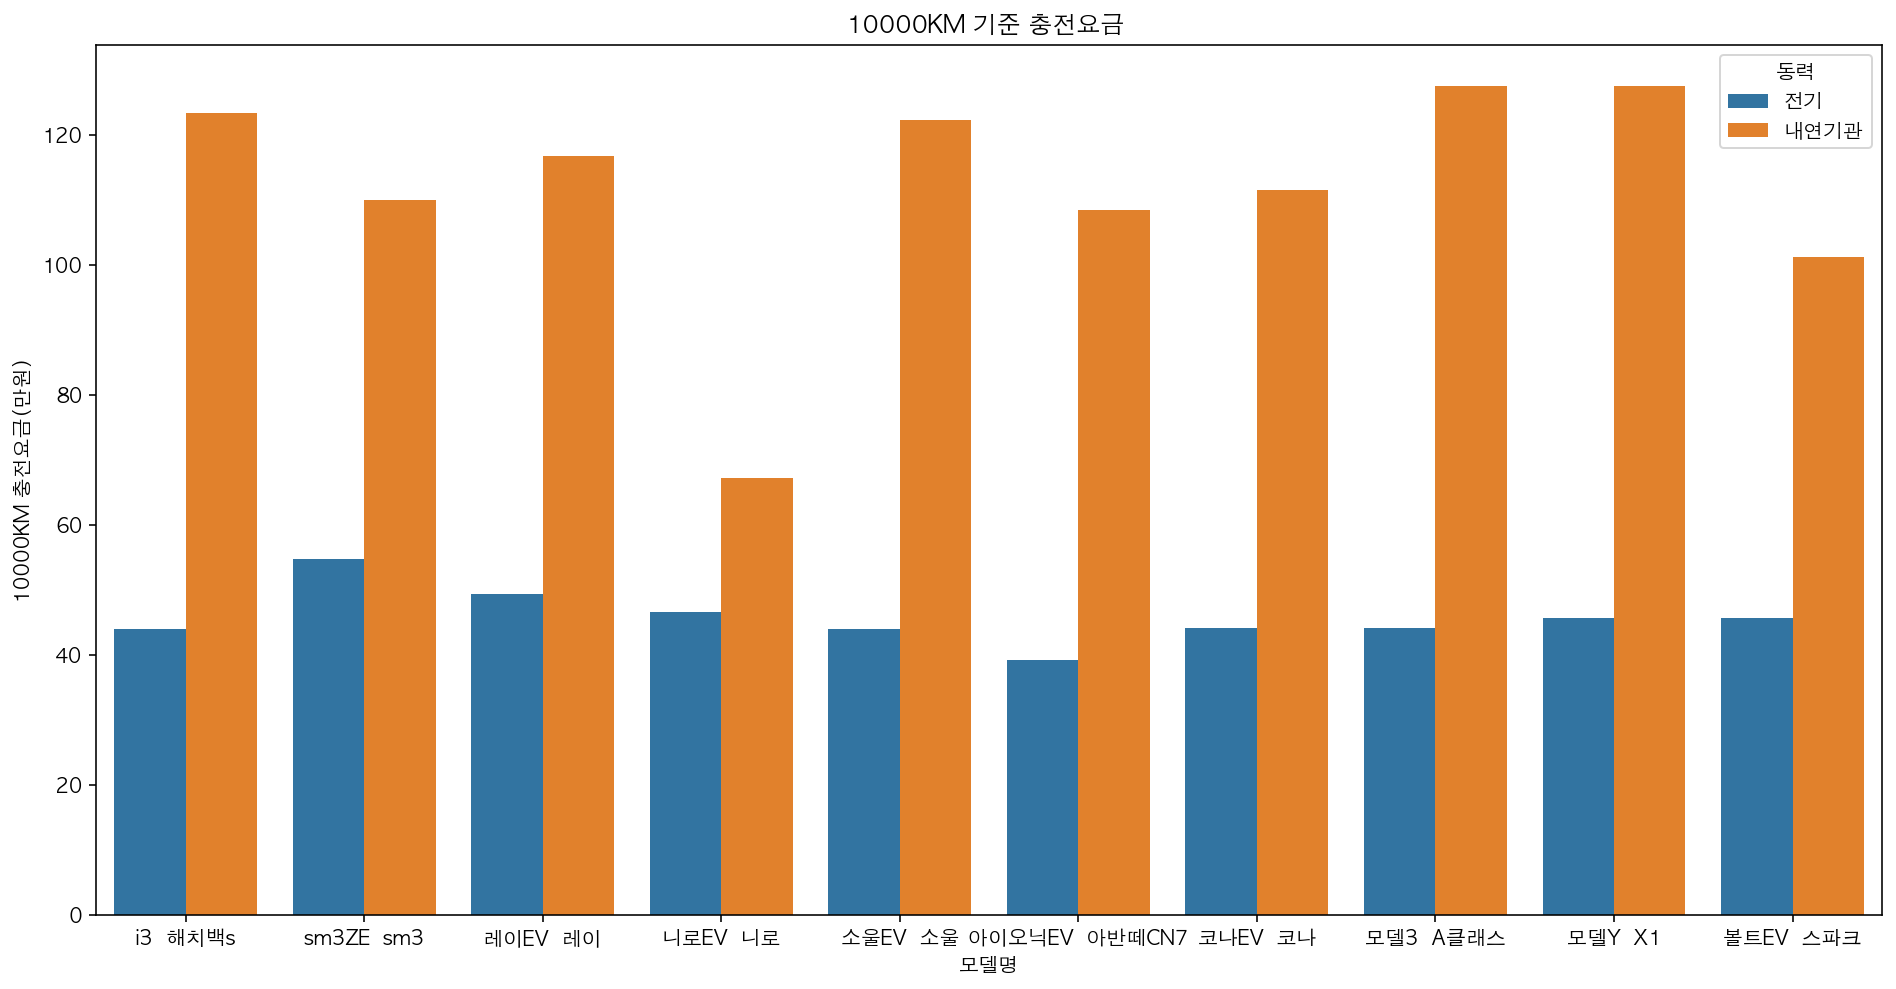

In [194]:
plt.figure(figsize=(16,8))
sns.barplot(x= '모델명', y = '10000KM 충전요금(만원)', hue =  '동력', data = charge_car)
plt.title('10000KM 기준 충전요금 ')
plt.show()

- 서울시 년간 평균 주행거리는 10982.84KM로 이와 비슷한 10000KM를 기준으로 전기차와 내연기관차의 충전요금 비교
- 전기차는 급속충전 및 완속충전 비율을 5:5 비율로 계산
- 2021년 기준 급속충전값 = 292.9원/kWh,  완속충전값 = 200원/kWh
- 휘발유값은 지난 1년간 중간값인 1517원/L 으로 계산 

#### 3) 5년 평균 충전요금 비교

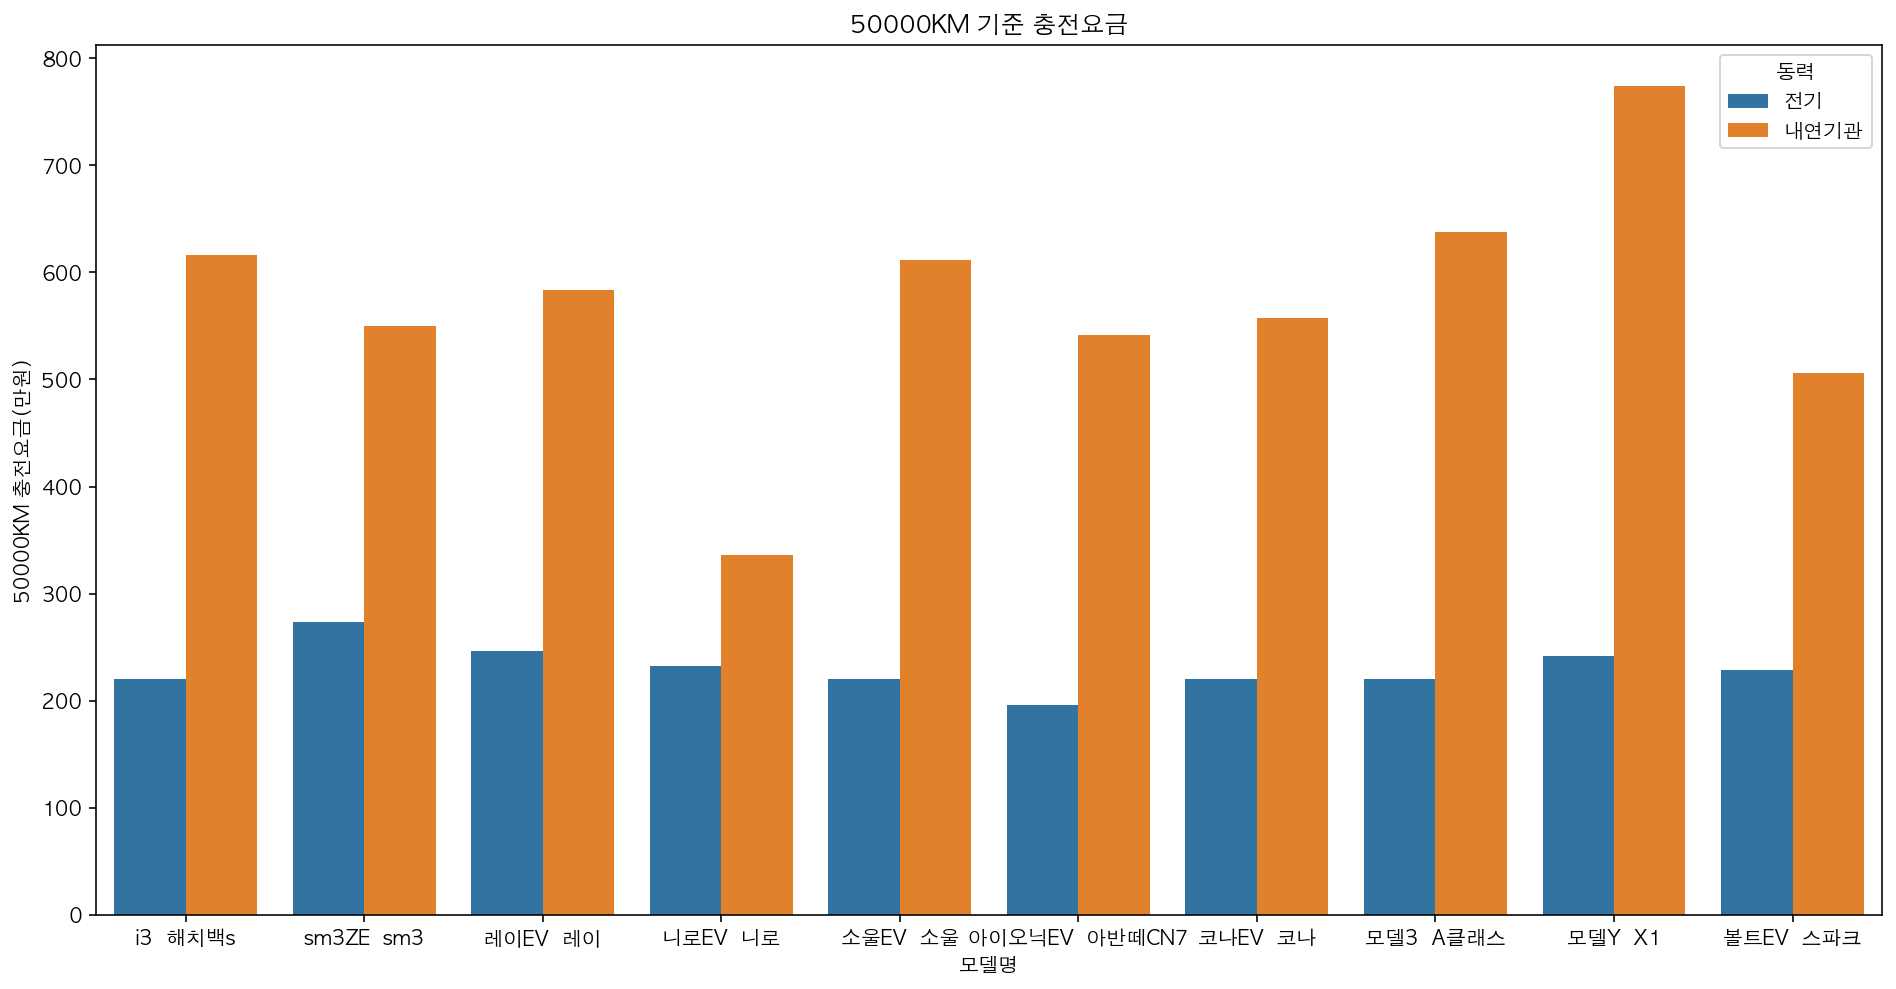

In [195]:
plt.figure(figsize = (16,8))
sns.barplot(x='모델명', y = '50000KM 충전요금(만원)', hue = '동력', data = charge1_car)
plt.title('50000KM 기준 충전요금')
plt.show()

- 전기차 배터리 교체 주기인 약 5년을 기준으로 5년간 유지비 비교
- 서울시 년간 평균 주행거리를 기준으로 50000KM를 기준으로 잡아 충전요금 비교

- 전기차는 급속충전 및 완속충전 비율을 5:5 비율로 계산
- 2021년 기준 급속충전값 = 292.9원/kWh,  완속충전값 = 200원/kWh
- 휘발유값은 지난 1년간 중간값인 1517원/L 으로 계산

#### 4) 차량별 취등록세 비교

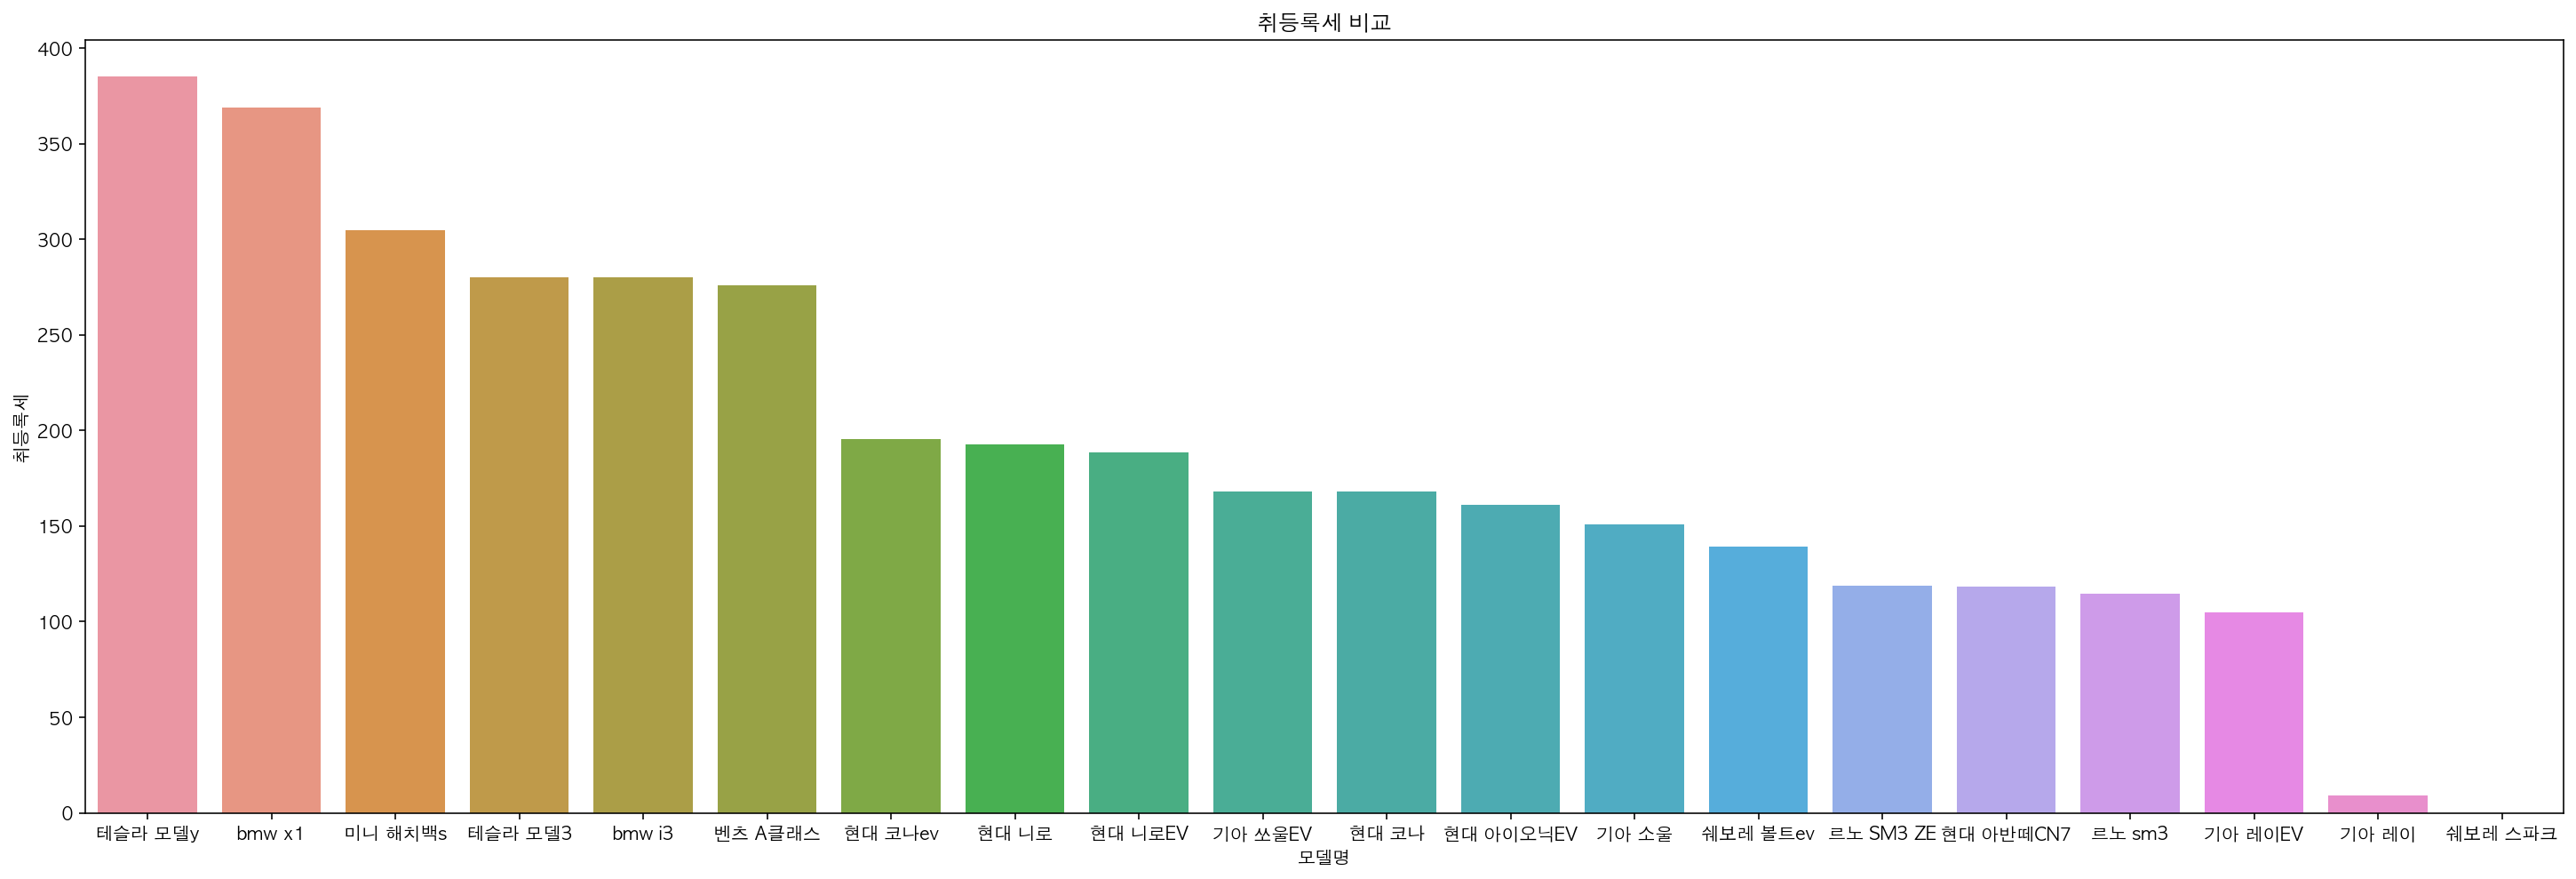

In [196]:
plt.figure(figsize = (25,8))
sns.barplot(x='모델명', y='취등록세', data = subsidy2 )
plt.title('취등록세 비교')

plt.show()

- 2021년 기준 전기차 취등록세: 출고가의 7% - 140만원
- 2021년 기준 내연기관차 취등록세: 경차 출고가의 4%(1000cc미만 면제), 승용차 출고가의 7%
- 전기차가 140만원의 세액공제를 받아도 높은 출고가격 때문에 전기차의 취등록세가 내연기관차 보다 대체로 높음
- 전기차에 대한 초기 비용을 줄이기 위해서 취등록세에 대한 공제 한도를 더욱 높일 필요가 있음

#### 5) 전기차 보조금 비교

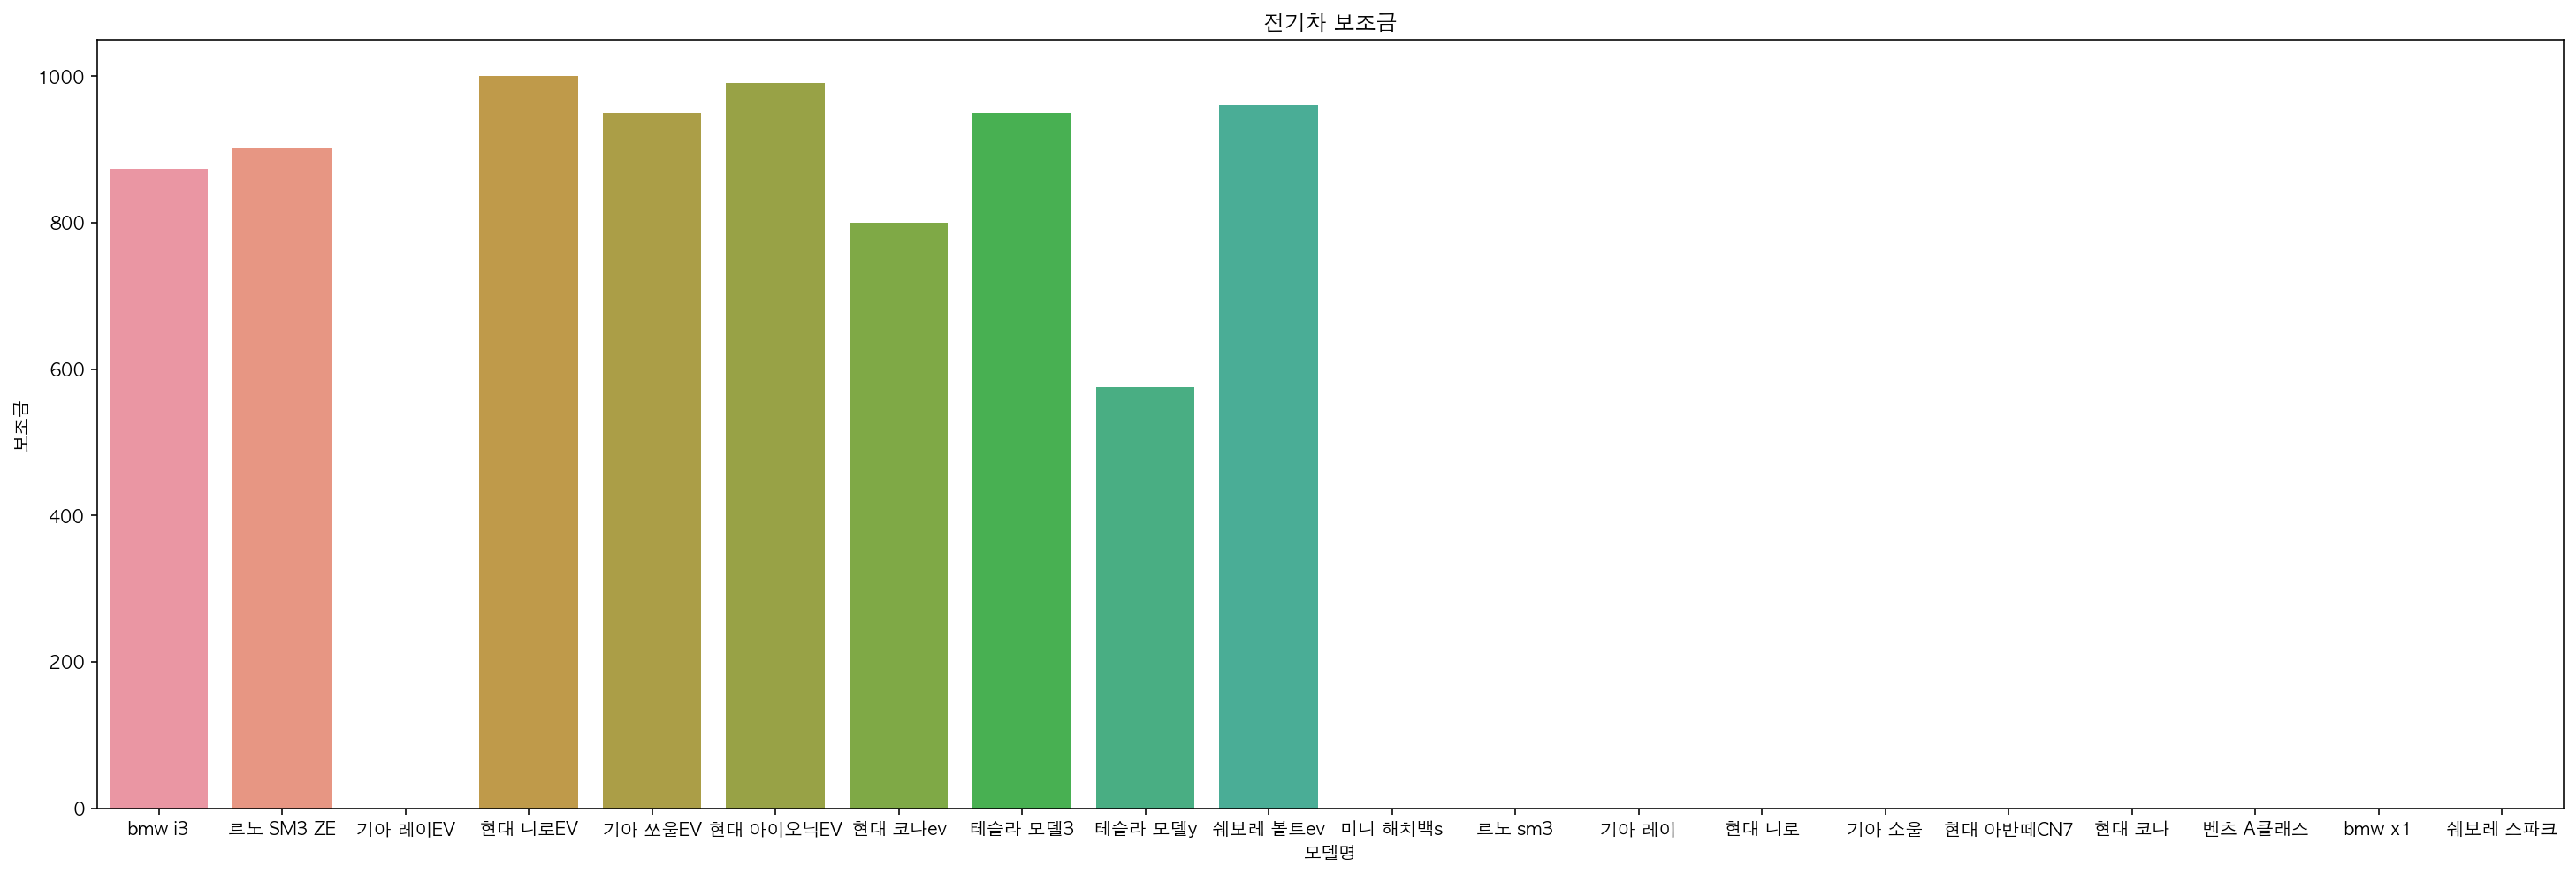

In [203]:
plt.figure(figsize = (25,8))
sns.barplot(x='모델명', y='보조금', data = kind_car )
plt.title('전기차 보조금')

plt.show()

#### 6) 5년 기준 경제성 비교

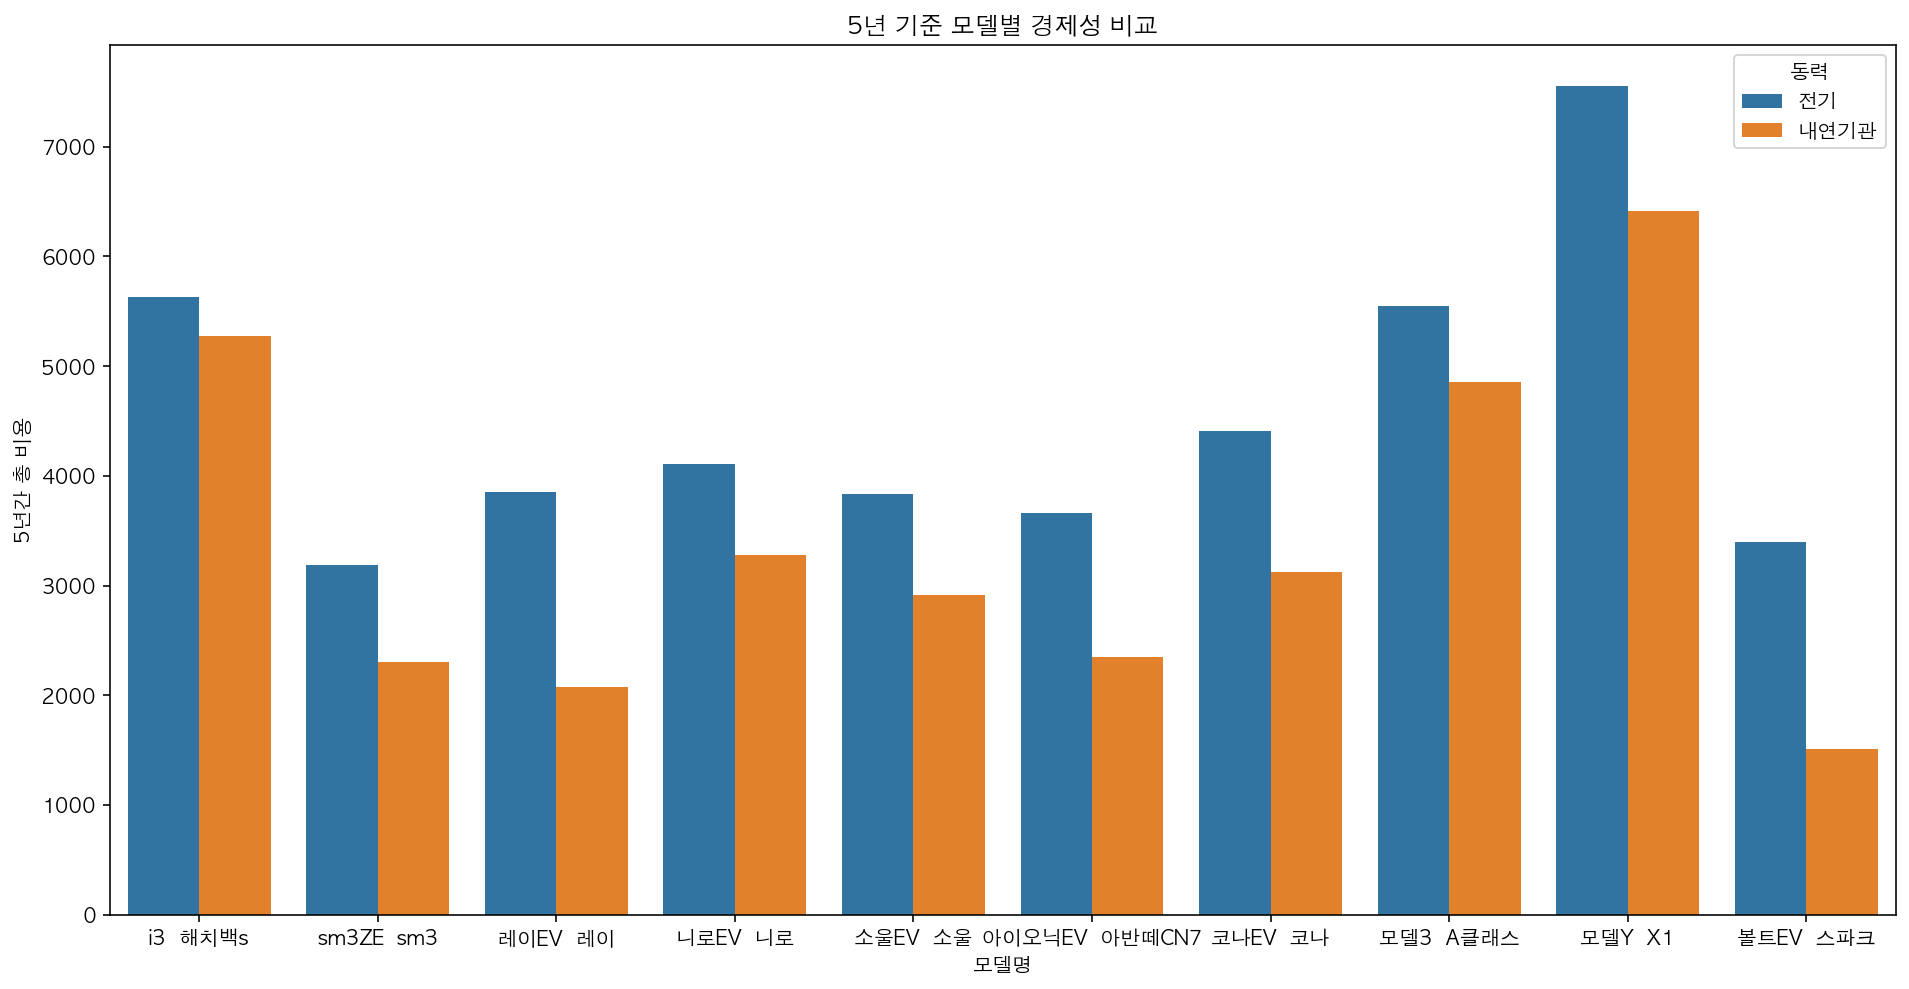

In [198]:
plt.figure(figsize = (16,8))
sns.barplot(x='모델명', y = '5년간 총 비용', hue = '동력', data = fn_price1)
plt.title('5년 기준 모델별 경제성 비교')

plt.show()

- 전기차 배터리 교체 주기인 5년을 기준으로 동급의 전기차와 내연기관차 중 무엇이 경제적인지 비교
- 5년간 최종 비용 = 초기투자비용(출고가 - 보조금 + 취등록세) + 5년간 평균 충전요금
- 이 외에 가장 큰 고려요소로 자동차세, 보험료 등이 있지만, 자동차세는 내연기관이, 보험료는 높은 부품비로 전기차가 20% 비싸 두 금액은 서로 비슷하기에 상쇄 하여 분석
- 5년을 기준으로 잡았을 때 10쌍의 비교군 모두 전기차가 더 높은 비용이 지출되는 것으로 도출

---

## Youtube 전기자동차전기세 검색 단어 분석 및 한전 시간대별/계절별 충전 부하량, 시도별 보조금 접수율 분석

### 데이터 수집
* **Youtube 전기자동차전기세 검색 단어 분석** : youtube 데이터 크롤링 <br>
    구글 프로젝트 신청, API key 발급 및 Google API 클라이언트 라이브러리 설치 (pip install --upgrade google-api-python-client oauth2client) <br>
    크롤링 한 자료를 txt 파일로 저장하여 활용
    

* **한전 시간대별/계절별 충전 부하량** : [공공데이터포털 | dataset](https://www.data.go.kr/data/15039553/fileData.do)<br>
    한국전력공사에서 운영중인 EV충전소 시간대별 충전부하 정보 <br>
    월별, 시간대별, 급속/완속 별 충전부하량 .csv 파일 제공 <br>
    

* **시도별 보조금 접수율 분석** : [저공해차 통합 누리집 | dataset](https://www.ev.or.kr/portal/localInfo)<br>
    저공해차 통합 누리집 2021년 전기승용, 지자체별 보조금 지급현황 .csv 파일 제공 <br>
    

### ◎ Youtube 전기자동차전기세 검색 단어 분석

In [7]:
# DEVELOPER_KEY = "google에서 발급받은 개인 api key 입력"
# YOUTUBE_API_SERVICE_NAME = "youtube"
# YOUTUBE_API_VERSION = "v3"

# youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=DEVELOPER_KEY)

# search_response = youtube.search().list(q="전기자동차전기세",part="snippet",maxResults=1000).execute()

# 위 코드로 'title : keyword', 'description : description' 으로 txt 파일에 저장 후 불러와서 활용

In [8]:
# title 내용 가져오기 

with open("/Users/user/Downloads/EV_keywords_youtube0908.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines:
        print(line)
        
keyword = ''
for line in lines:
    keyword += line

니로 전기차 1년 충전요금 계산해봤습니다

테슬라, 코나EV 전기차, 전기료 인상으로 가솔린보다 비싸? 아니오!...정의선부회장과 이재용부회장 손잡은 까닭은?

&quot;전기차 다시는 안 삽니다&quot; 모델3 차주가 밝히는 장단점[차주 인터뷰]

[발품경제] 불 나고, 혜택 줄고…&#39;전기차 사도 될까요?&#39; / JTBC 뉴스룸

전기차 충전료 또 인상, 날벼락! 기름값보다 비싸?...이제 무턱대고 아이오닉, EV6, 테슬라 사면 낭패! 저렴한 &#39;집밥&#39;을 먼저 구해야!

전기차 많아지면 전기값 오를까?

이럴거면 왜 전기차 샀지..넘 올라 완충하면 2만원 넘네 [카가이]

전기차 충전요금 1.5배 인상? 테슬라 완충에 얼마? 앞으로 더 오른다!  전기차 구매 예정이신분들 꼭 시청하시길...(꿍이TV)

지하주차장에 220V코드 있던데 이걸로 전기차 충전 어떻게 해요??

친환경 보조금 깎이고 충전료 올라가는데..전기차 왜 사?

테슬라(전기차)를 구매 전 이건 꼭 생각해보세요! 전기자동차 충전과 전기요금에 관한 이야기 feat. 이동형 충전기, 완속 충전기

[명장명답] 하이브리드? 전기차? 모두를 놀라게 한 상상도 못한 선택 ※솔직함주의※

전기차 한달 충전요금은? 과연 얼마나 절약되는가?

전기차 충전요금 인상 후 발견된 문제

전기차충전기설치 전기차충전기 설치비용, 충전시간, 한전불입금, 전기요금, 폐차보조금 포터일렉트릭

가솔린 디젤 하이브리드 전기차 월 유지비 비교 계산 [돌빙TV]

전기자동차가 달린다! [다큐S프라임] / YTN 사이언스

전기차 시대 활짝, 이 많은 전기 어떻게 감당하나?

전기차 판매가 급증하니 충전요금을 올리나? 프로전기차박러가 느낀 충전요금 인상의 현실

드디어 집밥!!│집밥가격리뷰│테슬라 슈퍼차저 유료화가 무섭지 않네요. [울트라TV]

벽걸이 에어컨 한 달 내내 틀면 얼마 나올까? 누진제, 전기요금, 전기세 쉽게 계산하는 방법!

전기차! 저렴하게 탈 수 있는 시절 끝난 건가요? 충전요금 줄일

In [9]:
# description 내용 가져오기

with open("/Users/user/Downloads/EV_description_youtube0908.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines:
        print(line)

description = ''
for line in lines:
    description += line

전기차 구매를 고려하시는 분들이라면 도대체 전기 충전요금이 얼마나 나올까? 많이 궁금하실겁니다. 충전환경에 따라 충전 요금이 많이 달라지는데요, 저의 경우는 ...

테슬라, 코나EV 전기차 끝? 가솔린 차보다 운영 비싸졌다?...정의선부회장과 이재용부회장 손잡은 까닭은? --- 구독해주세요 : https://bit.ly/2NCioiE 김한용 ...

테슬라 모델3를 100일 만에 매각하는 한 차주의 속사연을 들어봤습니다 #모델3 #전기차충전 #테슬라 #전기차.

불도 나고 충전요금 할인도 줄었다는데 전기차를 사도 될까. 이런 소비자의 질문에 발로 뛰는 발품경제, 이주찬 기자가 나섰습니다. 값은 얼마나 하는지, 유지비는 어느 ...

E-PIT 의 요금은 어마어마 하죠. 전기차 충전료 전체가 또 인상 되는 날벼락이 떨어졌습니다. ..."이제 기름값 따라잡네!" 대책은? 저렴한 '집밥' 찾아라! (Feat.스타코프) ...

요즘 전기차가 정말 많아졌죠, 그래서 정부에서는 이런 상황에 맞춰 다양한 전기차 정책 변화를 보이고 있습니다. 그렇다면, 전기차가 점점 많아진다면, 전기 충전비용 ...

신차 및 중고차 구매, 수리, 차량 결함 상담하세요☆ 카가이 카카오톡 1:1 채팅 : https://pf.kakao.com/_xbBwbxl 안녕하세요 카가이 구독자 여러분! 지난 7월 1일 ...

전기차 충전요금 1.5배 인상? 테슬라 완충에 얼마? 앞으로 더 오른다! 전기차 구매 예정이신분들 꼭 시청하시길...(꿍이TV) 전기차 충전 요금이 1kw에 173원에서 255 ...

모르고 충전하면 정말로 경찰서 가실수도 있습니다. 지하주차장의 220V를 합법적으로 사용하는 방법! 바로 파워큐브 or 이볼트가 답입니다! #파워큐브 #이볼트 ...

신차 및 중고차 구매, 수리, 차량 결함 상담하세요☆ 카가이 카카오톡 1:1 채팅 : https://pf.kakao.com/_xbBwbxl 올해들어 친환경차 보조금이 완전히 새로워졌습니다.

제가 직접 테슬라 모델 Y를 한달 가량

In [12]:
# konopy 라이브러리를 이용하여 "단어" 단위로 쪼개어줌


okt = konlpy.tag.Okt()
noun_keyword = okt.nouns(keyword)
noun_description = okt.nouns(description)

In [13]:
# keyword와 description 내용을 합치고, 가장 많이 나온 단어를 세어줌

noun_total = noun_keyword + noun_description
count = Counter(noun_total)
most_total = count.most_common(10000)
print(most_total)

[('전기차', 79), ('충전', 61), ('요금', 26), ('전기요금', 19), ('충전기', 15), ('전기', 14), ('테슬라', 13), ('구매', 12), ('수', 12), ('방법', 11), ('전력', 11), ('포터', 10), ('할인', 10), ('자동차', 10), ('계산', 8), ('인상', 8), ('전기자동차', 8), ('및', 8), ('료', 7), ('모델', 7), ('를', 7), ('시간', 7), ('한국전력', 7), ('얼마', 6), ('더', 6), ('보조금', 6), ('전', 6), ('달', 6), ('설치', 6), ('계약', 6), ('집밥', 5), ('꼭', 5), ('하이브리드', 5), ('유지비', 5), ('시대', 5), ('이', 5), ('영상', 5), ('바로', 5), ('오늘', 5), ('코', 4), ('가솔린', 4), ('부회장', 4), ('차주', 4), ('배', 4), ('명장', 4), ('못', 4), ('비용', 4), ('렉', 4), ('트릭', 4), ('비교', 4), ('사이언스', 4), ('하나', 4), ('현실', 4), ('리뷰', 4), ('제', 4), ('상승', 4), ('주행', 4), ('가정', 4), ('소', 4), ('한국', 4), ('용', 4), ('분', 4), ('사용', 4), ('거리', 4), ('용량', 4), ('구입', 4), ('것', 4), ('경제', 3), ('불', 3), ('요', 3), ('아이오', 3), ('닉', 3), ('완충', 3), ('이야기', 3), ('선택', 3), ('과연', 3), ('얼마나', 3), ('폐차', 3), ('에어컨', 3), ('축소', 3), ('편', 3), ('가지', 3), ('등장', 3), ('에너지', 3), ('한전', 3), ('스타코', 3), ('프', 3), ('급속', 3), ('모든', 3), ('구

### ◎ 한전 시간대별/계절별 충전 부하량 분석

In [14]:
year2020 = pd.read_csv('/Users/user/Downloads/한국전력공사_EV시간대별 충전부하_20201230.csv', encoding='euc-kr')
year2020.head(4)

일시 급속/완속     0시     1시     2시     3시     4시     5시     6시      7시  \
0  2020-01    급속  65160  50840  37600  29080  32640  44000  76280  123600   
1  2020-01    완속  15477  14182   7714   4039   2177   2401   4060    6167   
2  2020-02    급속  54800  41680  31880  24680  27560  36120  61600  113880   
3  2020-02    완속  14896  12551   7077   4473   2156   1960   3297    5726   

   ...     14시     15시     16시     17시     18시     19시     20시     21시  \
0  ...  339880  350160  350720  329240  305480  264560  226560  184800   
1  ...   22162   28336   32284   36099   41363   40558   38738   39473   
2  ...  285280  298320  300920  281840  274600  227800  189560  150040   
3  ...   21105   26089   30135   32809   40229   40901   36064   34139   

      22시     23시  
0  143800  125000  
1   41517   48020  
2  117400   95720  
3   35105   41552  

[4 rows x 26 columns]

In [15]:
# 충전 유형 중 '급속'만 가져오기

fast = year2020[year2020['급속/완속'] == '급속']
fast = fast.drop('급속/완속', axis=1)
fast.head(4)

일시     0시     1시     2시     3시     4시     5시     6시      7시      8시  \
0  2020-01  65160  50840  37600  29080  32640  44000  76280  123600  205320   
2  2020-02  54800  41680  31880  24680  27560  36120  61600  113880  178200   
4  2020-03  49720  37200  28760  22960  24760  30440  63080  110440  163800   
6  2020-04  49880  35400  26440  24240  26960  35600  72000  117560  165920   

   ...     14시     15시     16시     17시     18시     19시     20시     21시  \
0  ...  339880  350160  350720  329240  305480  264560  226560  184800   
2  ...  285280  298320  300920  281840  274600  227800  189560  150040   
4  ...  273480  291840  288800  273480  268000  221640  182920  140080   
6  ...  269760  289840  289280  285200  275840  229600  187280  147880   

      22시     23시  
0  143800  125000  
2  117400   95720  
4  106480   75480  
6  106480   78720  

[4 rows x 25 columns]

In [16]:
# 충전 유형 중 '완속'만 가져오기

slow = year2020[year2020['급속/완속'] == '완속']
slow = slow.drop('급속/완속', axis=1)
slow.head(4)

일시     0시     1시    2시    3시    4시    5시    6시    7시     8시  ...  \
1  2020-01  15477  14182  7714  4039  2177  2401  4060  6167  10626  ...   
3  2020-02  14896  12551  7077  4473  2156  1960  3297  5726   9044  ...   
5  2020-03  13258  10549  6405  3955  2380  2009  3073  5180   8988  ...   
7  2020-04  13993  12096  6454  3493  2268  2149  3843  5866   9527  ...   

     14시    15시    16시    17시    18시    19시    20시    21시    22시    23시  
1  22162  28336  32284  36099  41363  40558  38738  39473  41517  48020  
3  21105  26089  30135  32809  40229  40901  36064  34139  35105  41552  
5  21357  27419  30044  37506  48006  47579  38185  36050  33201  36456  
7  21742  26761  33194  41615  48307  48356  41650  37835  36701  36960  

[4 rows x 25 columns]

In [17]:
# 그래프로 그리기 쉽게 리스트 형태로 변환하기
# 나중에 x축으로 그려야 할 시간대를 리스트로 가져오기

time = year2020.columns.to_list()
del time[0:2]
time

['0시',
 '1시',
 '2시',
 '3시',
 '4시',
 '5시',
 '6시',
 '7시',
 '8시',
 '9시',
 '10시',
 '11시',
 '12시',
 '13시',
 '14시',
 '15시',
 '16시',
 '17시',
 '18시',
 '19시',
 '20시',
 '21시',
 '22시',
 '23시']

In [18]:
# 급속 1월~12월 자료를 리스트로 가져오기

fast_1 = fast.iloc[0,1:].to_list()
fast_2 = fast.iloc[1,1:].to_list()
fast_3 = fast.iloc[2,1:].to_list()
fast_4 = fast.iloc[3,1:].to_list()
fast_5 = fast.iloc[4,1:].to_list()
fast_6 = fast.iloc[5,1:].to_list()
fast_7 = fast.iloc[6,1:].to_list()
fast_8 = fast.iloc[7,1:].to_list()
fast_9 = fast.iloc[8,1:].to_list()
fast_10 = fast.iloc[9,1:].to_list()
fast_11 = fast.iloc[10,1:].to_list()
fast_12 = fast.iloc[11,1:].to_list()

In [19]:
# 완속 1월~12월 자료를 리스트로 가져오기

slow_1 = slow.iloc[0,1:].to_list()
slow_2 = slow.iloc[1,1:].to_list()
slow_3 = slow.iloc[2,1:].to_list()
slow_4 = slow.iloc[3,1:].to_list()
slow_5 = slow.iloc[4,1:].to_list()
slow_6 = slow.iloc[5,1:].to_list()
slow_7 = slow.iloc[6,1:].to_list()
slow_8 = slow.iloc[7,1:].to_list()
slow_9 = slow.iloc[8,1:].to_list()
slow_10 = slow.iloc[9,1:].to_list()
slow_11 = slow.iloc[10,1:].to_list()
slow_12 = slow.iloc[11,1:].to_list()

### ◎ 전기자동차 구매보조금 지급현황 2021년 분석

In [21]:
subsidy2021 = pd.read_excel('/Users/user/Downloads/총괄현황(전기자동차 승용)_2021.xls')
subsidy2021.head(3)

시도   지역구분    차종                             접수방법  \
0  서울  서울특별시  전기승용               *일반: 접수순\n*우선: 접수순   
1  부산  부산광역시  전기승용  *일반: 접수순(초과시 출고등록순)\n*우선: 출고등록순   
2  대구  대구광역시  전기승용           *일반: 출고등록순\n*우선: 출고등록순   

   민간공고대수\n전체\n(우선순위)\n(법인·기관)\n(일반)  민간공고대수 전체  민간공고대수 우선순위  민간공고대수 법인  \
0  14506\n (1445)\n (2027)\n (11034)      14506         1445       2027   
1     4150\n (220)\n (2471)\n (1459)       4150          220       2471   
2      2451\n (245)\n (980)\n (1226)       2451          245        980   

   민간공고대수 일반 접수대수\n(우선순위)\n(법인·기관)\n(일반)  접수대수 우선순위  접수대수 법인  접수대수 일반  \
0      11034  \n (594)\n (5201)\n (5496)        594     5201     5496   
1       1459  \n (220)\n (2451)\n (1641)        220     2451     1641   
2       1226    \n (47)\n (571)\n (1635)         47      571     1635   

   접수 잔여대수 전체  접수 잔여대수 일반  출고대수 전체\n(우선순위)\n(법인·기관)\n(일반)  출고대수 전체  \
0        3215        5538  6432\n (477)\n (2361)\n (3594)     6432   
1           0           0  3230\n (177)\n (1941)\n (1112)     3230   
2         198           0    1730\n (34)\n (463)\n (1233)     1730   

  출고잔여대수 전체\n(우선순위)\n(법인·기관)\n(일반)  \
0      8074\n (968)\n (0)\n (7106)   
1       920\n (43)\n (530)\n (347)   
2        721\n (211)\n (517)\n (0)   

                                                  비고  
0  ★★ 기존 본예산 민간보급 5,367대(택시300대 포함)에 추경 9,139대 합하...  
1  ****************** 보조금 단가차액 발생으로 인한 추가보급 *****...  
2  ㅇ 보급수량 : 4,043대 [승용차 2,451(일반 1,226, 법인 980, 우...

In [22]:
# '차종' 칼럼에 '전기승용' 외에 다른 차종이 있는지 확인

subsidy2021[subsidy2021['차종'] != '전기승용']

Empty DataFrame
Columns: [시도, 지역구분, 차종, 접수방법, 민간공고대수
전체
(우선순위)
(법인·기관)
(일반), 민간공고대수 전체, 민간공고대수 우선순위, 민간공고대수 법인, 민간공고대수 일반, 접수대수
(우선순위)
(법인·기관)
(일반), 접수대수 우선순위, 접수대수 법인, 접수대수 일반, 접수 잔여대수 전체, 접수 잔여대수 일반, 출고대수 전체
(우선순위)
(법인·기관)
(일반), 출고대수 전체, 출고잔여대수 전체
(우선순위)
(법인·기관)
(일반), 비고]
Index: []

In [23]:
# '시도' 칼럼에 '전국' 칼럼이 있는지 여부 확인 
# 2018년 자료에서는 '전국'으로 잘못 구분되어 있어 제대로 분석이 안된적이 있어서 미리 확인하고자 함

subsidy2021[subsidy2021['시도'] == '전국']

Empty DataFrame
Columns: [시도, 지역구분, 차종, 접수방법, 민간공고대수
전체
(우선순위)
(법인·기관)
(일반), 민간공고대수 전체, 민간공고대수 우선순위, 민간공고대수 법인, 민간공고대수 일반, 접수대수
(우선순위)
(법인·기관)
(일반), 접수대수 우선순위, 접수대수 법인, 접수대수 일반, 접수 잔여대수 전체, 접수 잔여대수 일반, 출고대수 전체
(우선순위)
(법인·기관)
(일반), 출고대수 전체, 출고잔여대수 전체
(우선순위)
(법인·기관)
(일반), 비고]
Index: []

In [24]:
# 전체 파일에서 유의미하다고 판단되는 칼럼만 가져와 data 만들기

subsidy2021_copy = subsidy2021[['시도', '지역구분', '민간공고대수 전체', '접수대수 우선순위', '접수대수 법인', '접수대수 일반', '접수 잔여대수 전체']]
subsidy2021_copy

시도     지역구분  민간공고대수 전체  접수대수 우선순위  접수대수 법인  접수대수 일반  접수 잔여대수 전체
0    서울    서울특별시      14506        594     5201     5496        3215
1    부산    부산광역시       4150        220     2451     1641           0
2    대구    대구광역시       2451         47      571     1635         198
3    인천    인천광역시       4568         66     2502     1716         284
4    광주    광주광역시       1148         42      409      664          33
..   ..      ...        ...        ...      ...      ...         ...
156  경남      산청군         65          0        1       37          27
157  경남      함양군         52          0        0       14          38
158  경남      거창군         46          1        0       25          20
159  경남      합천군         79          0        3       39          37
160  제주  제주특별자치도       2031          2      698     1382           0

[161 rows x 7 columns]

In [25]:
# 접수율 현황을 보기 위해, '전체 접수' 칼럼을 새롭게 생성함 

subsidy2021_copy['전체 접수'] = subsidy2021_copy['접수대수 우선순위'] + subsidy2021_copy['접수대수 법인'] + subsidy2021_copy['접수대수 일반']
subsidy2021_copy

<ipython-input-25-d7becd28079d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsidy2021_copy['전체 접수'] = subsidy2021_copy['접수대수 우선순위'] + subsidy2021_copy['접수대수 법인'] + subsidy2021_copy['접수대수 일반']


시도     지역구분  민간공고대수 전체  접수대수 우선순위  접수대수 법인  접수대수 일반  접수 잔여대수 전체  전체 접수
0    서울    서울특별시      14506        594     5201     5496        3215  11291
1    부산    부산광역시       4150        220     2451     1641           0   4312
2    대구    대구광역시       2451         47      571     1635         198   2253
3    인천    인천광역시       4568         66     2502     1716         284   4284
4    광주    광주광역시       1148         42      409      664          33   1115
..   ..      ...        ...        ...      ...      ...         ...    ...
156  경남      산청군         65          0        1       37          27     38
157  경남      함양군         52          0        0       14          38     14
158  경남      거창군         46          1        0       25          20     26
159  경남      합천군         79          0        3       39          37     42
160  제주  제주특별자치도       2031          2      698     1382           0   2082

[161 rows x 8 columns]

In [26]:
# 정리한 파일을 pivot table 형태로 재정리

subsidy2021_pivot = pd.pivot_table(subsidy2021_copy,
                        index='시도',
                        values=['민간공고대수 전체', '전체 접수', '접수 잔여대수 전체'],
                        aggfunc='sum')

subsidy2021_pivot

민간공고대수 전체  전체 접수  접수 잔여대수 전체
시도                              
강원       2624   1533        1091
경기      10228  11153         401
경남       3466   2281        1254
경북       2259   1655         688
광주       1148   1115          33
대구       2451   2253         198
대전       3154   2438         716
부산       4150   4312           0
서울      14506  11291        3215
세종        300    411           0
울산        375    464           0
인천       4568   4284         284
전남       1538   1464         155
전북       1517   1927          58
제주       2031   2082           0
충남       2441   2182         425
충북       2616   2107         569

In [27]:
# '전체 접수'/'민간공고대수 전체' 를 계산하여, 접수율(%)로 나타내는 칼럼을 생성

subsidy2021_pivot['접수율(%)'] = ((subsidy2021_pivot['전체 접수']/subsidy2021_pivot['민간공고대수 전체'])*100).round(0)
subsidy2021_pivot

민간공고대수 전체  전체 접수  접수 잔여대수 전체  접수율(%)
시도                                      
강원       2624   1533        1091    58.0
경기      10228  11153         401   109.0
경남       3466   2281        1254    66.0
경북       2259   1655         688    73.0
광주       1148   1115          33    97.0
대구       2451   2253         198    92.0
대전       3154   2438         716    77.0
부산       4150   4312           0   104.0
서울      14506  11291        3215    78.0
세종        300    411           0   137.0
울산        375    464           0   124.0
인천       4568   4284         284    94.0
전남       1538   1464         155    95.0
전북       1517   1927          58   127.0
제주       2031   2082           0   103.0
충남       2441   2182         425    89.0
충북       2616   2107         569    81.0

In [28]:
# '접수율(%)'이 높은 지역순으로 정리

subsidy2021_pivot = subsidy2021_pivot.sort_values(by='접수율(%)', ascending=False)
subsidy2021_pivot

민간공고대수 전체  전체 접수  접수 잔여대수 전체  접수율(%)
시도                                      
세종        300    411           0   137.0
전북       1517   1927          58   127.0
울산        375    464           0   124.0
경기      10228  11153         401   109.0
부산       4150   4312           0   104.0
제주       2031   2082           0   103.0
광주       1148   1115          33    97.0
전남       1538   1464         155    95.0
인천       4568   4284         284    94.0
대구       2451   2253         198    92.0
충남       2441   2182         425    89.0
충북       2616   2107         569    81.0
서울      14506  11291        3215    78.0
대전       3154   2438         716    77.0
경북       2259   1655         688    73.0
경남       3466   2281        1254    66.0
강원       2624   1533        1091    58.0

In [30]:
# 시도별 시도청 좌표를 이용하여 '접수율(%)' 팝업을 만들어주기 위해 아래 포인트 좌표 정보를 기존 데이터 칼럼에 추가함

points = [(36.48029578639659, 127.28873261198503),
         (35.82083993323393, 127.1087025004606),
         (35.53975333304137, 129.31158124258656),
         (37.27508576391278, 127.00916864076918),
         (35.17997543308802, 129.07496554072623),
         (33.49975802049925, 126.53122181185711),
         (35.16023446384084, 126.85147579839806),
         (34.81638593672694, 126.46291346955505),
         (37.456311115170536, 126.70593715611761),
         (35.87152629515447, 128.60177155608466),
         (36.65945461268764, 126.67323591510677),
         (36.635662921691626, 127.49141962911725),
         (37.56665790737507, 126.97843752283612),
         (36.3504653210207, 127.38484015609463),
         (36.576149919388975, 128.50560632726288),
         (35.238334294583886, 128.69245164258035),
         (37.88536075206237, 127.72974422734971)]

In [32]:
subsidy2021_pivot['points'] = points
subsidy2021_pivot

민간공고대수 전체  전체 접수  접수 잔여대수 전체  접수율(%)  \
시도                                         
세종        300    411           0   137.0   
전북       1517   1927          58   127.0   
울산        375    464           0   124.0   
경기      10228  11153         401   109.0   
부산       4150   4312           0   104.0   
제주       2031   2082           0   103.0   
광주       1148   1115          33    97.0   
전남       1538   1464         155    95.0   
인천       4568   4284         284    94.0   
대구       2451   2253         198    92.0   
충남       2441   2182         425    89.0   
충북       2616   2107         569    81.0   
서울      14506  11291        3215    78.0   
대전       3154   2438         716    77.0   
경북       2259   1655         688    73.0   
경남       3466   2281        1254    66.0   
강원       2624   1533        1091    58.0   

                                      points  
시도                                            
세종   (36.48029578639659, 127.28873261198503)  
전북    (35.82083993323393, 127.1087025004606)  
울산   (35.53975333304137, 129.31158124258656)  
경기   (37.27508576391278, 127.00916864076918)  
부산   (35.17997543308802, 129.07496554072623)  
제주   (33.49975802049925, 126.53122181185711)  
광주   (35.16023446384084, 126.85147579839806)  
전남   (34.81638593672694, 126.46291346955505)  
인천  (37.456311115170536, 126.70593715611761)  
대구   (35.87152629515447, 128.60177155608466)  
충남   (36.65945461268764, 126.67323591510677)  
충북  (36.635662921691626, 127.49141962911725)  
서울   (37.56665790737507, 126.97843752283612)  
대전    (36.3504653210207, 127.38484015609463)  
경북  (36.576149919388975, 128.50560632726288)  
경남  (35.238334294583886, 128.69245164258035)  
강원   (37.88536075206237, 127.72974422734971)

In [33]:
# 지도에 그려보기 위해서 geojson 파일과 칼럼을 맞춰주는 작업 필요
# TL_SCCO_CTPRVN.zip.geojson 파일의 CTP_KOR_NM과 df2021 테이블의 지역명을 매칭시켜주기 위해 인덱스 이름 변경

subsidy2021_pivot = subsidy2021_pivot.rename(index={'세종':'세종특별자치시', '전북':'전라북도',
                                  '제주':'제주특별자치도', '전남':'전라남도',
                                 '경기':'경기도', '서울':'서울특별시',
                                 '울산':'울산광역시', '부산':'부산광역시',
                                 '광주':'광주광역시', '인천':'인천광역시',
                                 '대구':'대구광역시', '충남':'충청남도',
                                 '충북':'충청북도', '대전':'대전광역시',
                                 '경북':'경상북도', '경남':'경상남도',
                                 '강원':'강원도'})

### ◎ Youtube 전기자동차전기세 검색 단어 분석 결과를 워드클라우드로 그려보기

(-0.5, 1199.5, 1199.5, -0.5)

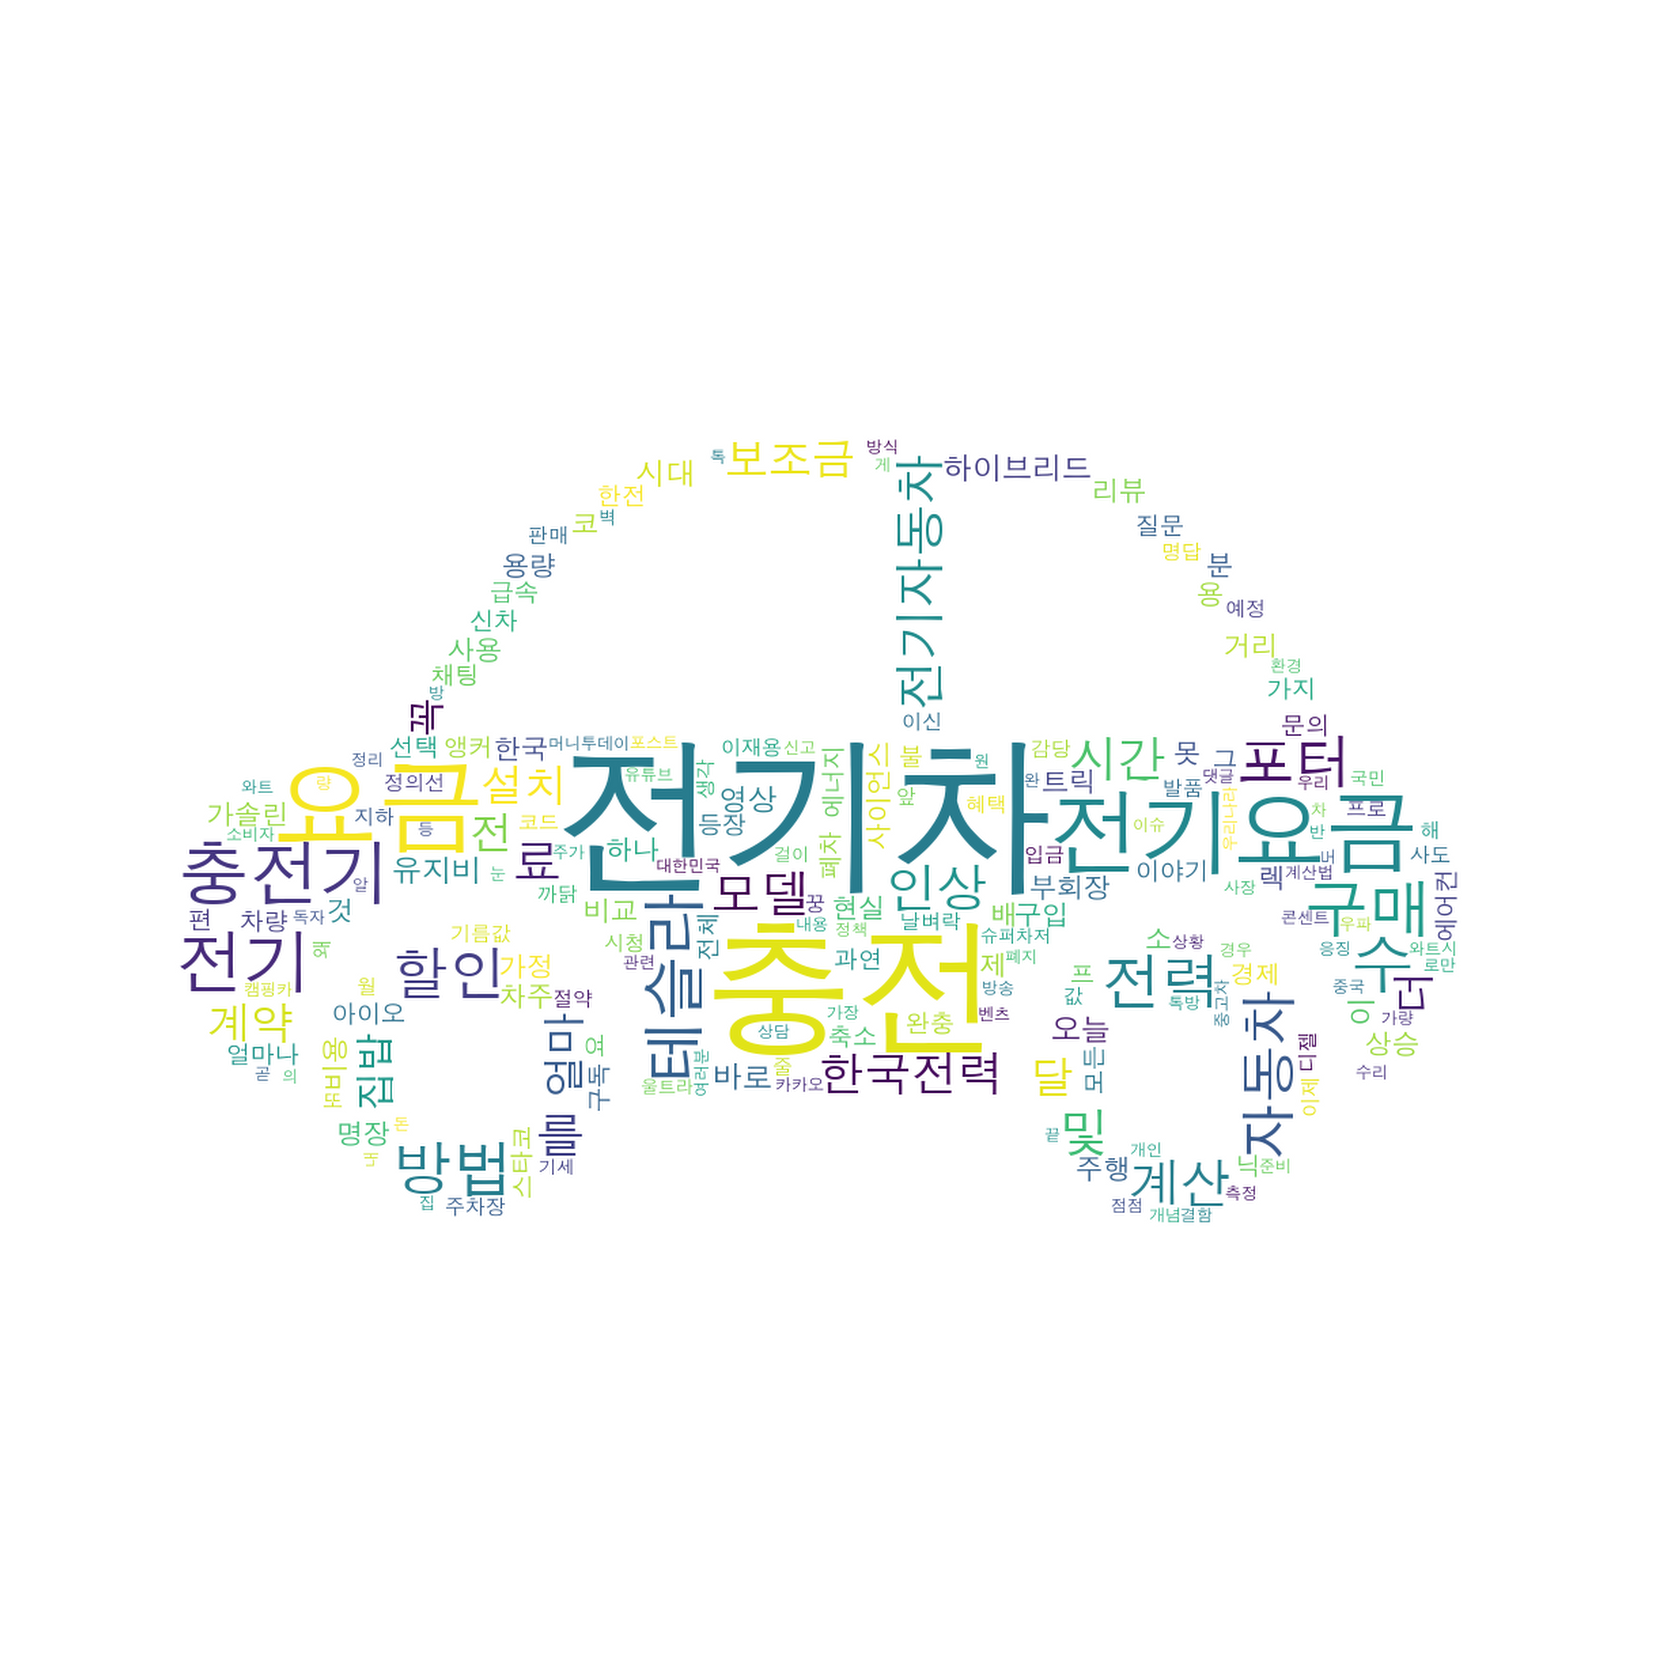

In [34]:
# 워드클라우드 그리기

mask = np.array(Image.open('car4.jpeg'))

wordcloud = WordCloud(font_path='AppleGothic',
                      background_color='white',
                      width = 480,
                      height = 480,
                     mask=mask)
wordcloud.generate_from_frequencies(dict(most_total))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")

In [35]:
wordcloud.to_file('EV_car_youtube.png')

전기자동차와 더불어 `충전기` , `전기요금`, `유지비`, `보조금` 등과 같은 것들에 관심이 많은 것을 알 수 있음<br>
전기자동차를 구매하려고 할 때 충전기의 위치, 전기요금과 보조금 부분은 크게 영향을 주기 때문임<br>
따라서, 현재 한국은 위에 고려해야할 여건들이 잘 갖추어져 있는지 아래와 같이 알아보고자 함<br>
* 1.휴게소 별 충전기 현황
* 2.전기차와 내연기관차의 경제성 분석
* 3.계절별/시간대별 전기차 충전부하량 분석
* 4.시도별 보조금 접수현황

### ◎ 계절별, 시간대별 충전부하량 그래프 그리기 <br>
[한국전력 전기공급 약관](https://cyber.kepco.co.kr/ckepco/front/jsp/CY/D/C/CYDCHP00403.jsp) 를 기준으로 계절별 최대 부하시간대의 충전부하량을 살펴보고자 함
* **시간대별** : 한전은 시간대별(총 3종류)로 계절별 다른 전기요금을 부과하고 있음
    * 경부하시간대 / 중간부하시간대 / 최대부하시간대
    * 위 시간대 중에, 전기료가 가장 비싼 `최대부하시간대` 의 충전부하량이 어떤지 알아보고자 함
    

* **계절별** : 
    * 여름철 (6,7,8월)
    * 봄,가을철 (3,4,5,9,10월) 
    * 겨울철 (11,12,1,2월) 

1. 여름철 (6,7,8월), 여름철 최대 부하시간대 (10시-12시, 13시-17시)

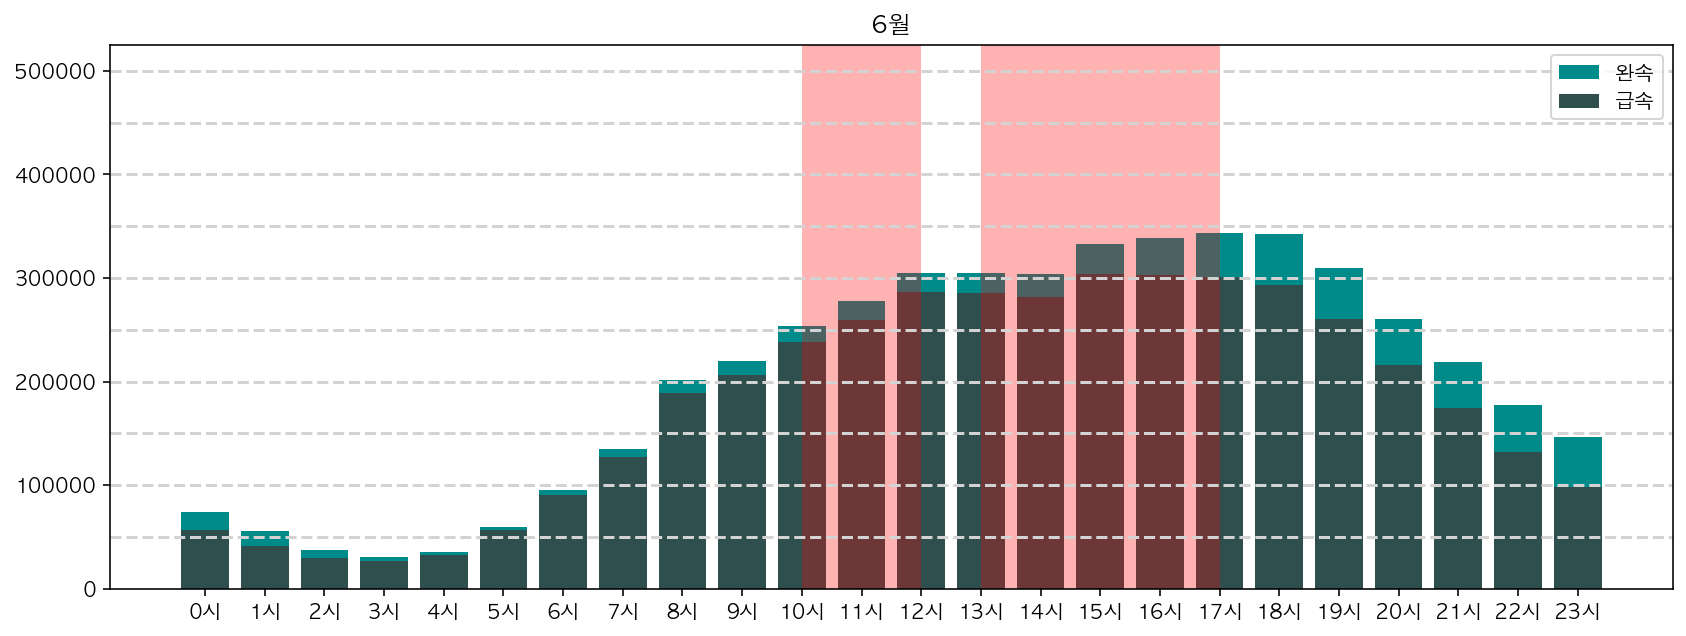

In [36]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_6, color='darkslategrey')
p2 = plt.bar(time, slow_6, bottom=fast_6, color='darkcyan')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('6월')
plt.xticks(time)
plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')


span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[13]
span_end = time[17]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

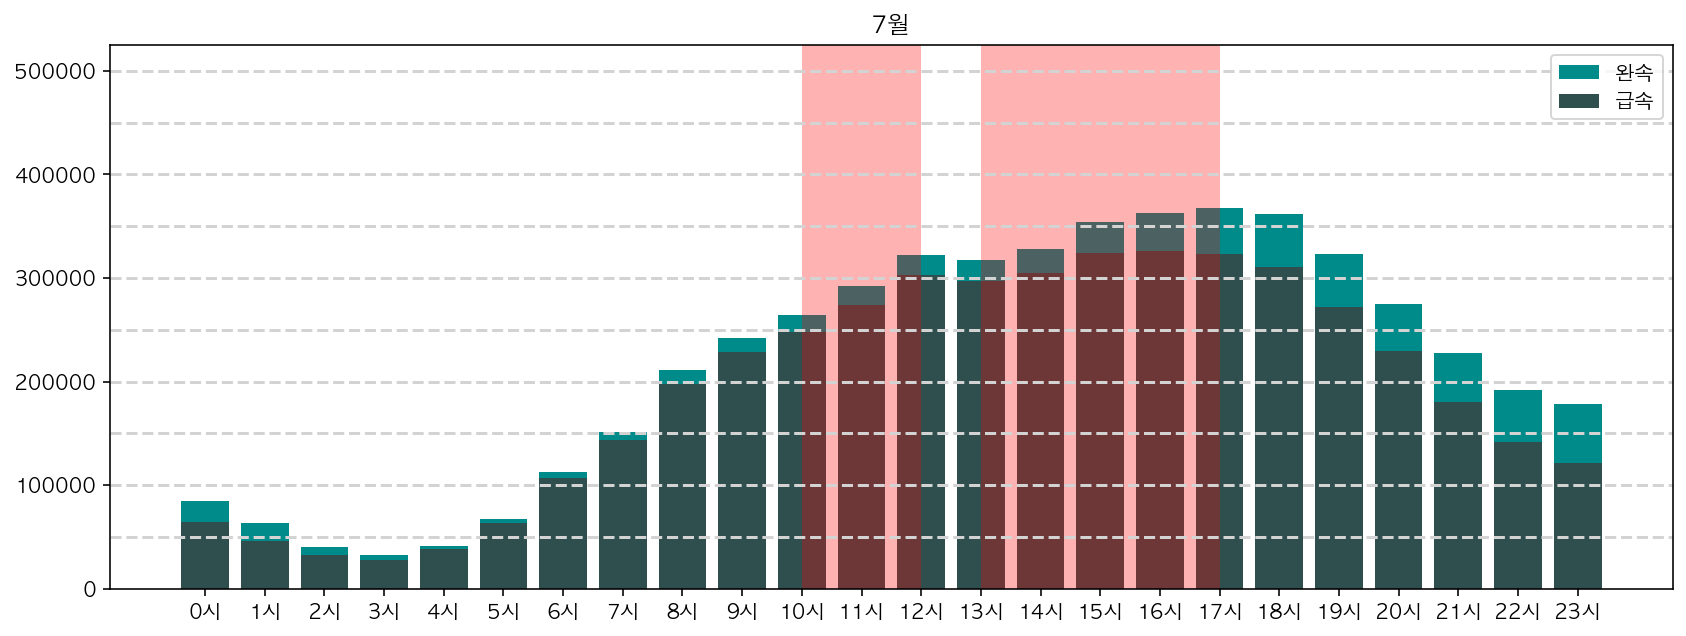

In [37]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_7, color='darkslategrey')
p2 = plt.bar(time, slow_7, bottom=fast_7, color='darkcyan')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('7월')
plt.xticks(time)
plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')


span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[13]
span_end = time[17]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

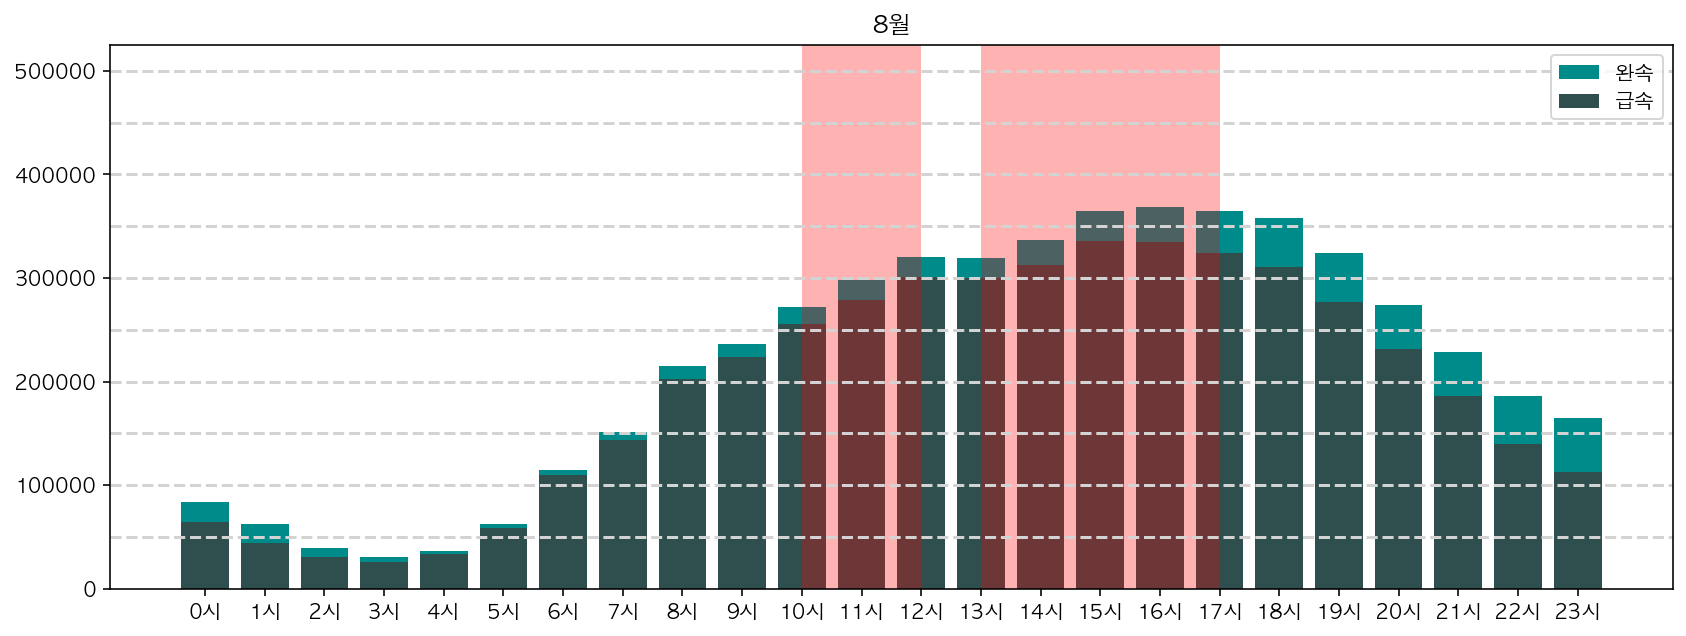

In [38]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_8, color='darkslategrey')
p2 = plt.bar(time, slow_8, bottom=fast_8, color='darkcyan')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('8월')
plt.xticks(time)
plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')


span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[13]
span_end = time[17]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

2. 봄,가을철 (3,4,5,9,10월), 봄가을철 최대 부하시간대 (10시-12시, 13시-17시)

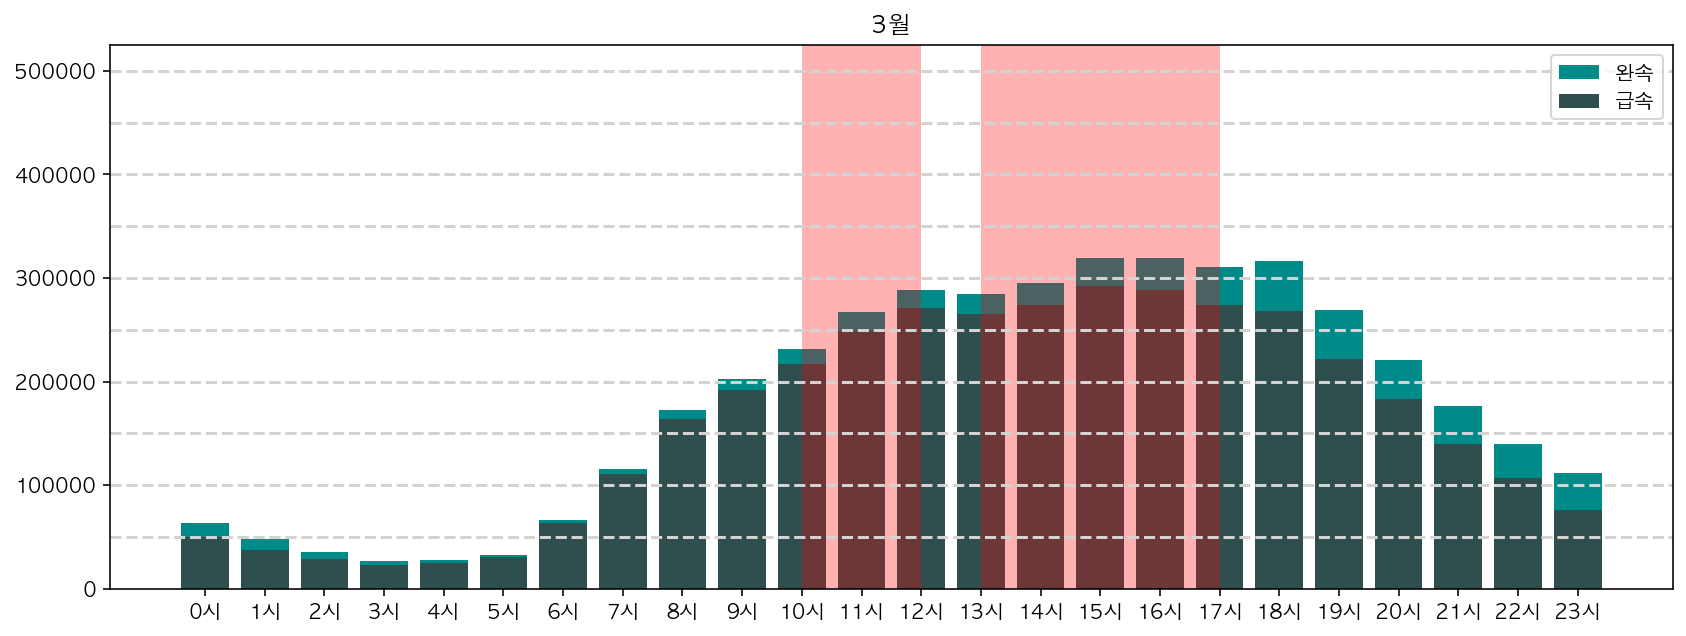

In [39]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_3, color='darkslategrey')
p2 = plt.bar(time, slow_3, bottom=fast_3, color='darkcyan')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('3월')
plt.xticks(time)
plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')


span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[13]
span_end = time[17]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

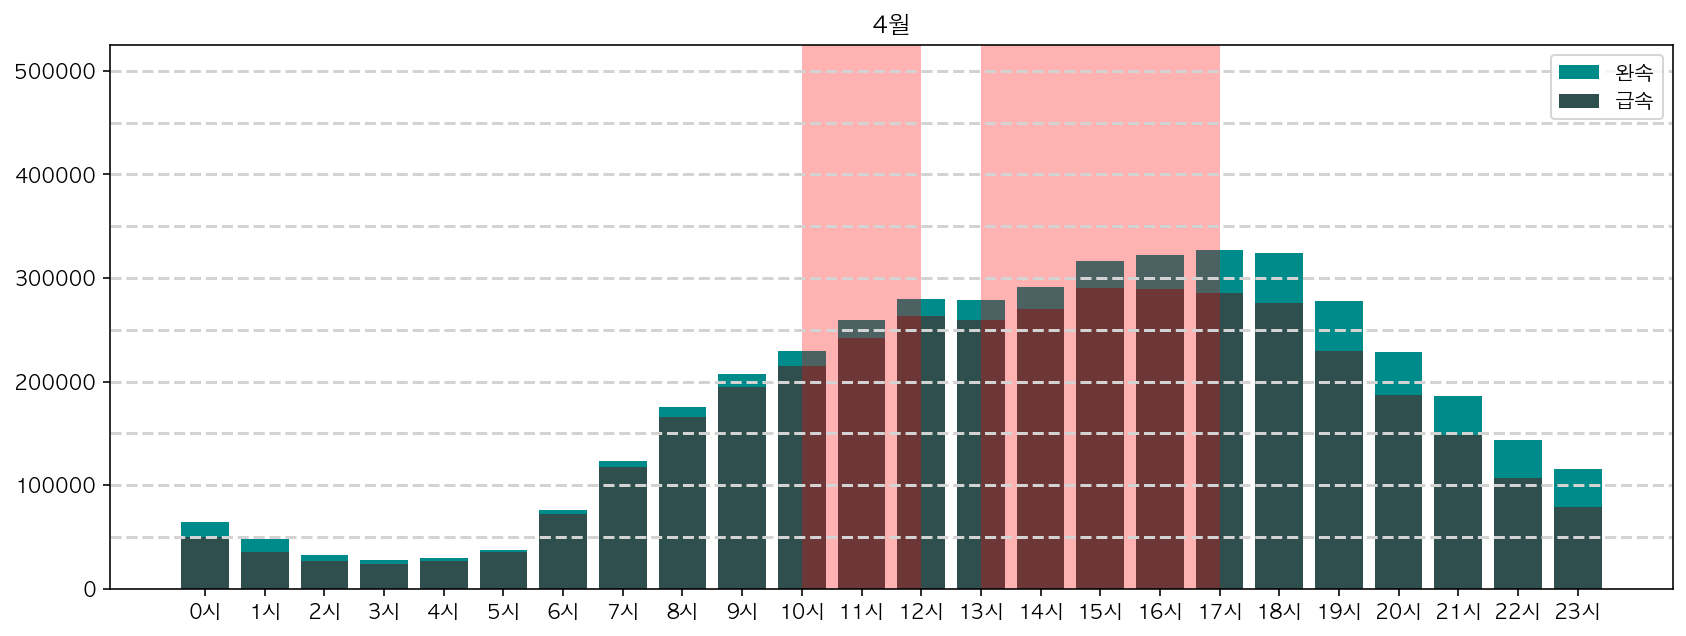

In [40]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_4, color='darkslategrey')
p2 = plt.bar(time, slow_4, bottom=fast_4, color='darkcyan')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('4월')
plt.xticks(time)
plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')


span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[13]
span_end = time[17]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

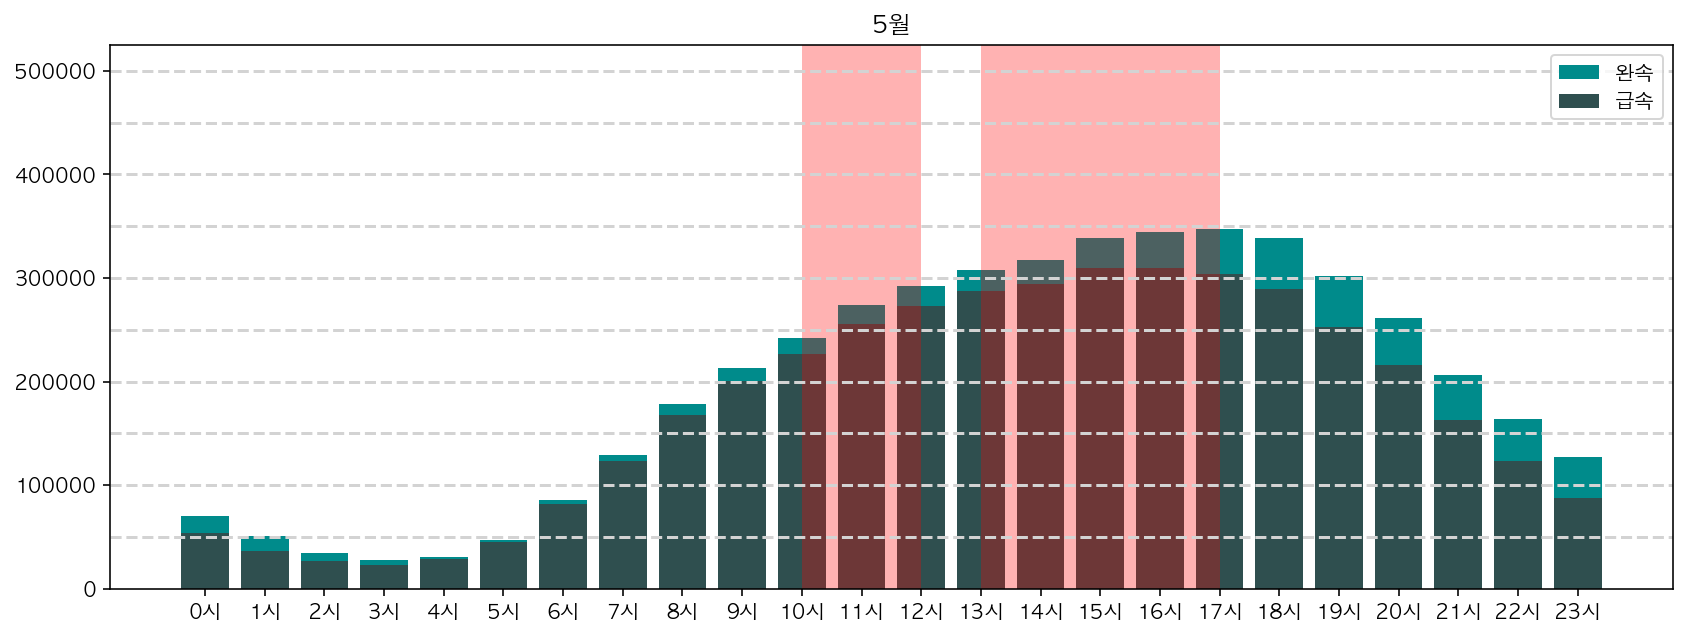

In [41]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_5, color='darkslategrey')
p2 = plt.bar(time, slow_5, bottom=fast_5, color='darkcyan')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('5월')
plt.xticks(time)
plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')


span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[13]
span_end = time[17]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

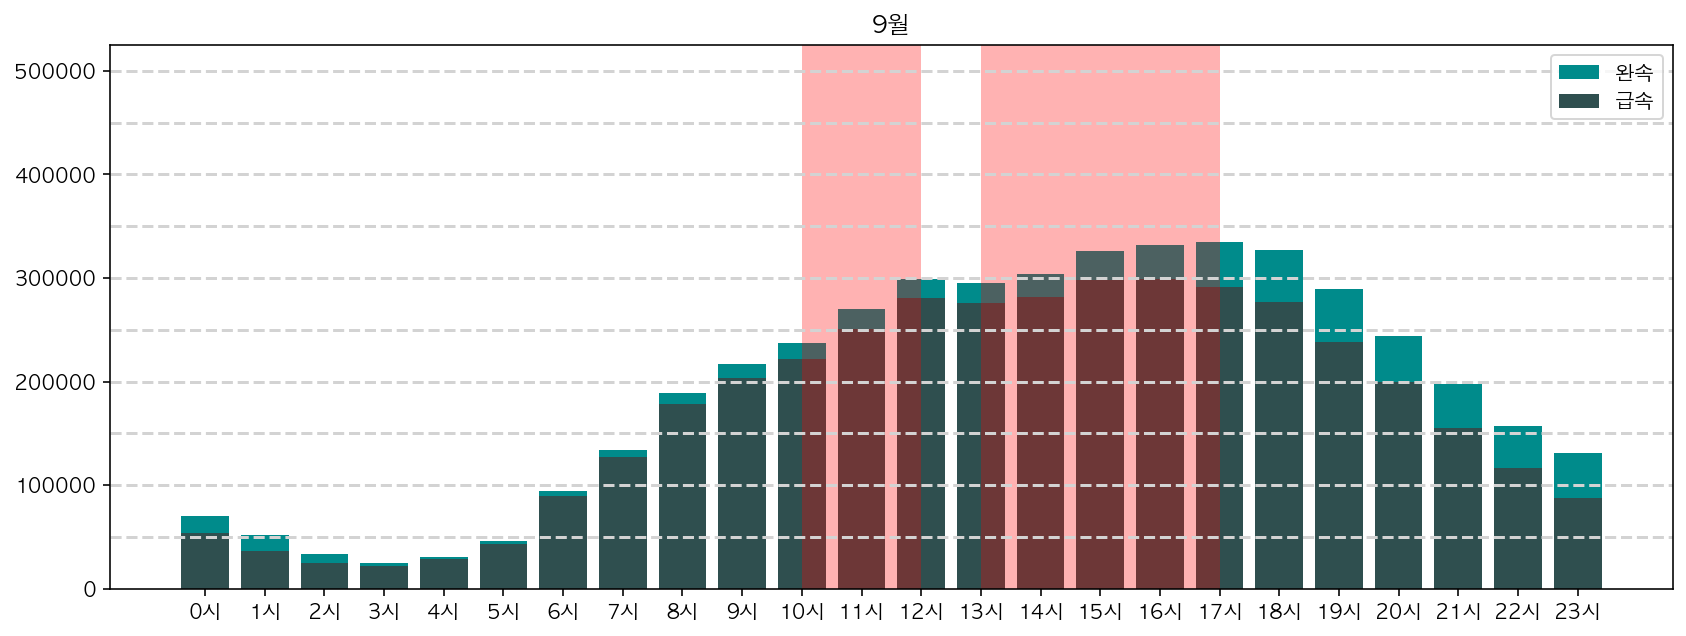

In [42]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_9, color='darkslategrey')
p2 = plt.bar(time, slow_9, bottom=fast_9, color='darkcyan')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('9월')
plt.xticks(time)
plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')


span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[13]
span_end = time[17]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

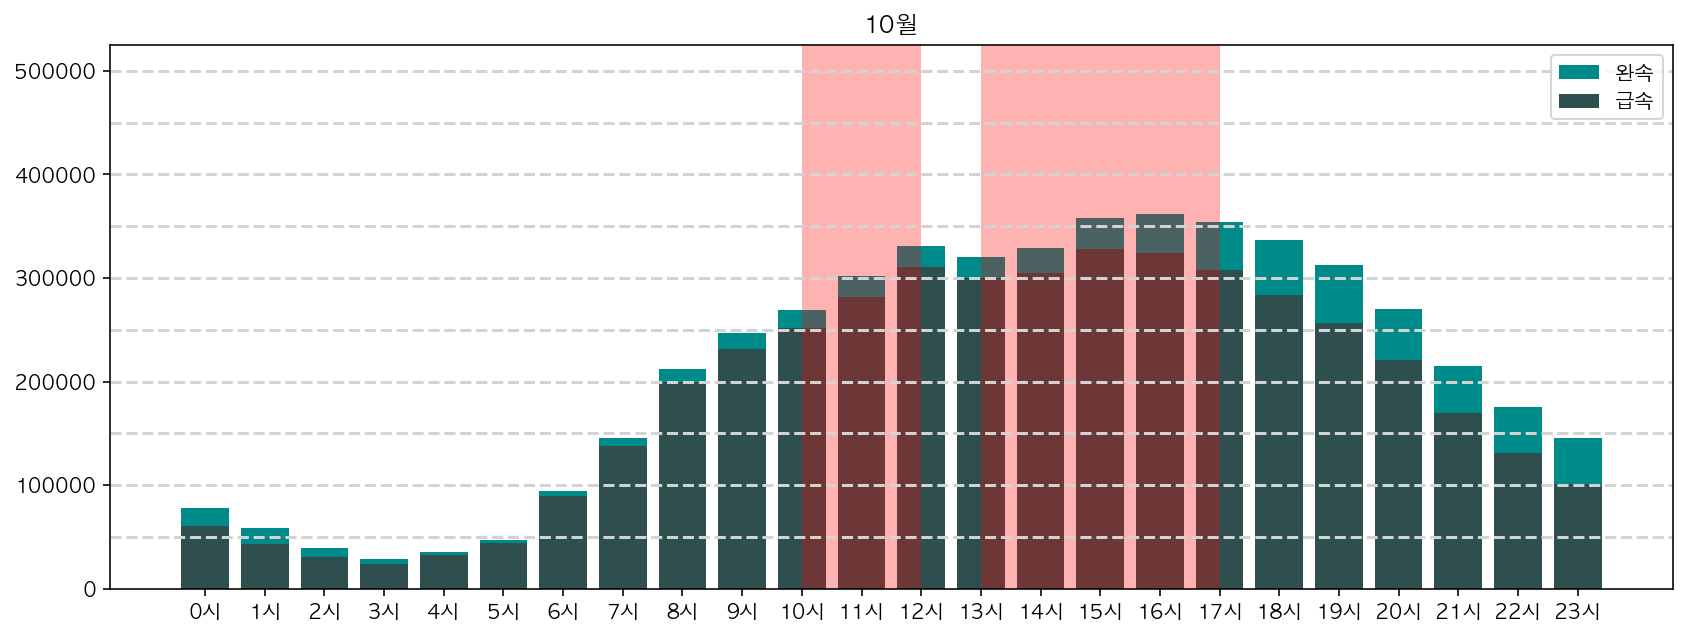

In [43]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_10, color='darkslategrey')
p2 = plt.bar(time, slow_10, bottom=fast_10, color='darkcyan')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('10월')
plt.xticks(time)
plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')


span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[13]
span_end = time[17]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

3. 겨울철 (11,12,1,2월), 겨울철 최대 부하시간대 (10시-12시, 17시-20시, 22시-23시)

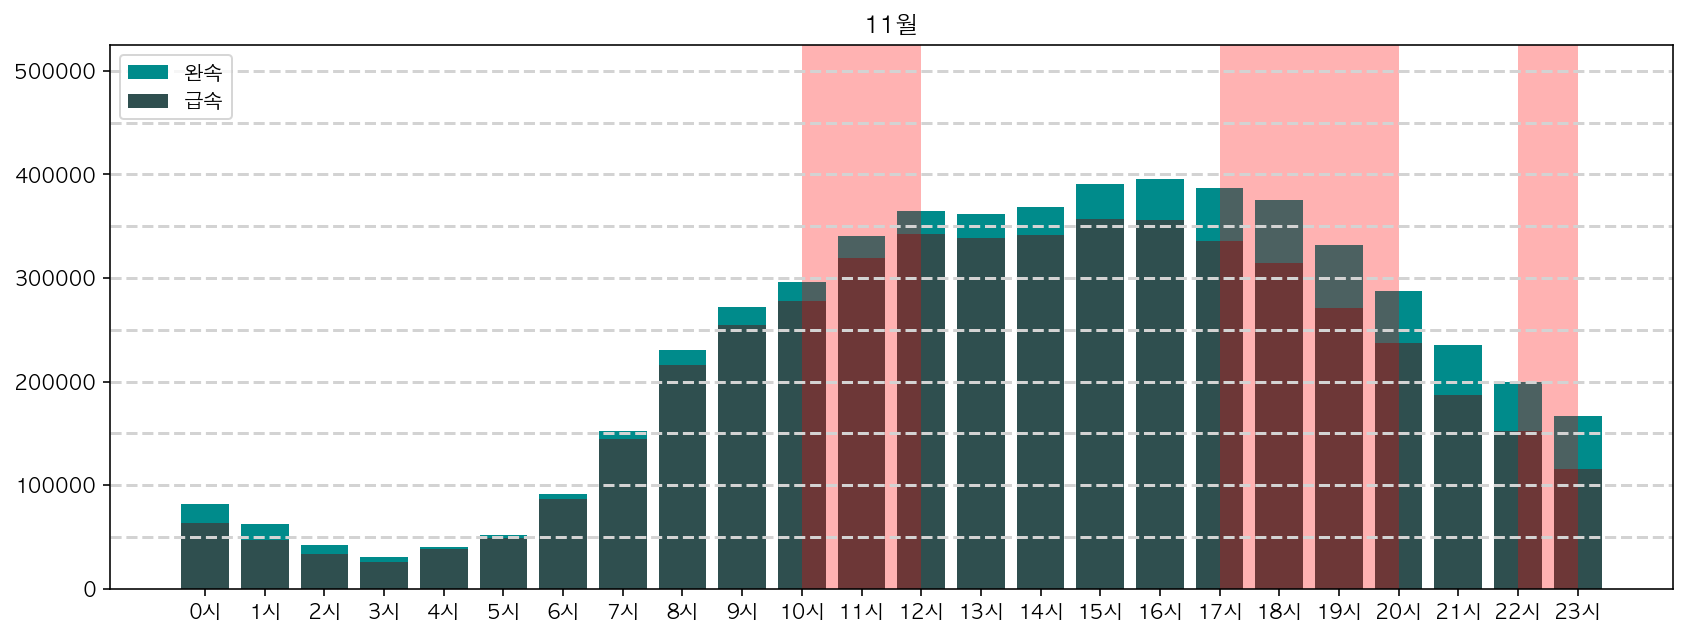

In [44]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_11, color='darkslategrey')
p2 = plt.bar(time, slow_11, bottom=fast_11, color='darkcyan')

plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('11월')
plt.xticks(time)
span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[17]
span_end = time[20]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[22]
span_end = time[23]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

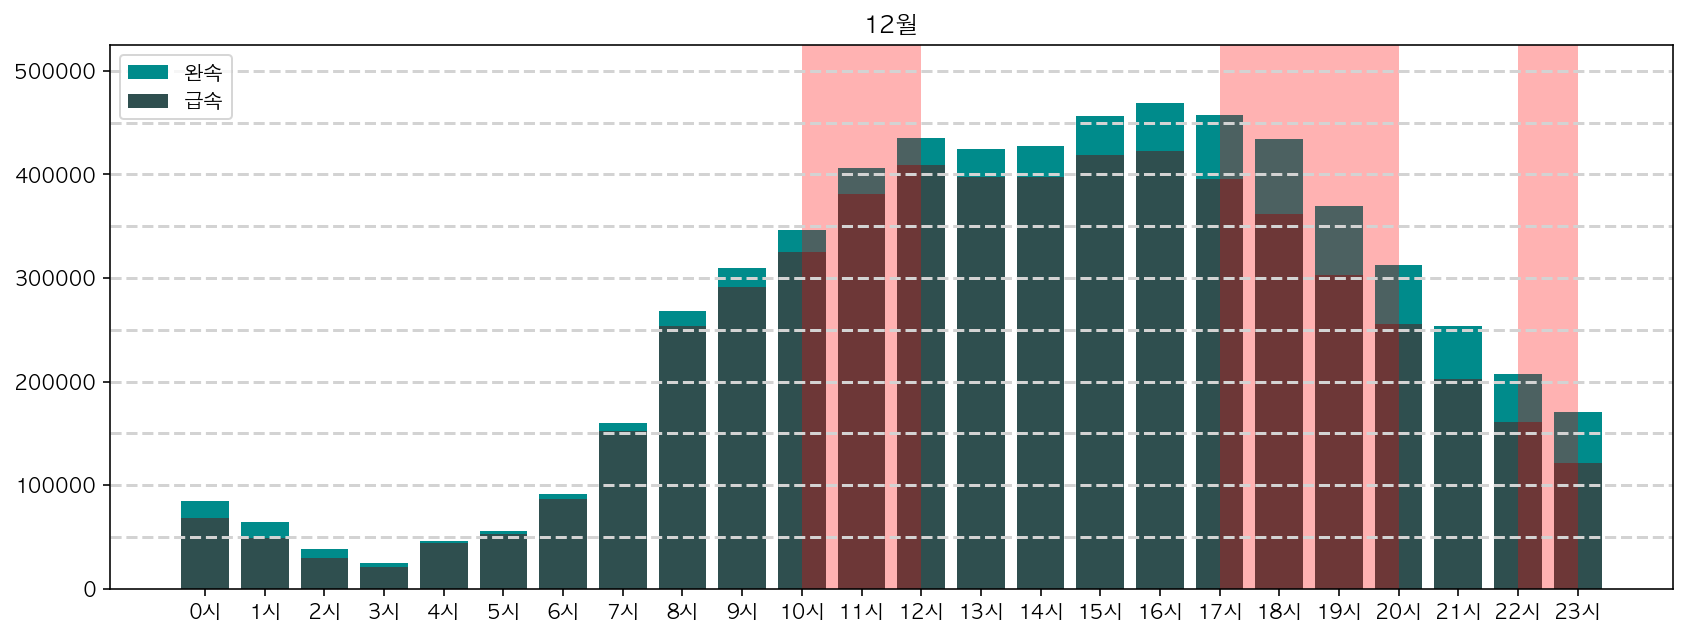

In [45]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_12, color='darkslategrey')
p2 = plt.bar(time, slow_12, bottom=fast_12, color='darkcyan')

plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('12월')
plt.xticks(time)
span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[17]
span_end = time[20]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[22]
span_end = time[23]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

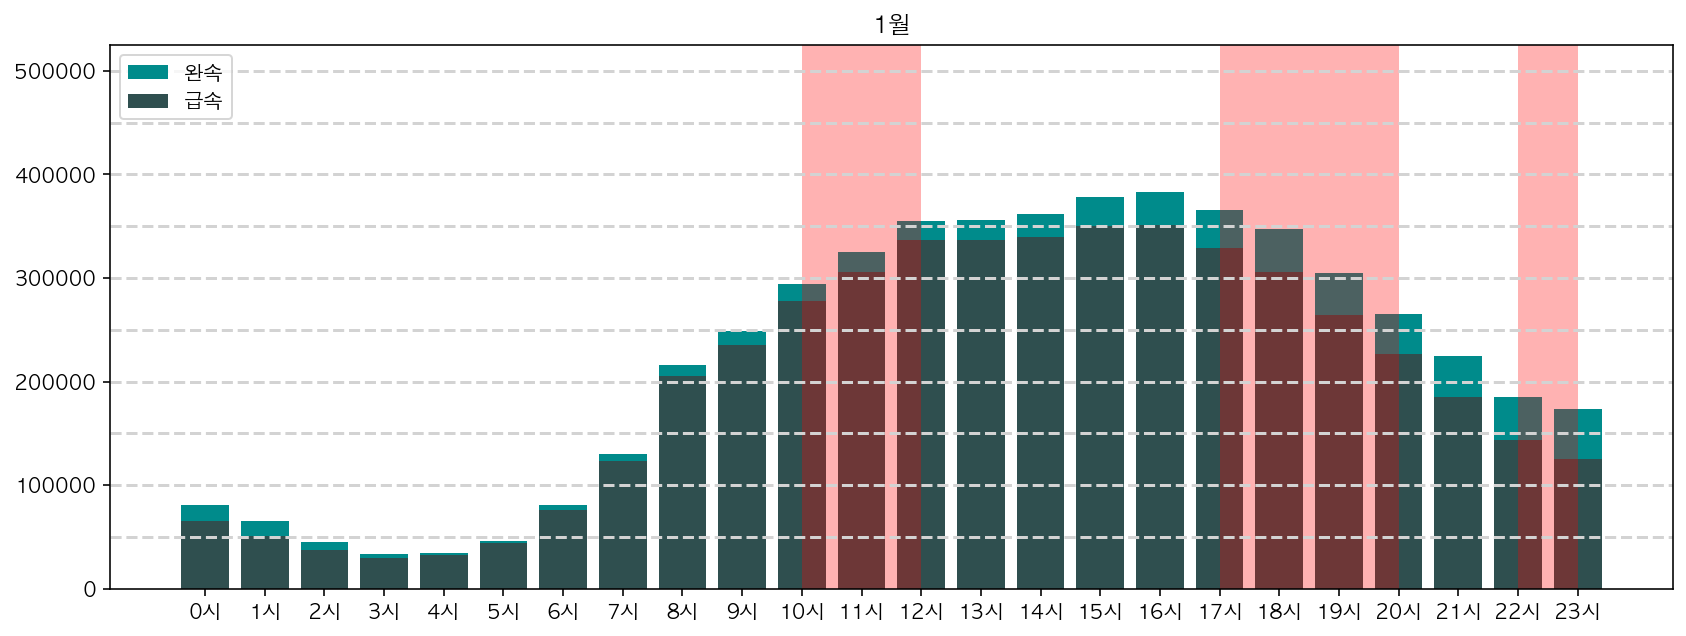

In [46]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_1, color='darkslategrey')
p2 = plt.bar(time, slow_1, bottom=fast_1, color='darkcyan')

plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('1월')
plt.xticks(time)
span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[17]
span_end = time[20]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[22]
span_end = time[23]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

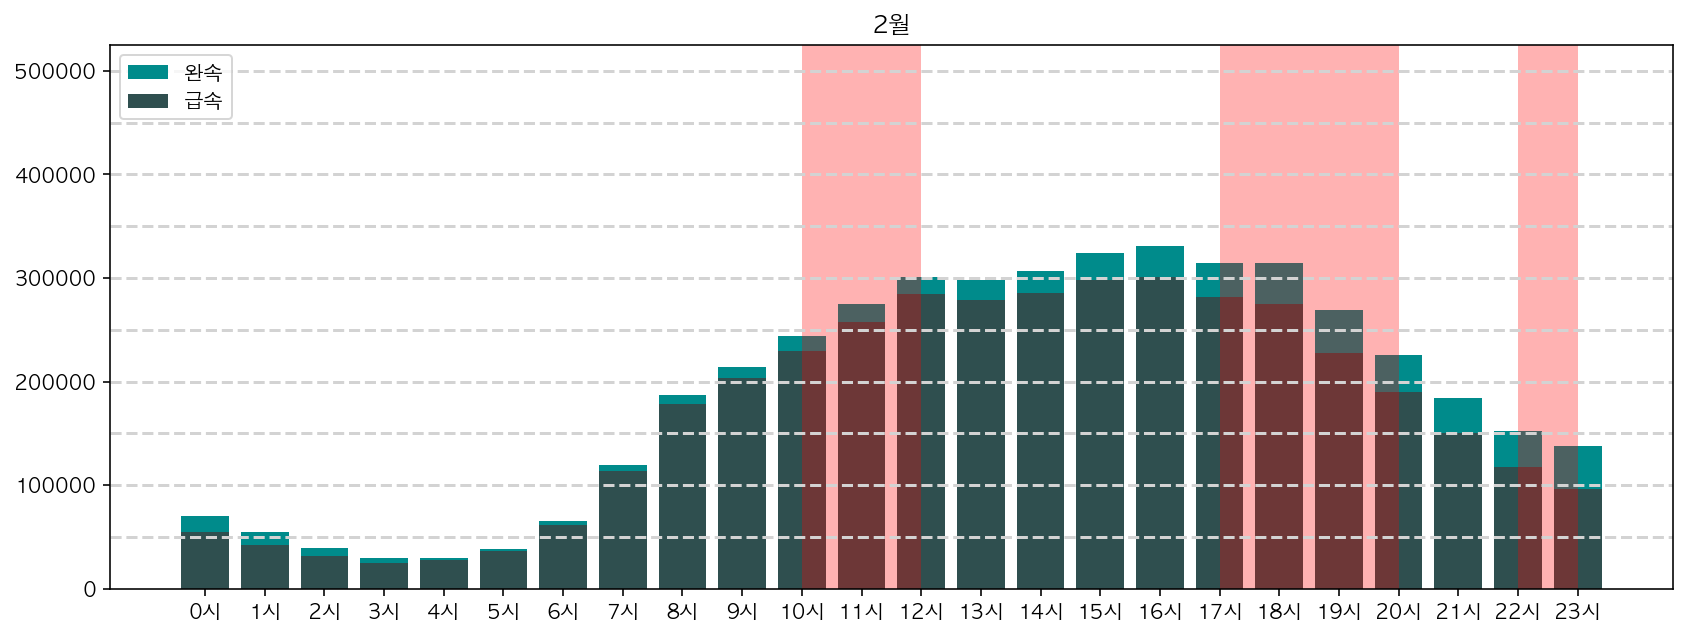

In [47]:
plt.figure(figsize=(14,5))

p1 = plt.bar(time, fast_2, color='darkslategrey')
p2 = plt.bar(time, slow_2, bottom=fast_2, color='darkcyan')

plt.axhline(50000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(100000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(150000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(200000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(250000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(300000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(350000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(400000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(450000, 0, 1, color='lightgray', linestyle='--')
plt.axhline(500000, 0, 1, color='lightgray', linestyle='--')

plt.legend((p2[0], p1[0]), ('완속', '급속'))
plt.title('2월')
plt.xticks(time)
span_start = time[10]
span_end = time[12]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[17]
span_end = time[20]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

span_start = time[22]
span_end = time[23]
plt.axvspan(span_start, span_end, facecolor='red', alpha=0.3)

plt.show()

* 전기세가 가장 비싼 `최대부하시간대` 임에도 불구하고, 대부분 충전부하량이 가장 높은 것을 알 수 있음
* 겨울철은 최대부하시간대가 다른계절과 달라서, 다른 계절에 비해 낮은 경향을 보임
* 이를 통해, 한국전력은 전기차 보급이 확대됨에 따라 `최대부하시간대` 에 공급할 수 있는 전력량을 높일 수 있는 방안, 또는 전기차에 대한 `전기세` 할인을 다른 전기 사용과 구분하여 추가 공급 및 할인 할 수 있는 방법을 모색해야할 것으로 보임
* 데이터의 한계점 : 한국전력에서 운영하는 충전기에 대한 자료이다 보니, `급속` 충전 비율이 높을 수 밖에 없을 것 같음
* 반대로, 주거용 충전기 전력부하량 데이터가 있었으면 `완속` 충전 비율이 더 높았을 것이고, 충전기에 `예약충전` 시스템을 활용하여, 전기세가 가장 낮은 시간대에 충전할 수 있게 했을 것으로 추정

### ◎ 시도별 보조금 접수율 현황을 그래프로 그려보기<br>
2021년 시도별 전기승용, 지자체별 보조금 접수율을 그래프로 그려봄으로써, 현재 보조금 접수율이 초과된 지역은 어디인지 알아보고, `1)추가로 예산 편성이 필요한 지역`이나 `2)내년 예산 계획 시 참고할 만한 내용` 이 있을지 알아보고자 함


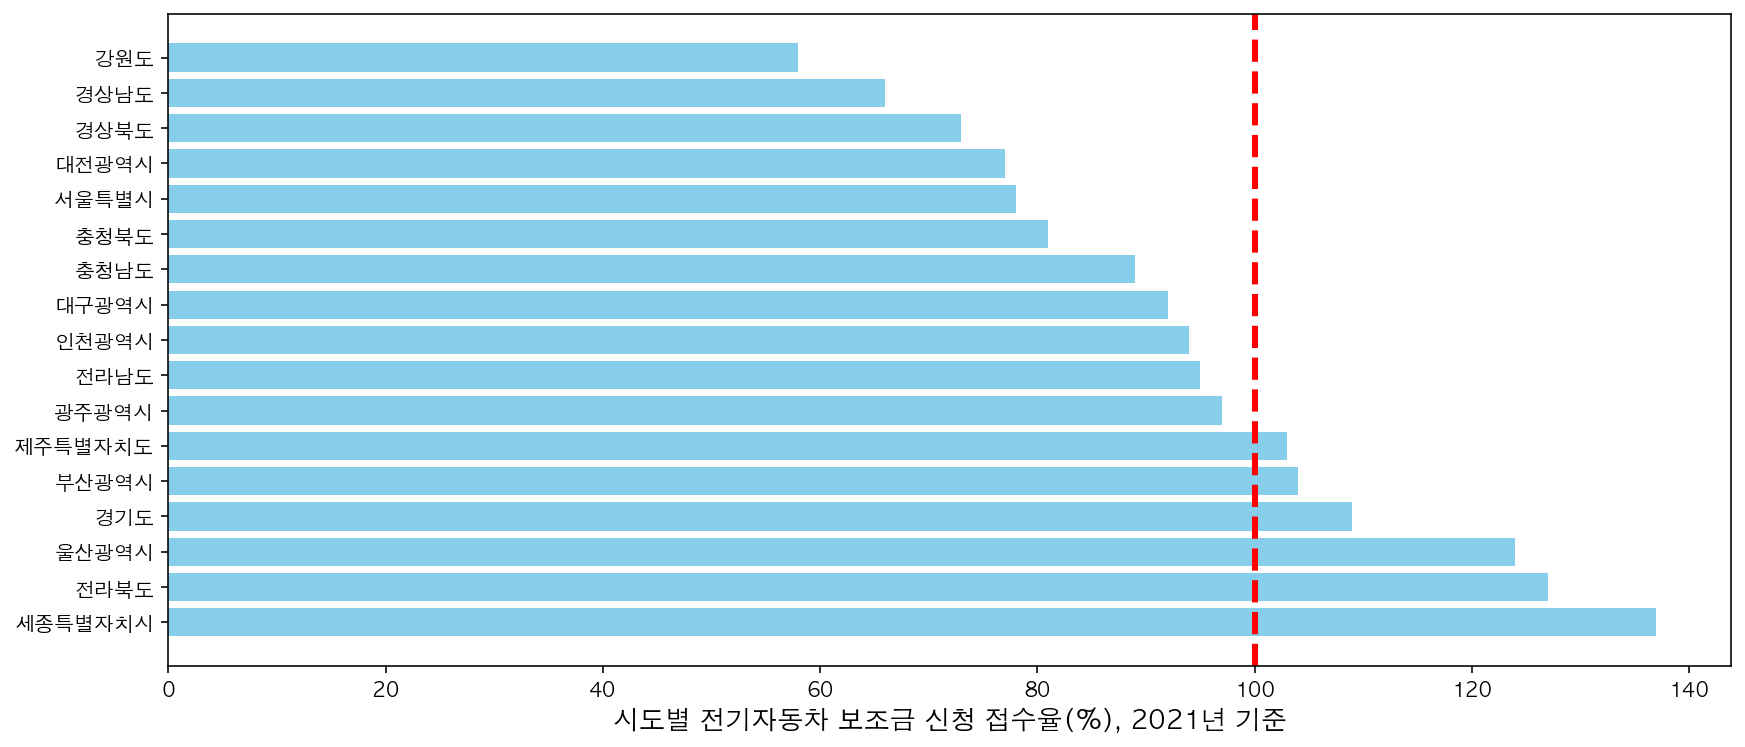

In [48]:
# 막대그래프로 접수율이 100% 초과한 곳을 알아보기

plt.figure(figsize=(14,6))

plt.barh(subsidy2021_pivot.index, subsidy2021_pivot['접수율(%)'], color='skyblue')
plt.axvline(x=(100), color='r', linestyle='--', linewidth=3)
plt.xlabel('시도별 전기자동차 보조금 신청 접수율(%), 2021년 기준', fontsize=13)
plt.show()

In [54]:
# 시도별 접수율(%) 현황을 지도에 그려보기

state_geo = '/Users/user/Downloads/TL_SCCO_CTPRVN.zip.geojson'
state_geo2 = json.load(open(state_geo, encoding='utf-8'))

In [55]:
map2 = folium.Map(location=[35.8, 127.6], zoom_start=7)

choropleth = folium.Choropleth(geo_data=state_geo2,
                               data=subsidy2021_pivot,
                               columns=[subsidy2021_pivot.index, '접수율(%)'],
                               fill_color='YlGnBu',
                               key_on='properties.CTP_KOR_NM',
                               highlight=True).add_to(map2)

# 위에 Choropleth의 옵션 중, highlight는 시도별 구분(영역)을 마우스를 가져다 대면 진하게 보여줌

# 전체화면 변경하는 버튼 만들기
plugins.Fullscreen(position = 'topright',
                  title = 'Click to Expand',
                  title_cancel = 'Click to Exit',
                  force_separate_button=True).add_to(map2)

# 지역별로 시도 이름이 나오게 표시하기
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['CTP_KOR_NM'], style=style_function, labels=False))
title_html = '<h3 align="center" style="font-size:20px"><b>시도별 전기자동차 보조금 신청 접수율(%)</b></h3>'
map2.get_root().html.add_child(folium.Element(title_html))

folium.LayerControl().add_to(map2)

map2

In [56]:
# 자동차 아이콘 클릭 시, 팝업 붙여주기

for i in range(len(subsidy2021_pivot.index)):
    icon=folium.Icon(color='white', icon='car', icon_color="green", prefix='fa')
    folium.Marker(subsidy2021_pivot['points'][i], icon=icon, popup=subsidy2021_pivot['접수율(%)'][i]).add_to(map2)

map2

* 색상이 진한 곳 > 접수율이 높은 곳(100% 이상은 초과접수 상태)<br>
  `세종`, `전북`, `울산`, `경기`, `부산`, `제주도`는 접수율 100% 이상 ➡️ 추가 예산 편성이 필요할 것으로 보임 <br>
* `서울특별시`는 추경을 통해 9,139대 증가하였음 (경기도 일부 시에서도 추경 진행) <br>
* 2022년 부터는 접수율이 높은 시도의 보조금 확대 및 빠른 추가예산 집행이 필요할 것으로 보임

---

## 기대효과 및 개선사항

* `제주`, `대구`, `울산`, `충남`, `대전`, `서울` 은 충전소 1대가 커버해야할 전기차의 수가 굉장히 높기 때문에(**충전기 1대당 전기차 40대 이상**), 우선적으로 충전기 추가 설치 지원이 필요함 <br>


* 시도별 전기차 보조금의 경우 `세종`, `전북`, `울산`, `경기`, `부산`, `제주`는 이미 초과 접수가 된 상황으로, 추경 집행 또는 2022년 예산 계획 시 폭넓은 지원이 필요하다 판단됨 <br>


* `제주`, `울산` 지역은 충전소도 부족하고, 보조금 예산도 이미 초과된 지역이기 때문에, 우선적인 추가 예산 편성이 필요함 <br>


* 한국전력은 전기차 보급이 확대됨에 따라 최대부하시간대 에 공급할 수 있는 전력량을 높일 수 있는 방안이 필요해 보임 <br>


* 22년 7월부터는 완전폐지되는 전기차 충전전력 특례 할인제도를 유지 및 확대해야 함 <br>


* 전기차의 구매비용이 내연기관차와 비교했을 때, 보조금을 지원하더라도 굉장히 높음 (보조금 및 취등록세 부분에서 정부차원의 지원이 더 필요해보임)<br>


* 전기차 유지비 중에서도 큰 지출을 차지하는 보험료를 할인할 수 있는 방안을 모색해야 함 (ex: 블랙박스 할인, 자녀 할인과 같은 유형을 만들어서 제공)<br>


* 충전소가 없는 휴게소가 7개소(여산휴게소(천안방향), 시흥하늘휴게소, 함안휴게소(순천방향),목감휴게소(시흥방향), 청송휴게소(영덕방향), 추풍령휴게소(서울방향), 추풍령휴게소(부산휴게소)가 있어 충전소 설치가 필요하며, 충전기가 많은 휴게소들은 대부분 현대자동차에서 설치한 충전소가 함께 있어 충전기가 다른 휴게소보다 많은 것으로 보이는 것으로 평균 충전기 대수 `2.31대`로 **매우 부족**하므로 추가 설치가 필요함

---

## 개발후기 및 느낀점

* 아쉬운 점
    * 생각보다 `전기차` 관련 공공데이터가 부족하다고 느꼈음
    * 제공하는 기관별 데이터의 수치가 상이하여, 분석 시 어려움이 있었음
    * 분석 자체보다 데이터 전처리에 시간이 많이 들었는데, 아이디어가 있어도 전처리를 빨리 하지 못해 여러가지 아이디어를 구현하지 못한 점이 아쉬움
    * Django를 이용하여 전기차 vs 내연기관차의 경제성을 분석해볼 수 있는 웹사이트를 구현해보고 싶었지만, 능력적인 한계로 못한 점
    * 예측모델(ex:`Logistic Fuction`, `머신러닝`)을 이용하여, 한국의 전기차 증가추세(ex:`한국은 과연 몇년후에 전기차가 내연기관차보다 많아질까?`)를 예측하고 싶었으나, 시간의 한계와 능력치의 한계로 구현해보지 못한 점
    
    
* 느낀점
    * 권미숙 : 프로젝트를 처음부터 끝까지 직접 구현해볼 수 있어서 유익했고, 더 많은 공부의 필요성을 느꼈다.
    * 김병석 : 방대한 데이터를 다루기에 시간이 부족한 것과, 시각화 할때 처음 설계를 완벽히 하지 못해 헤매게 된 점이 아쉬웠지만, 나만의 노하우가 생긴 느낌이 들어 정말 값진 경험이었다.
    * 이우림 : 혼자 처음부터 실제로 코드를 작성해보고 시각화하면서, 중간중간 크고 작은 어려움이 있었지만 하나씩 찾아가면서 해결해보니 성취감이 정말 높았다. 내가 몰랐던 라이브러리들이 너무 많았고, 앞으로도 이를 적극 활용할 수 있는 능력을 더 키워야겠다. 그냥 지식으로 아는 것과 실제로 구현해보는 것은 정말 천지 차이였다!!
    * 천준 : 프로젝트를 통하여 데이터를 모으고 또 그 많은 데이더 중에 관련있는 유의미한 결과를 도출하기위해 필요부분을 축약하는 과정이 재미있었다. 가정으로만 알았던 주제를 데이터라는 도구를통해 눈에보이는 구체적 결과로 증명하는것이 좋았다.
    * 홍효석 : 전기차에 대한 공공 데이터가 생각보다 부족하다는 것을 느꼈고 강의를 통하여 배웠던 라이브러리나 분석을 실제 활용하며 부족했던 부분을 채우고 새로운 기능도 알 수 있었다.

##  감사합니다.  🤓